In [3]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import pickle
import random
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline
np.set_printoptions(edgeitems=100)
%load_ext autoreload
%autoreload
from smartcluster import get_lp, pulp_solve, plot_tree

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
with open('vectors.pkl', 'rb') as f:
    allvecs = pickle.load(f)

In [5]:
def sample_and_cluster(knn=200, n_samples=100):
    vec = random.choice(allvecs)
    vecs = allvecs[pd.Series(allvecs.dot(np.reshape(vec, -1, 1))).nlargest(200).index, :]
    vecs = vecs[random.sample(range(len(vecs)), 150), :]
    Z = linkage(vecs, optimal_ordering=True, metric='cosine', method='weighted')
    return Z

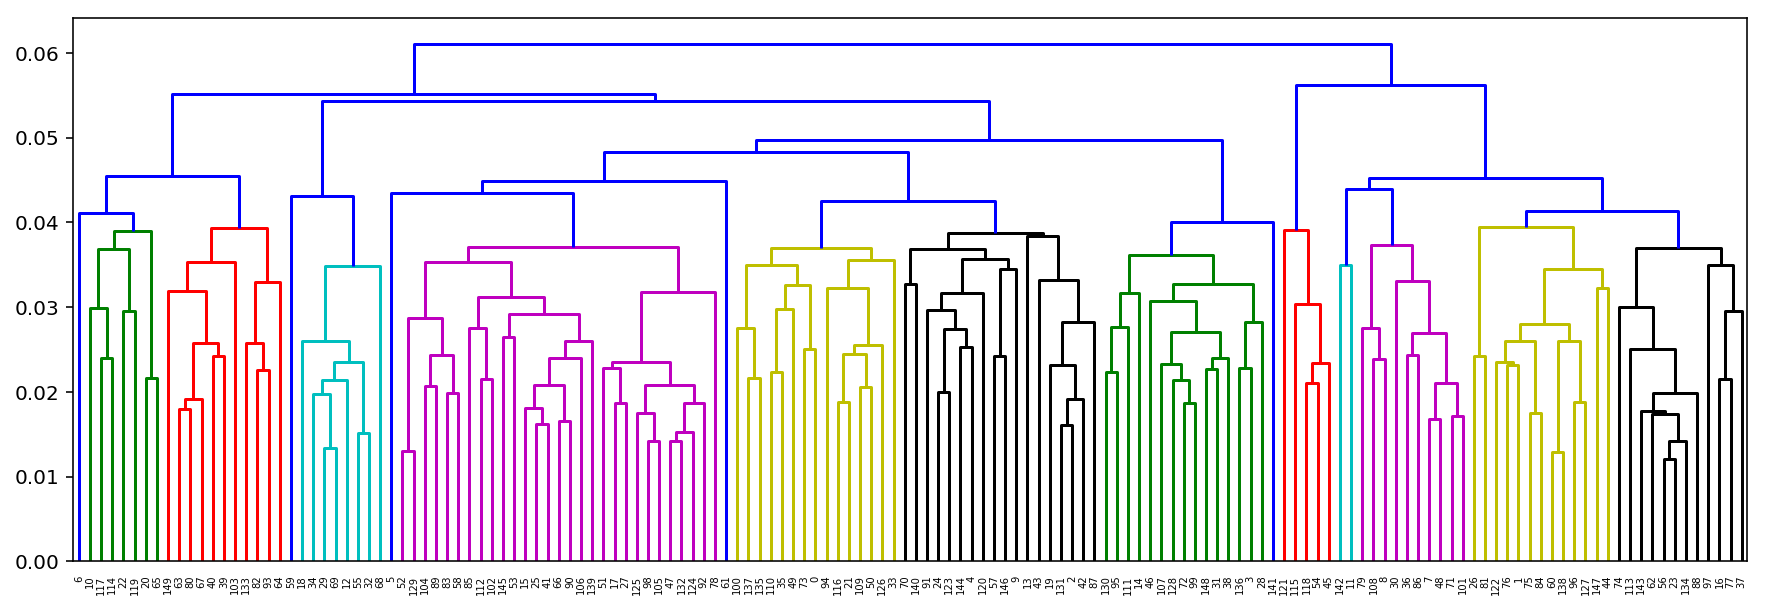

In [6]:
Z = sample_and_cluster()

fig, ax = plt.subplots(figsize=(15,5))
th = 0.65 * Z[:, 2].max()
dent = dendrogram(Z, truncate_mode='level', p=25, ax=ax, color_threshold=th)

/home/chris/.pyenv/versions/3.6.5/envs/work/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


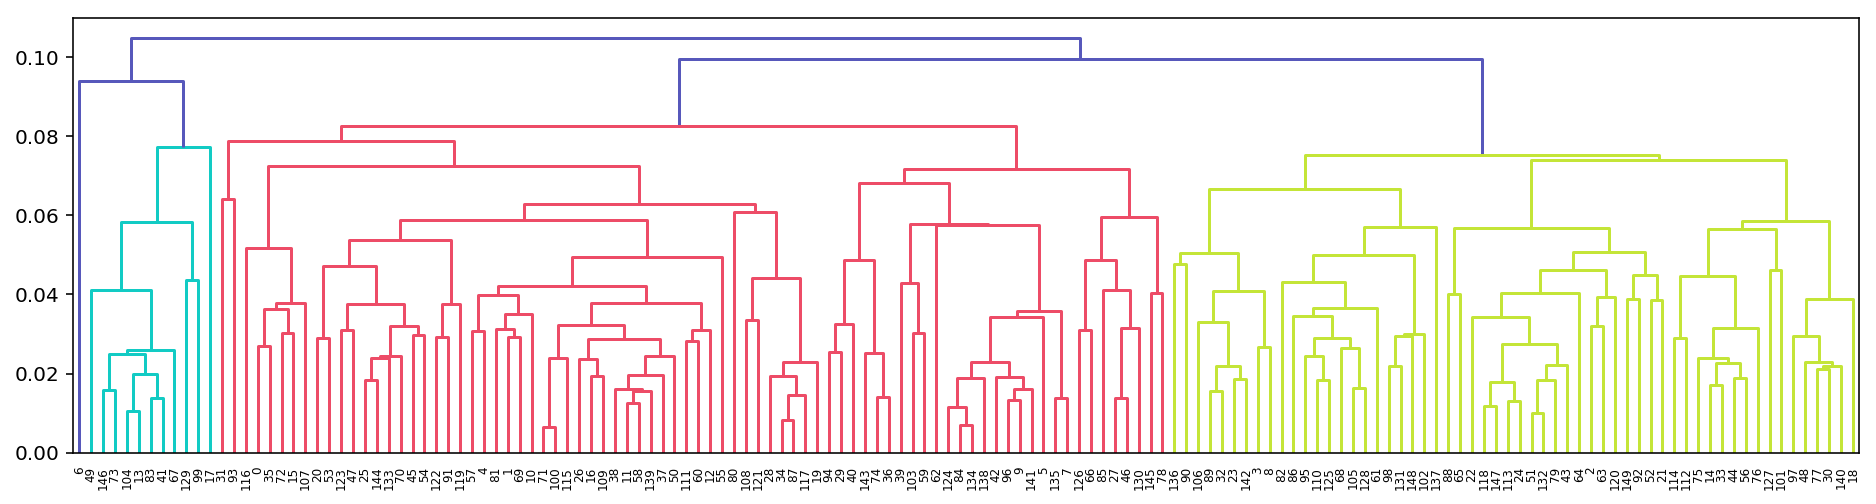

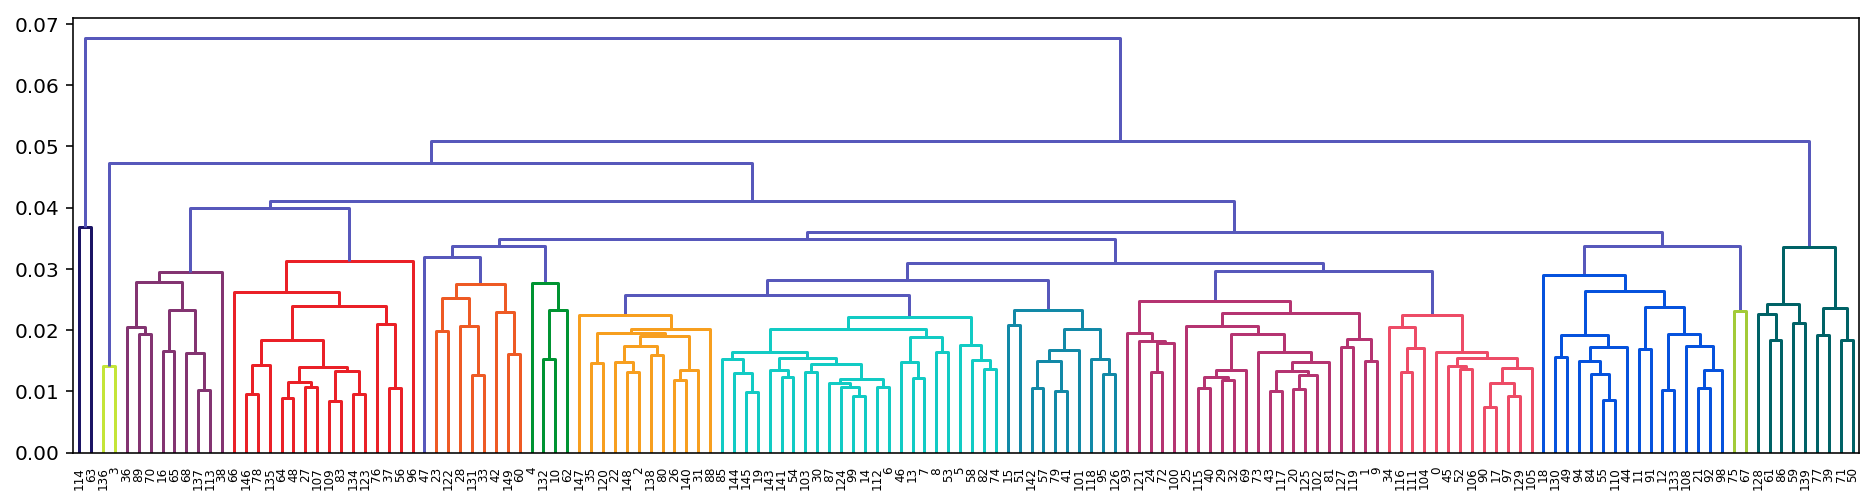

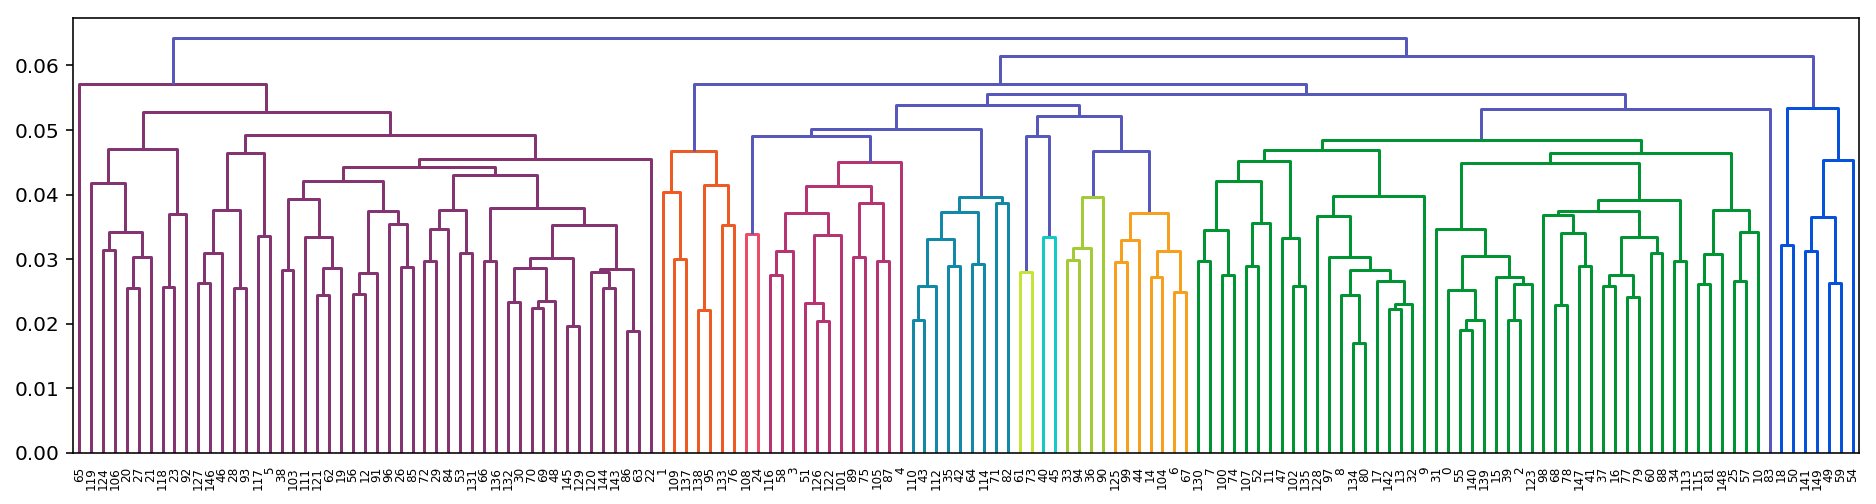

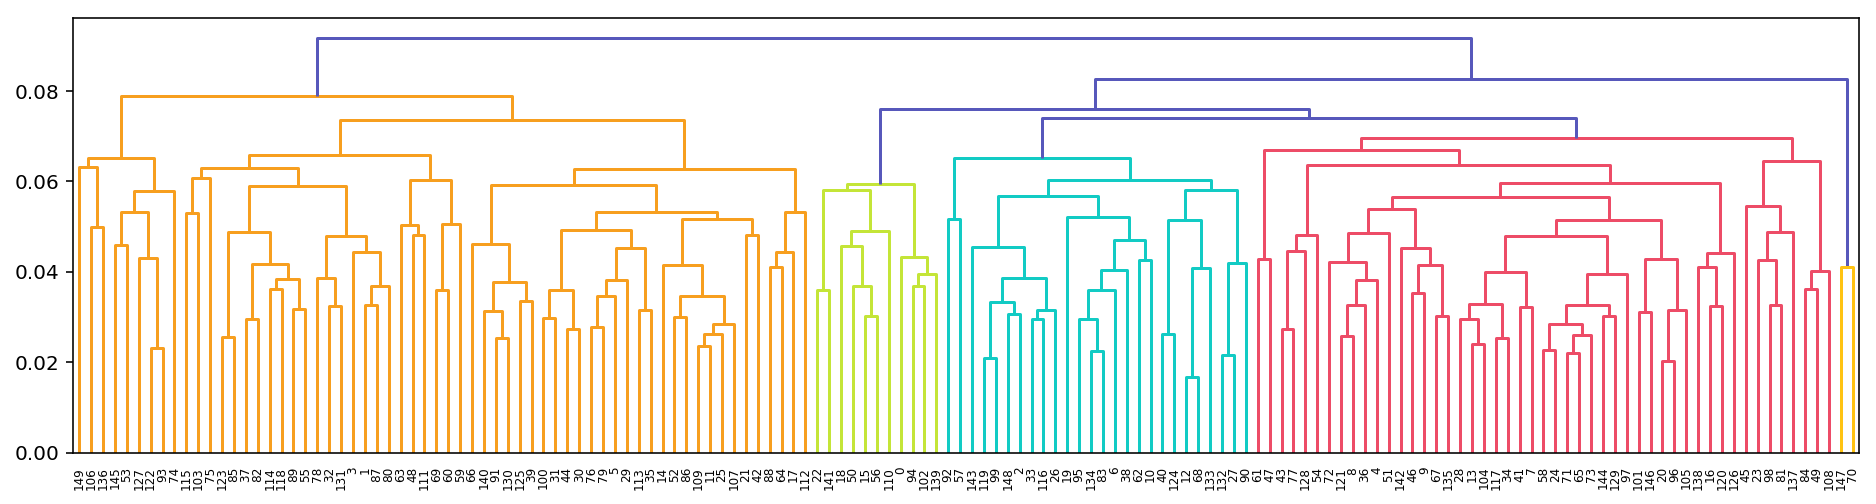

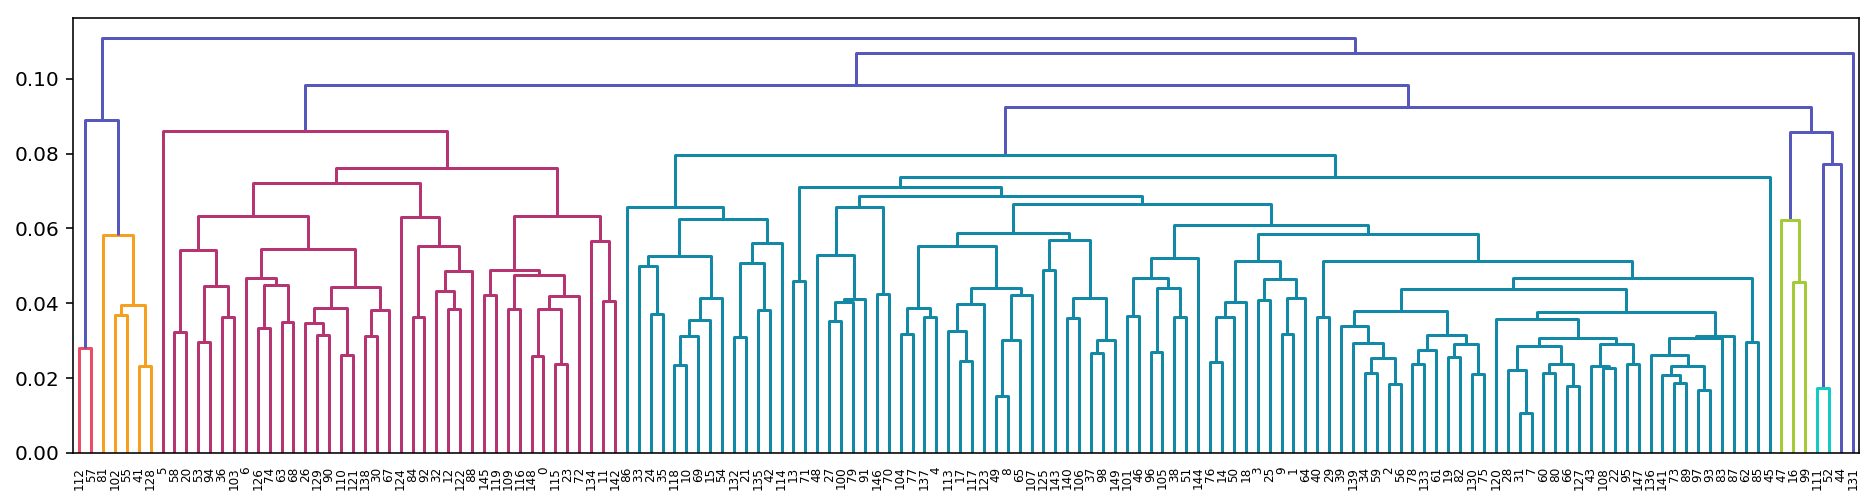

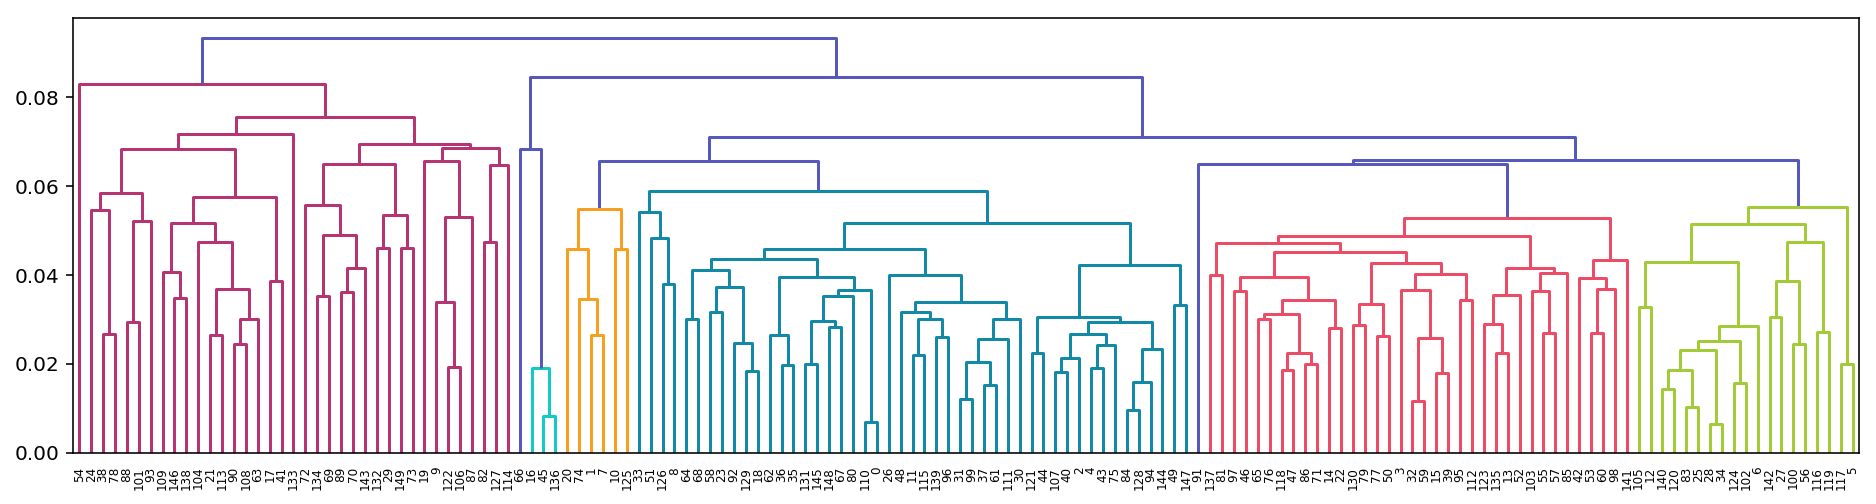

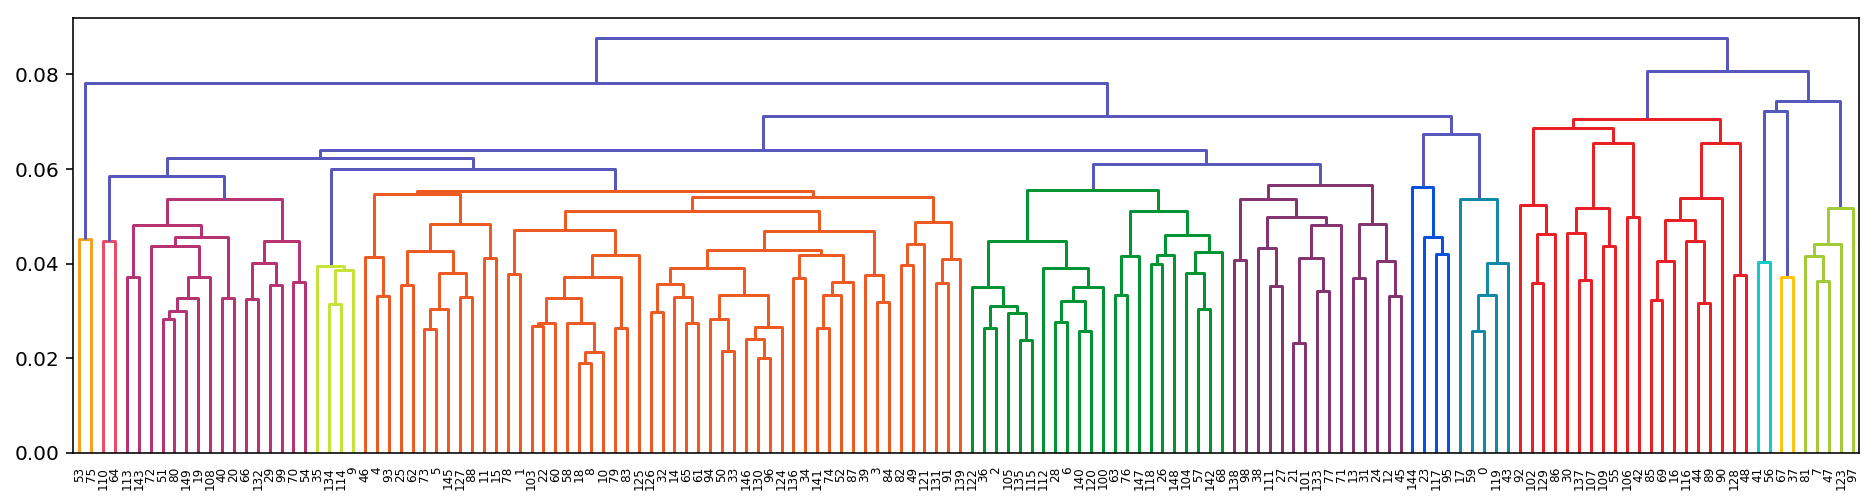

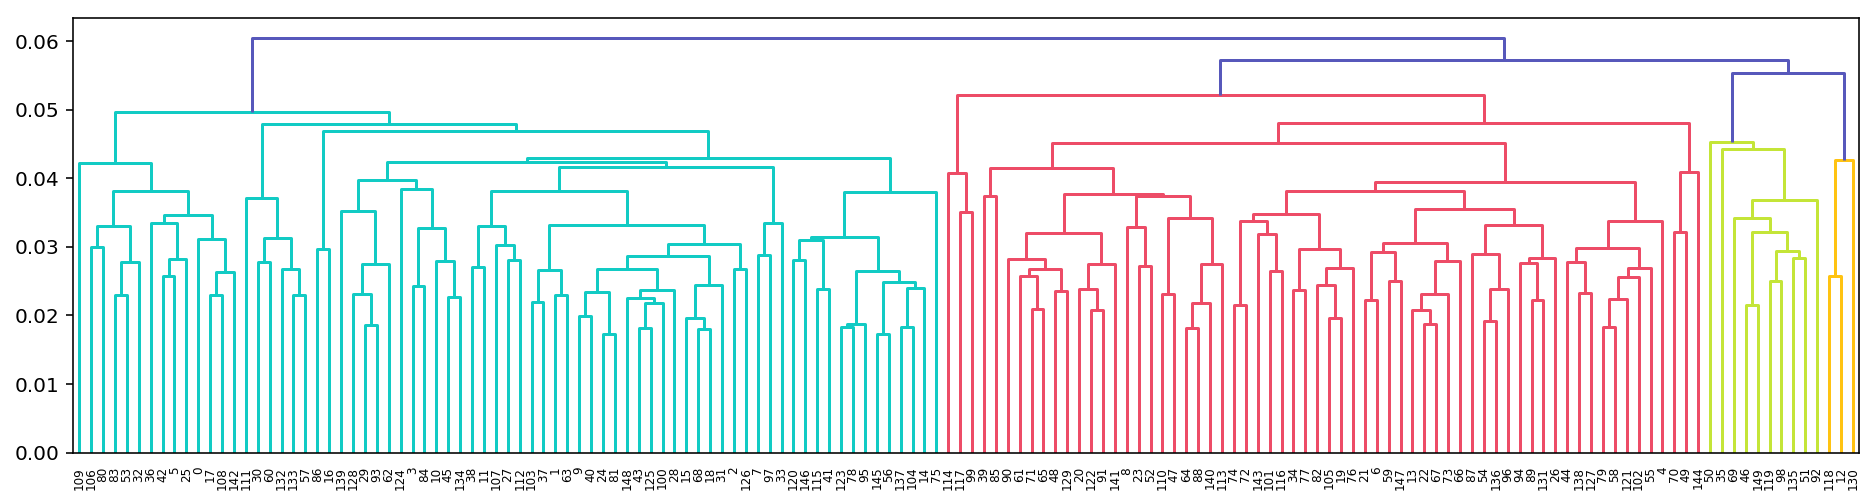

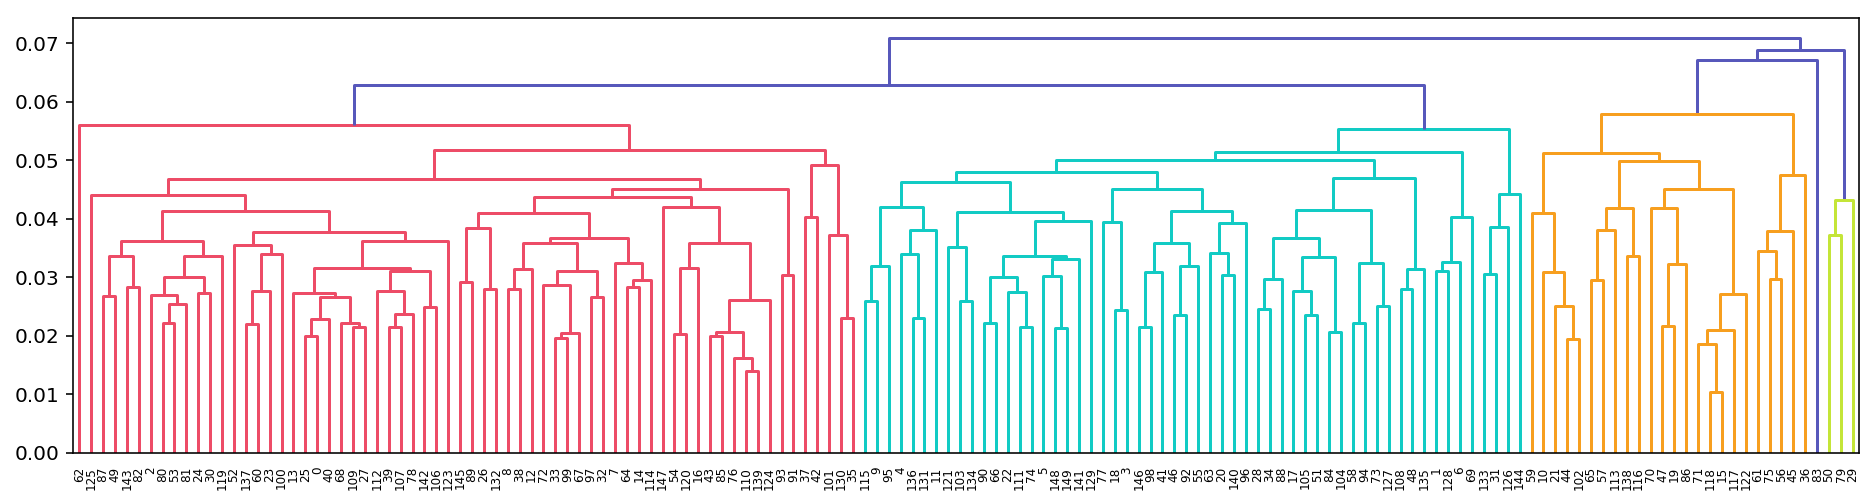

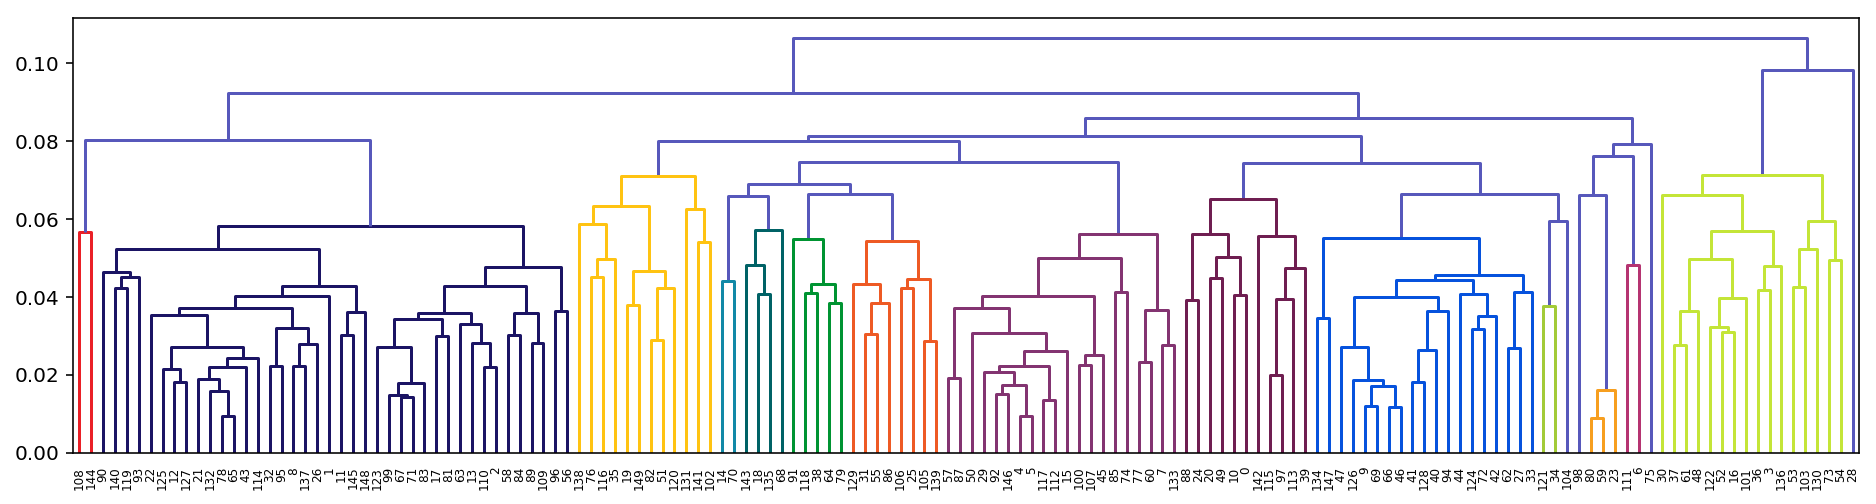

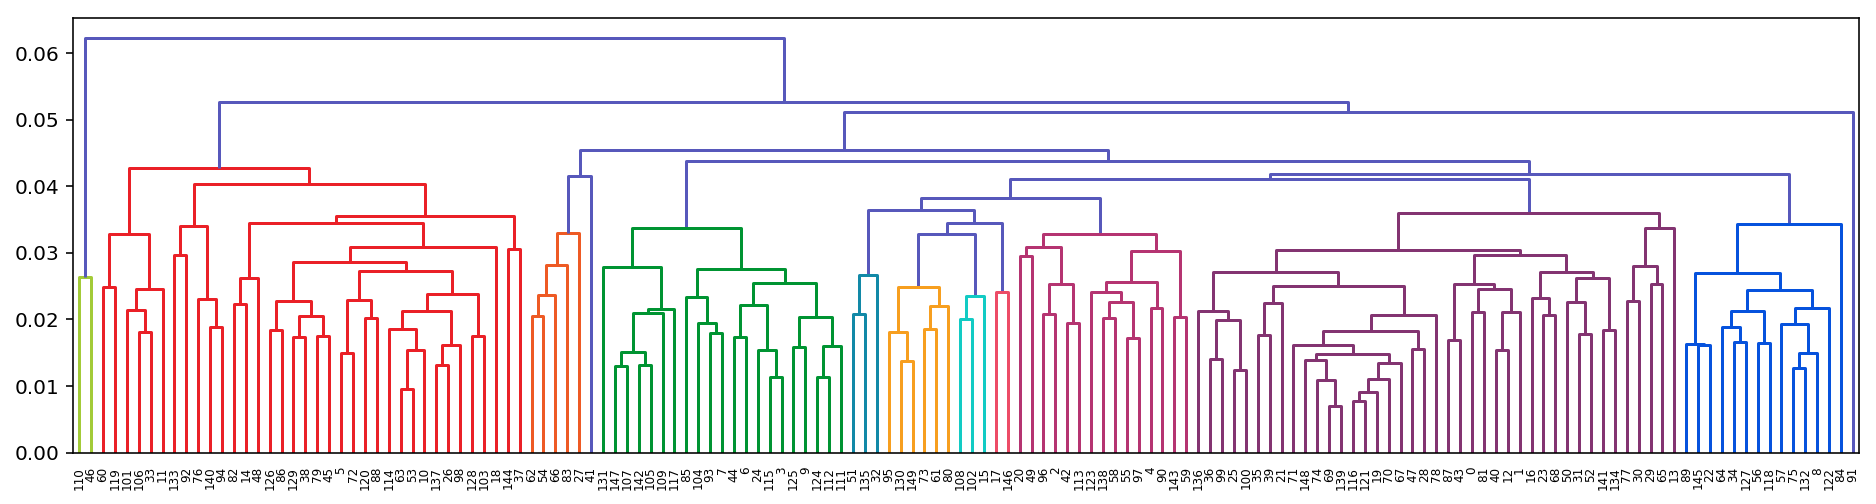

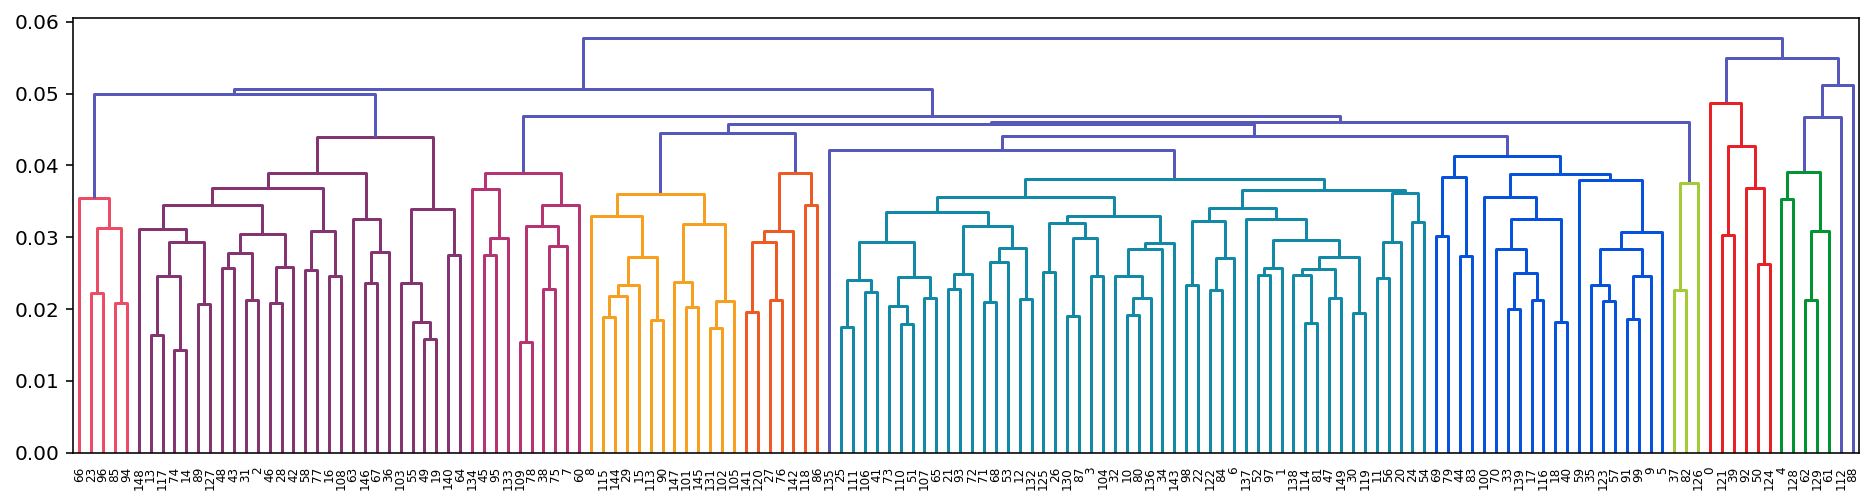

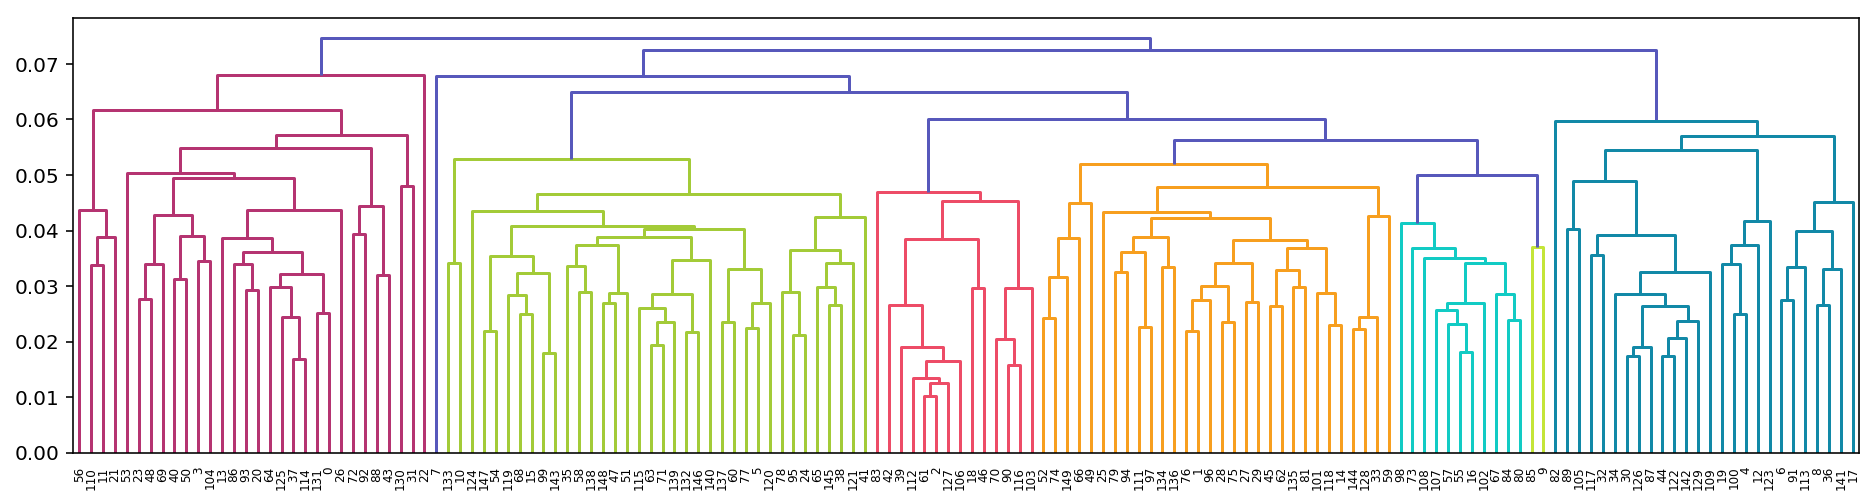

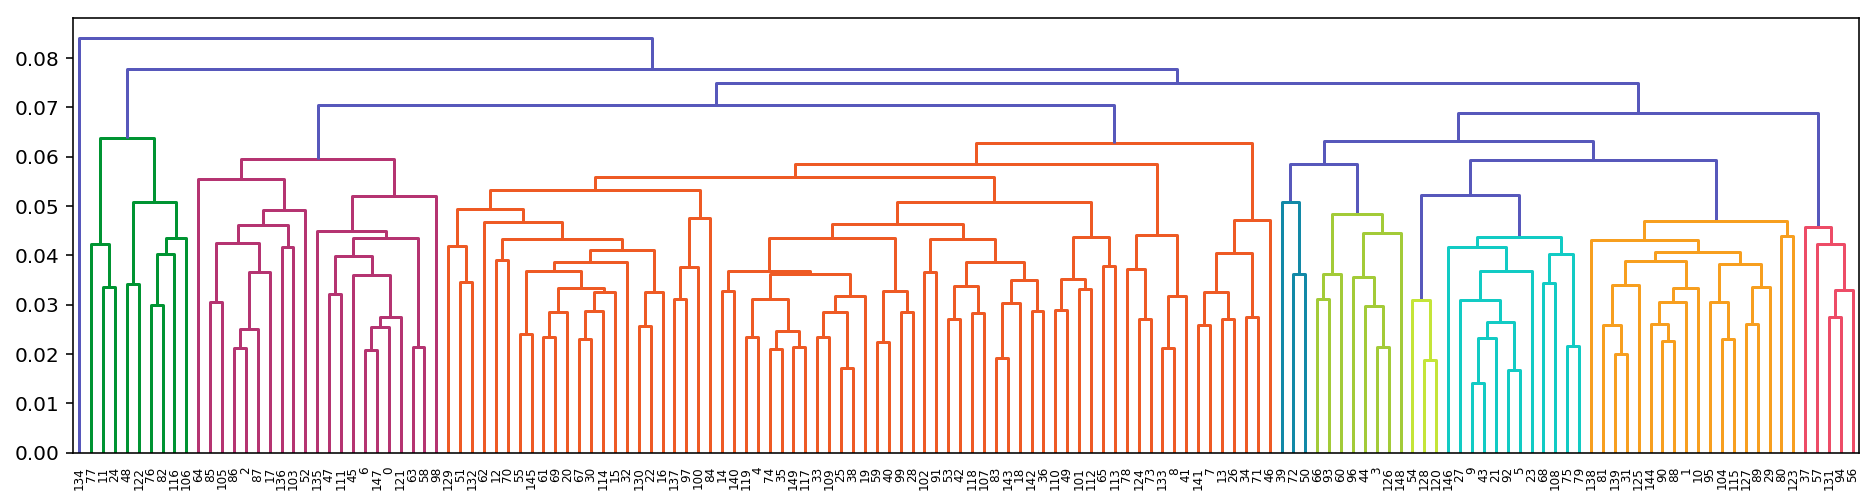

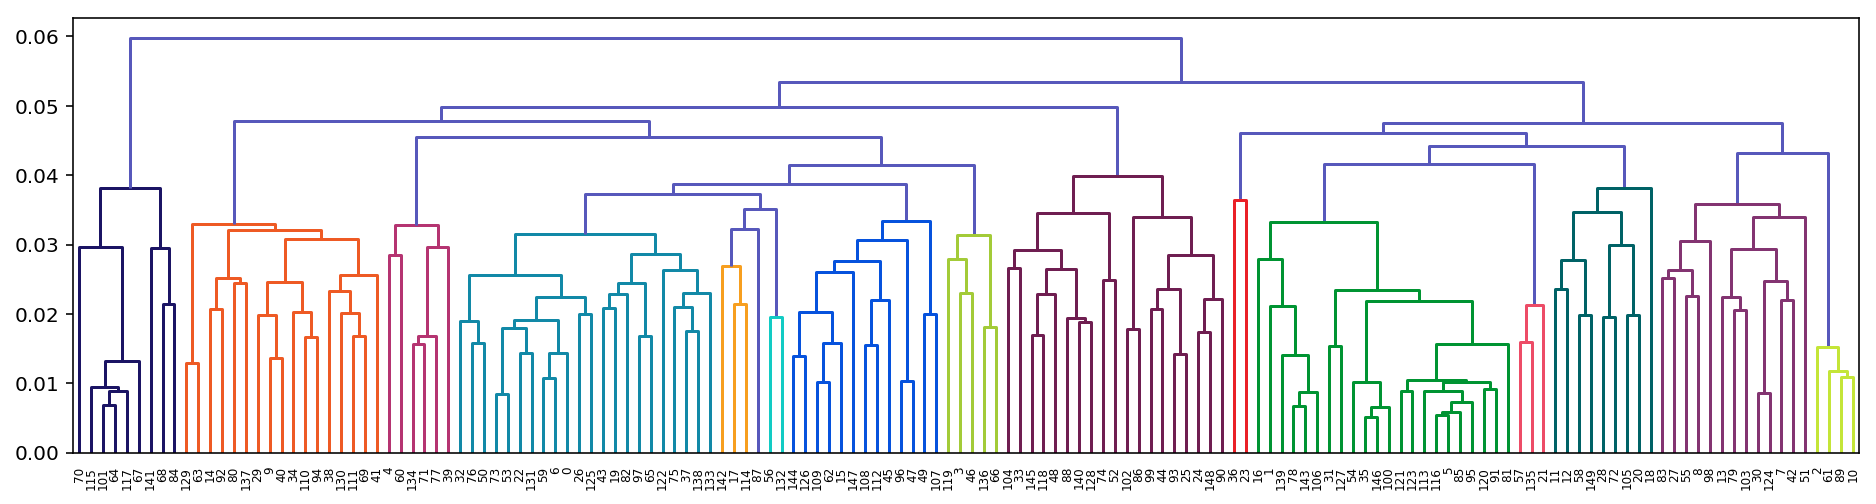

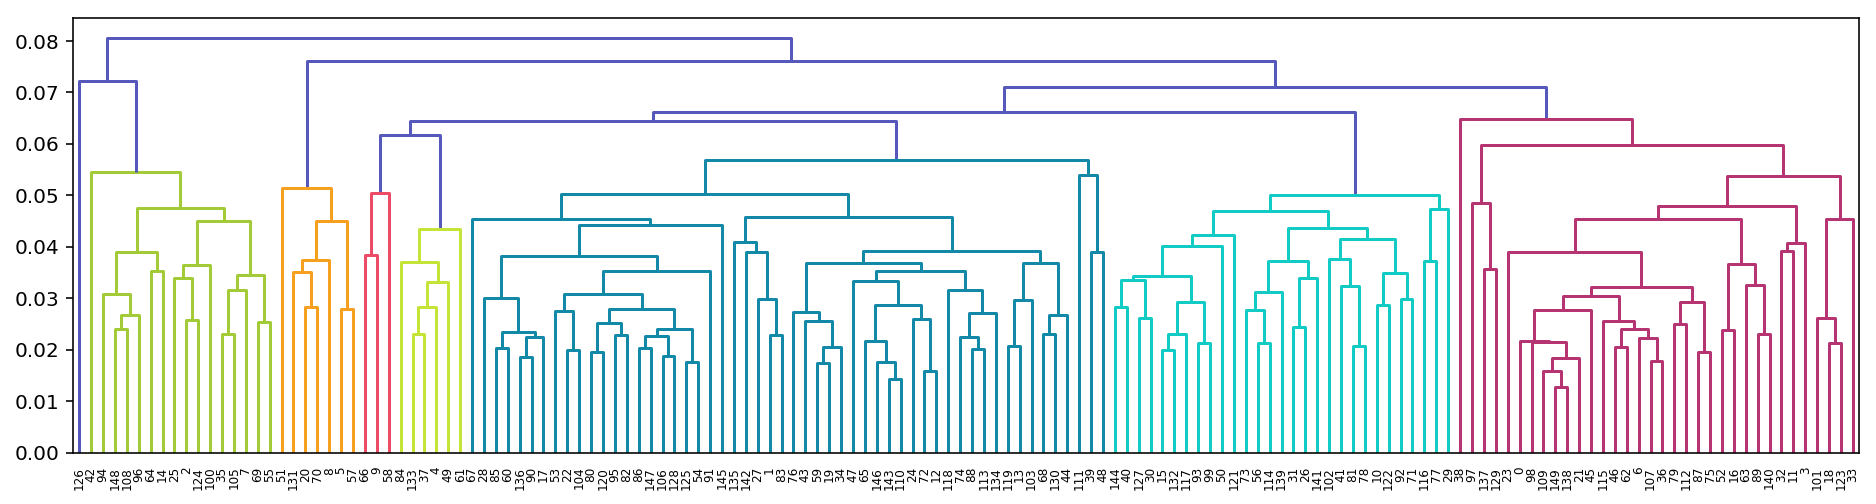

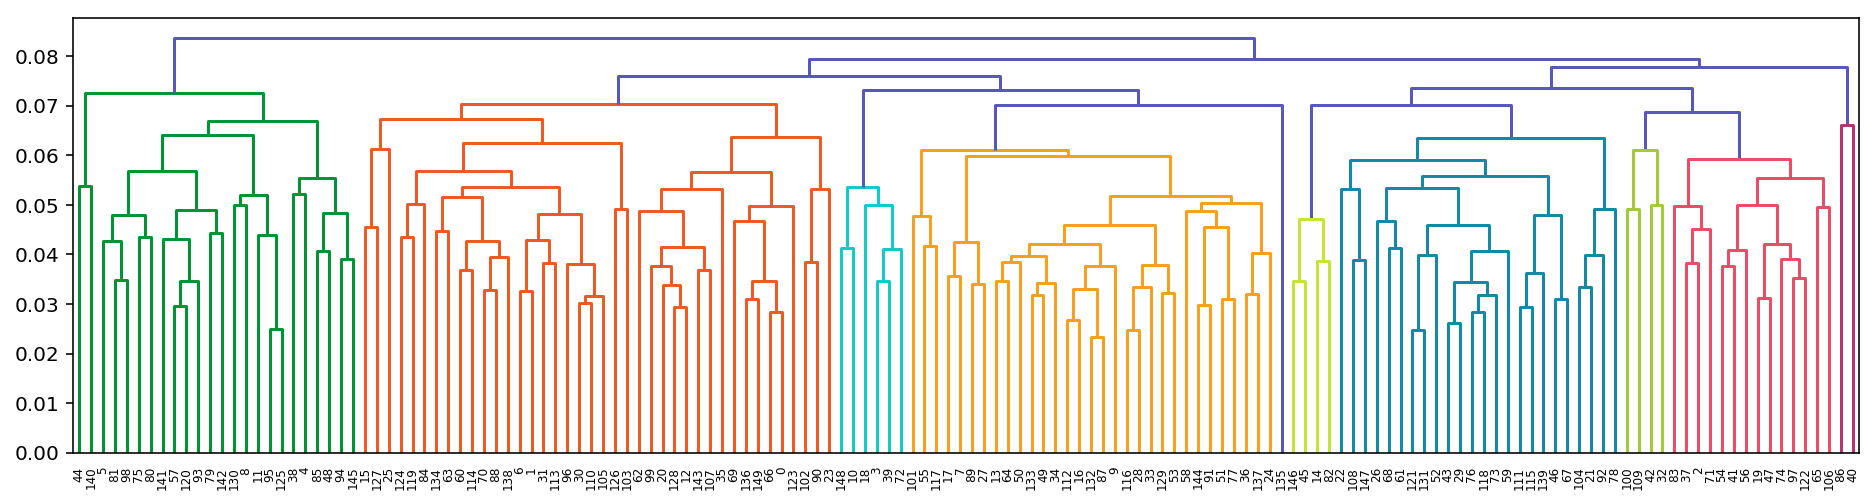

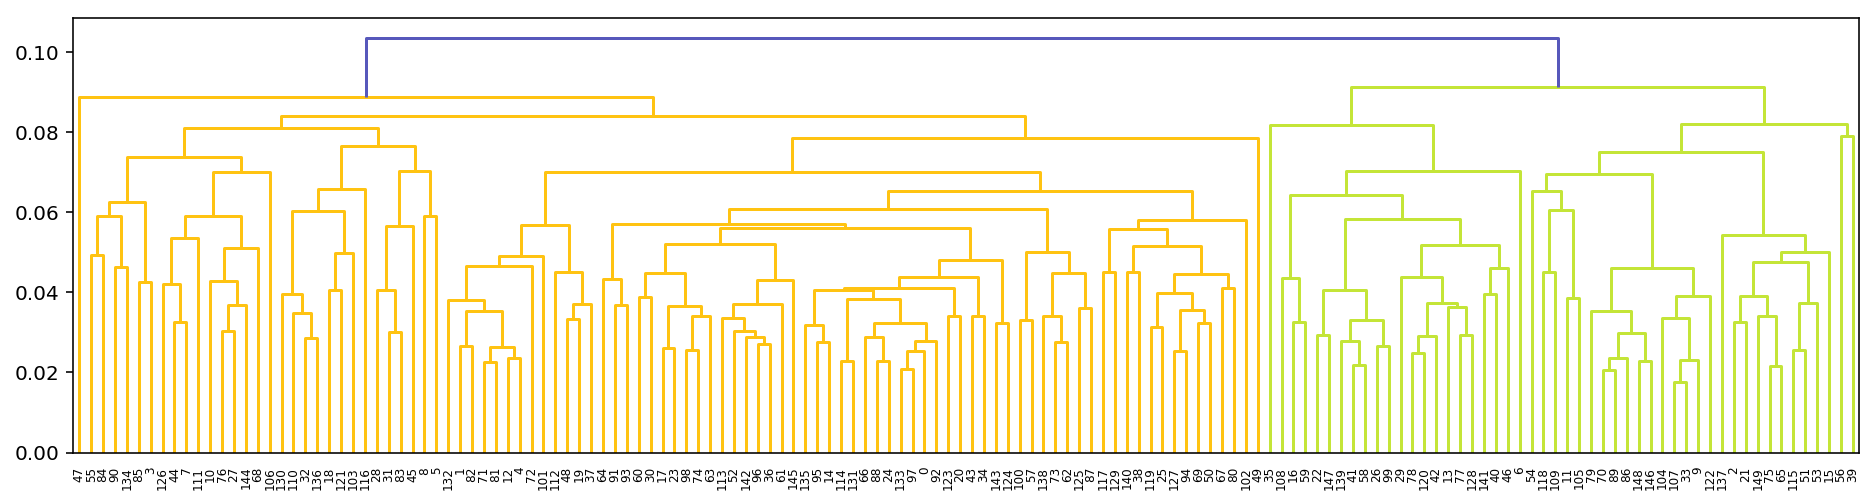

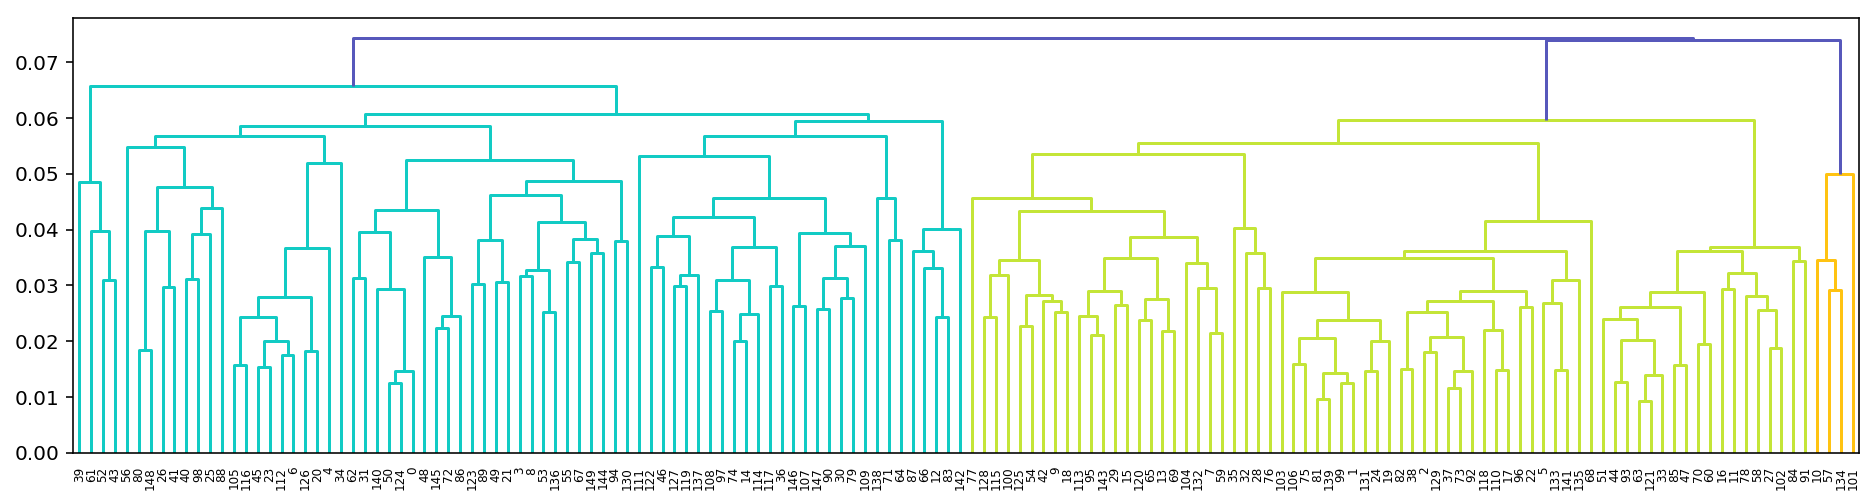

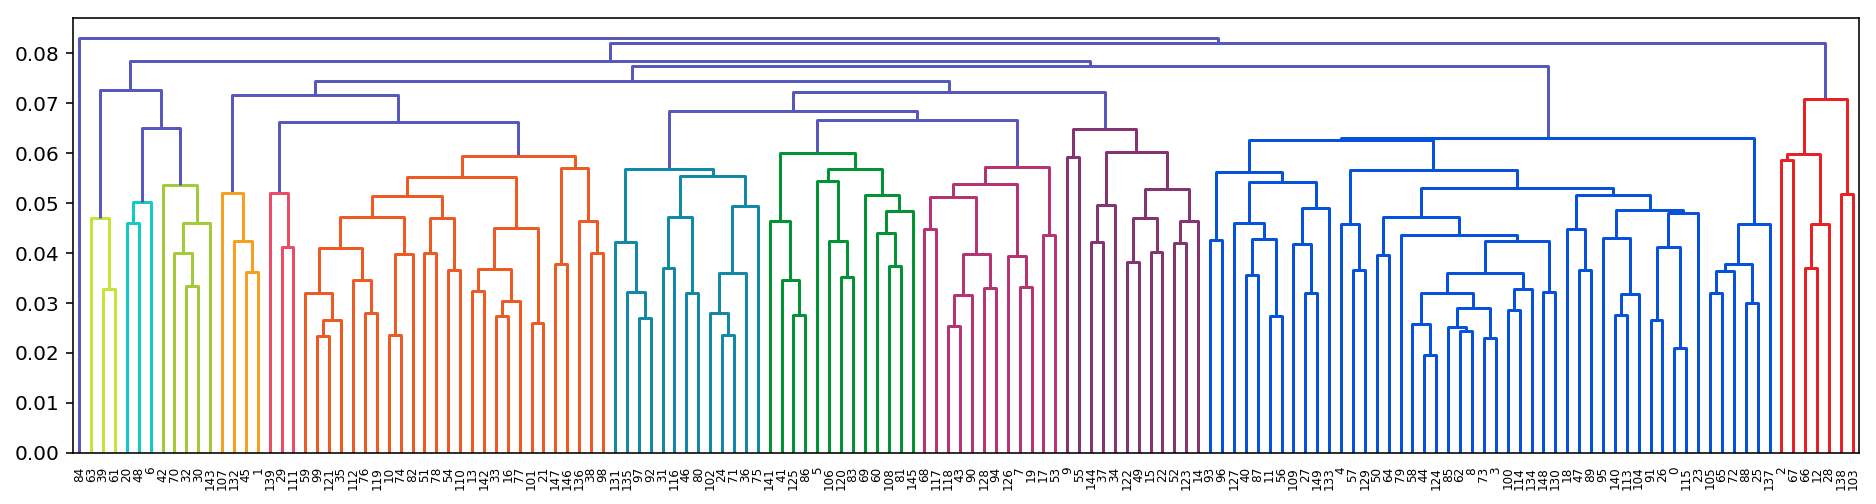

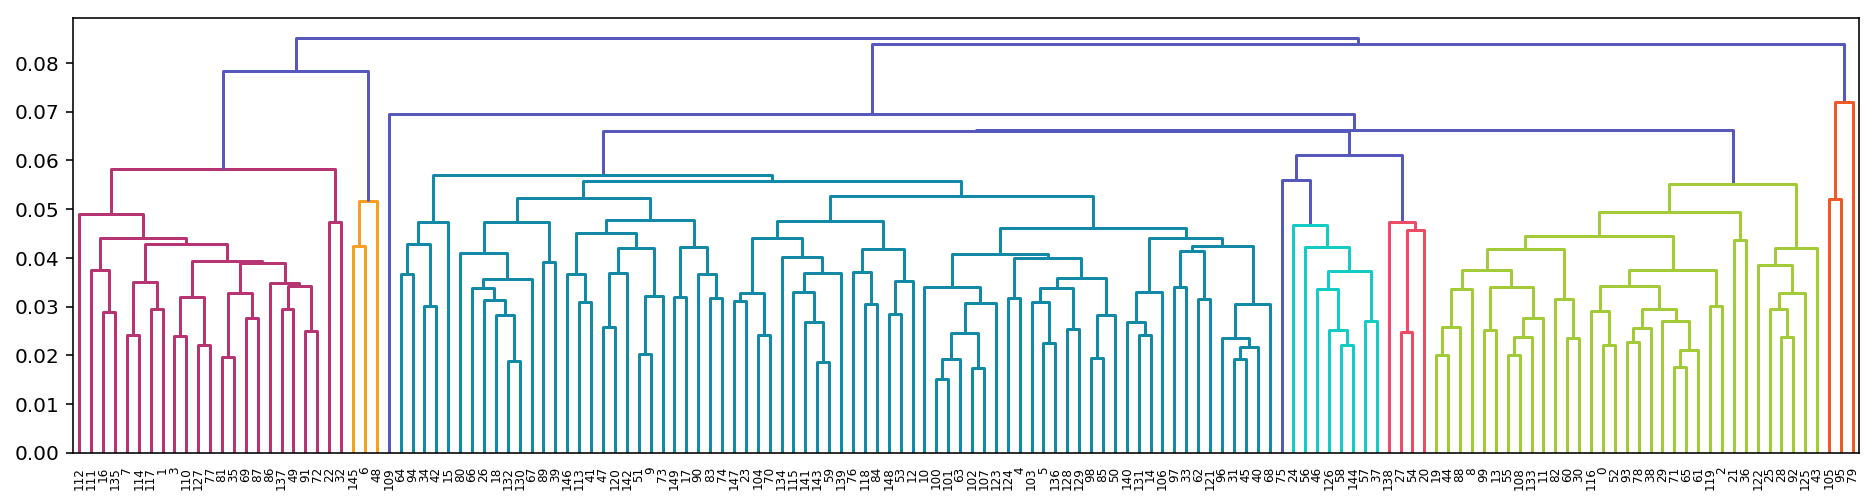

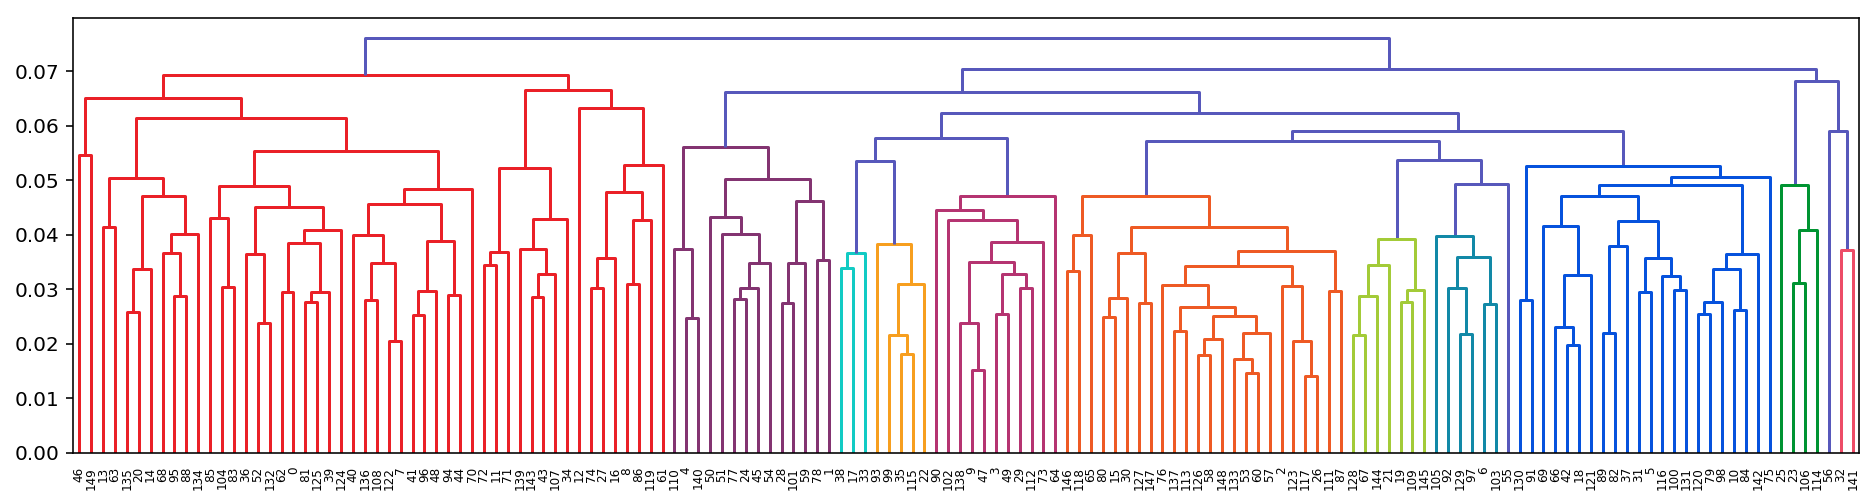

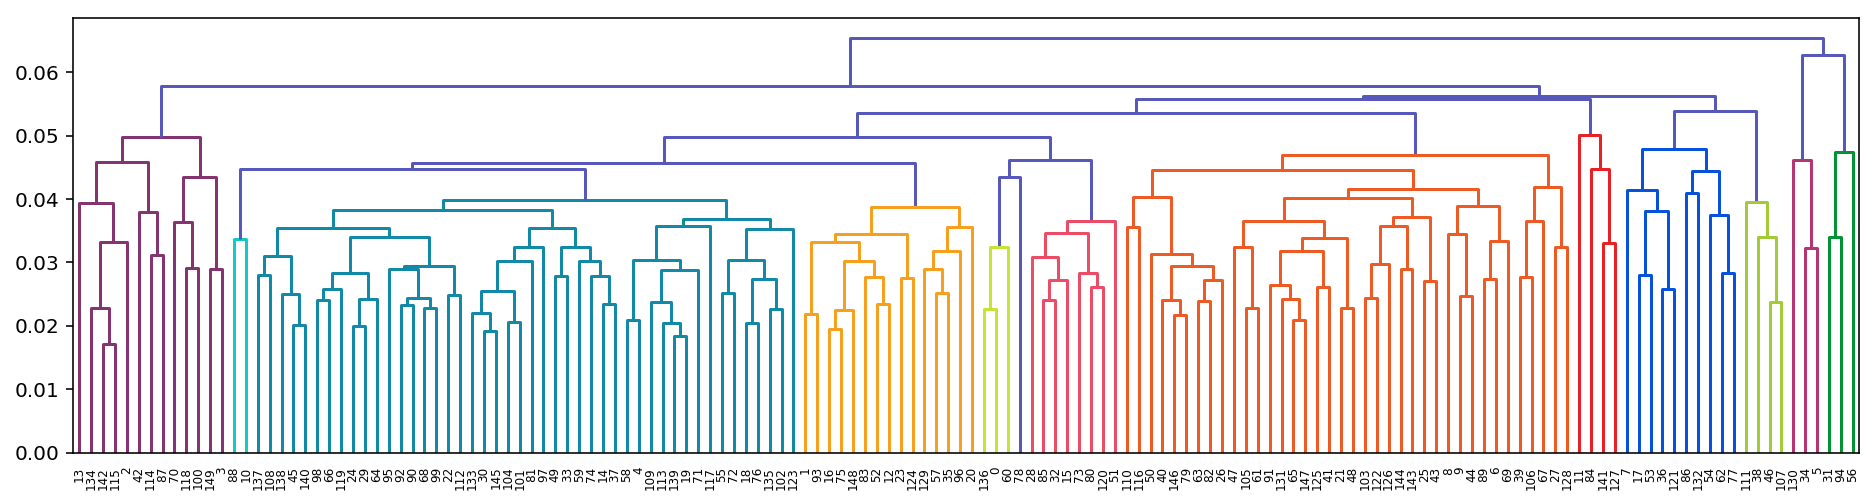

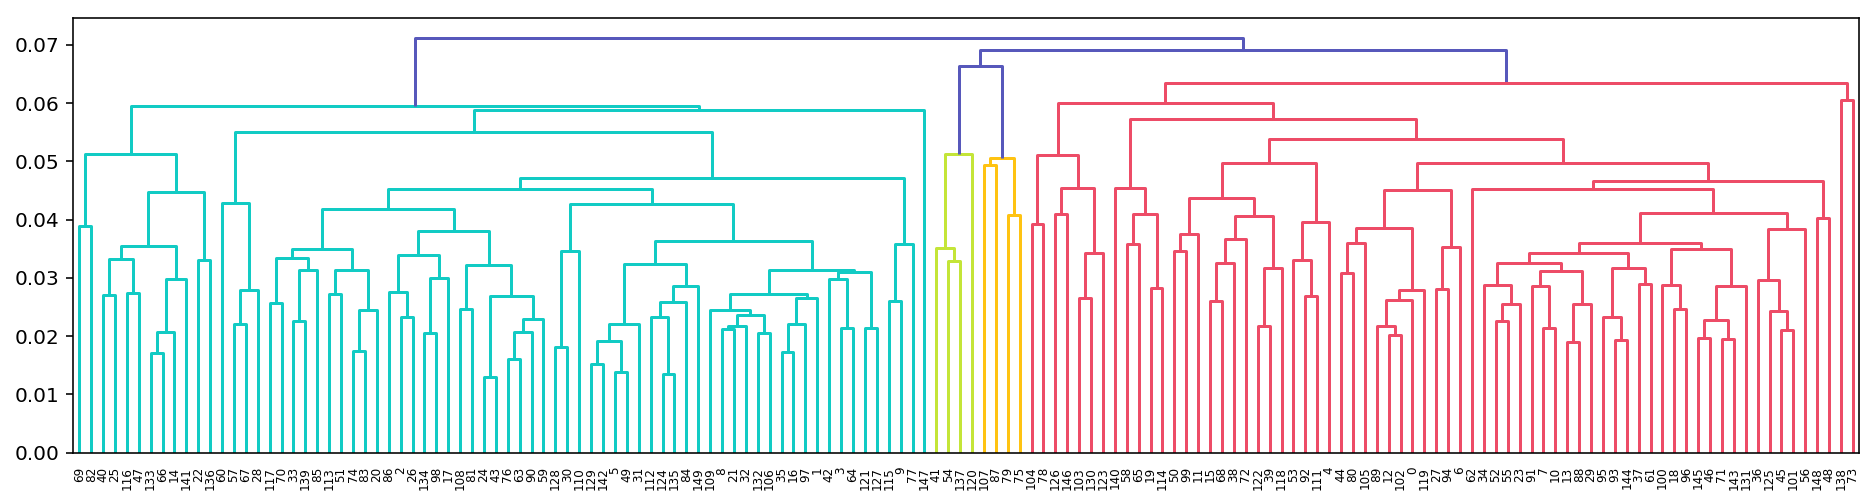

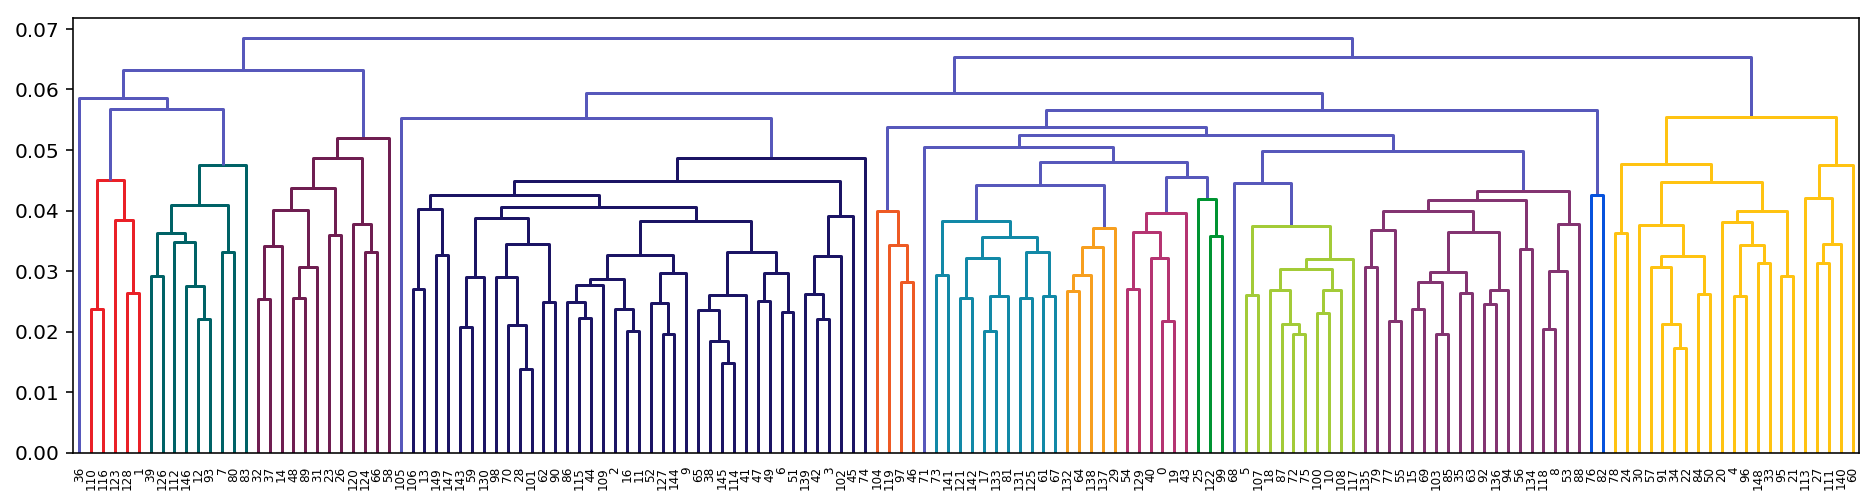

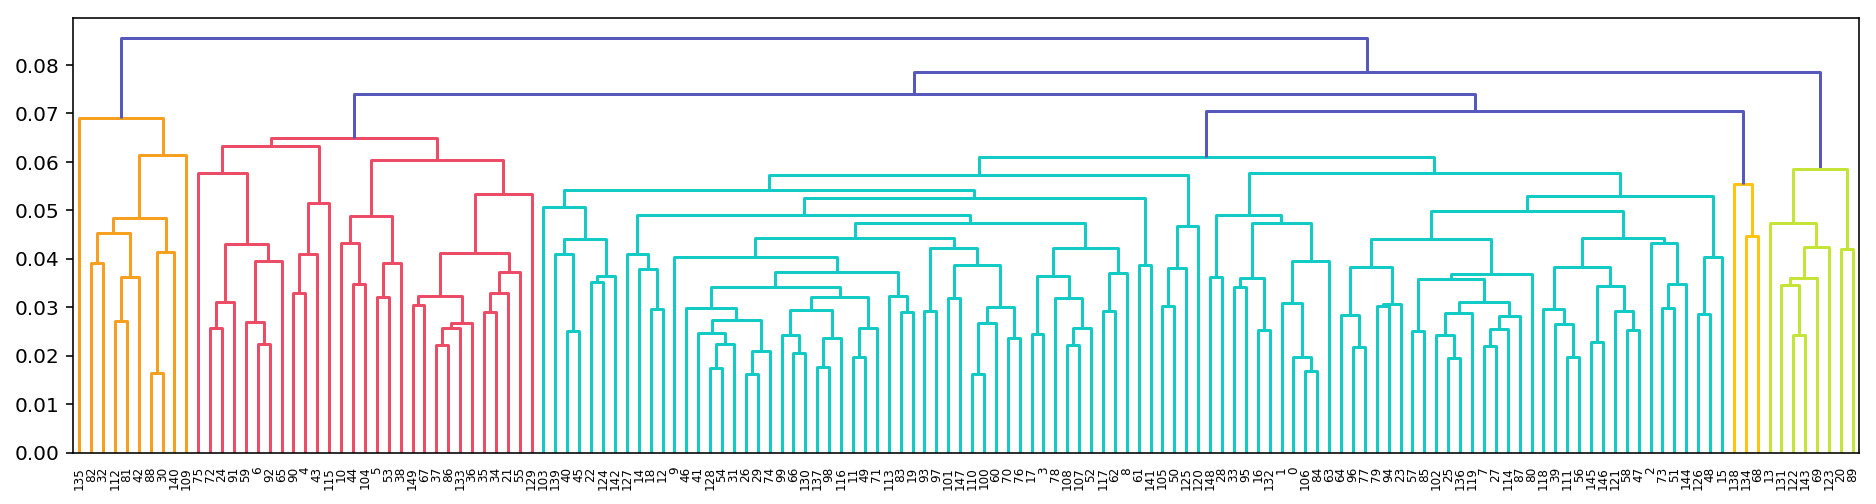

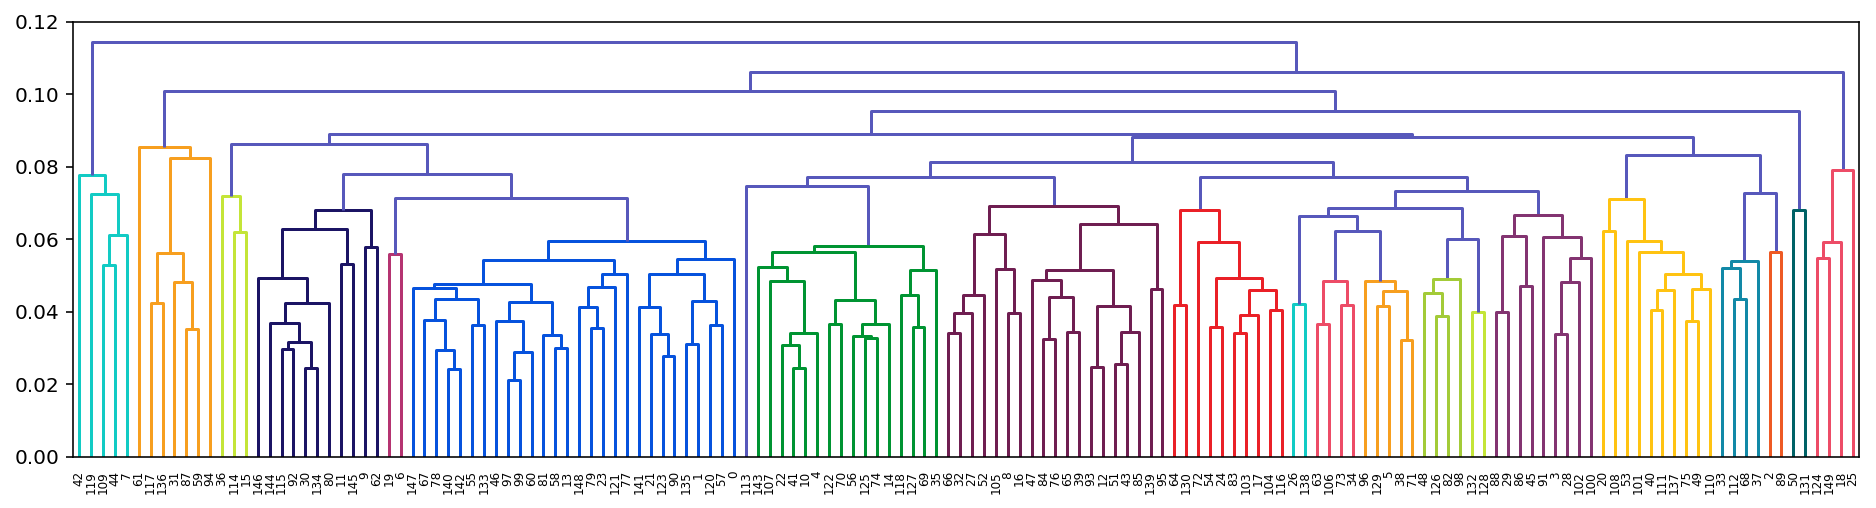

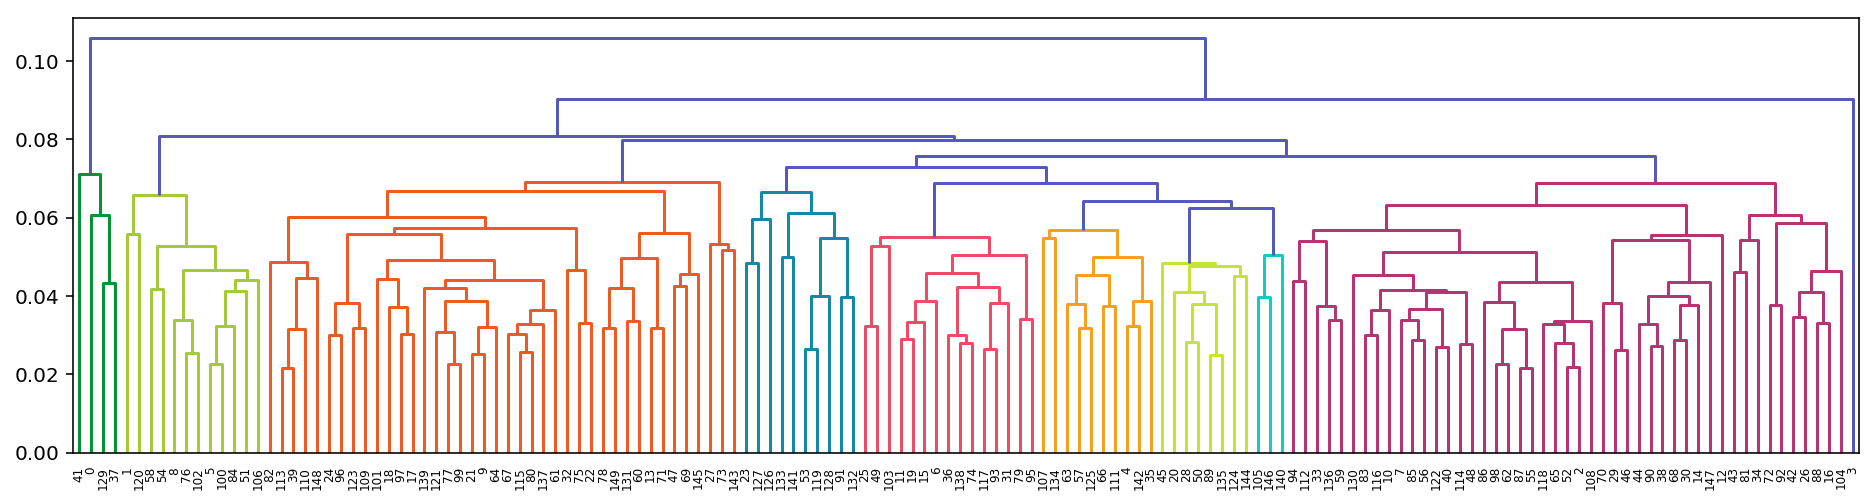

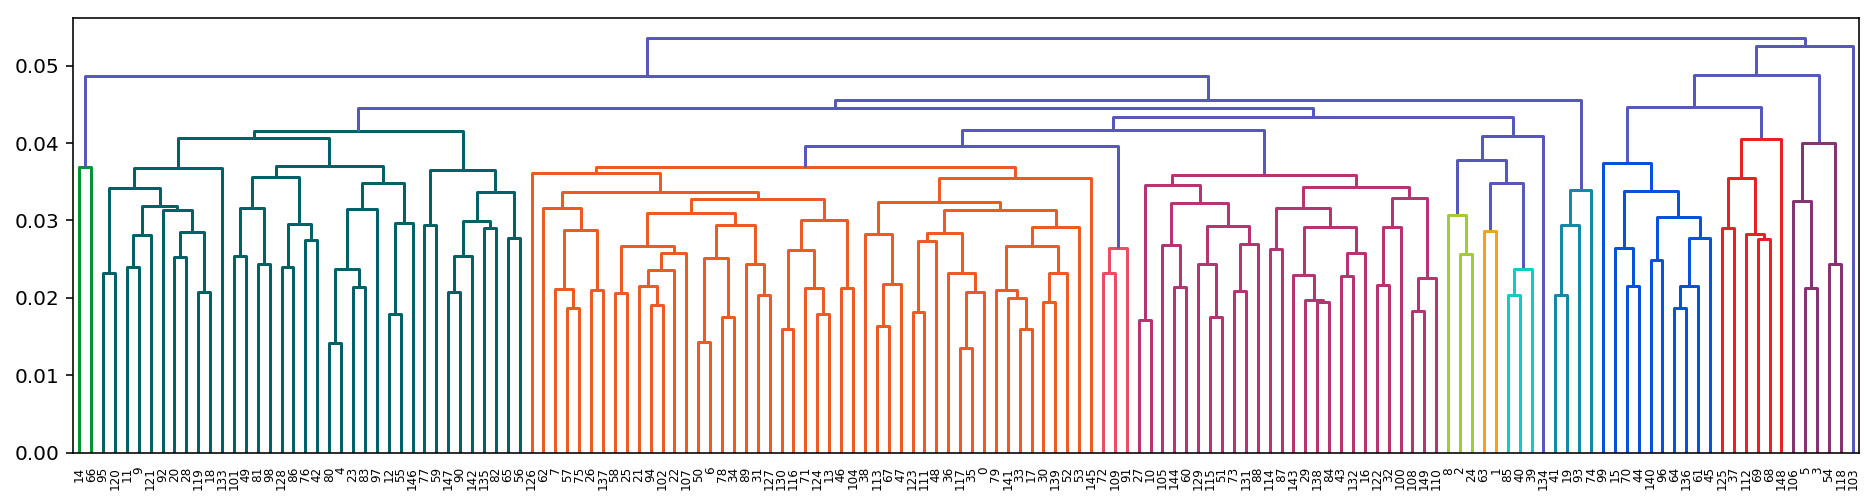

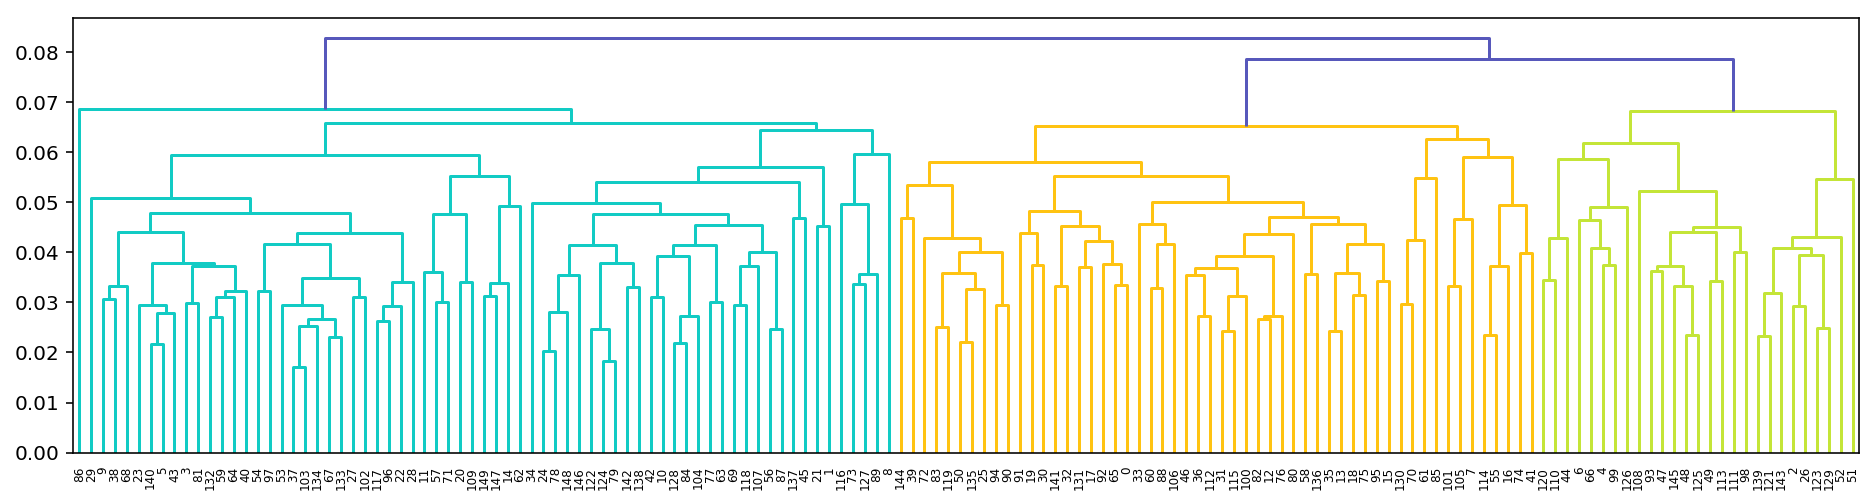

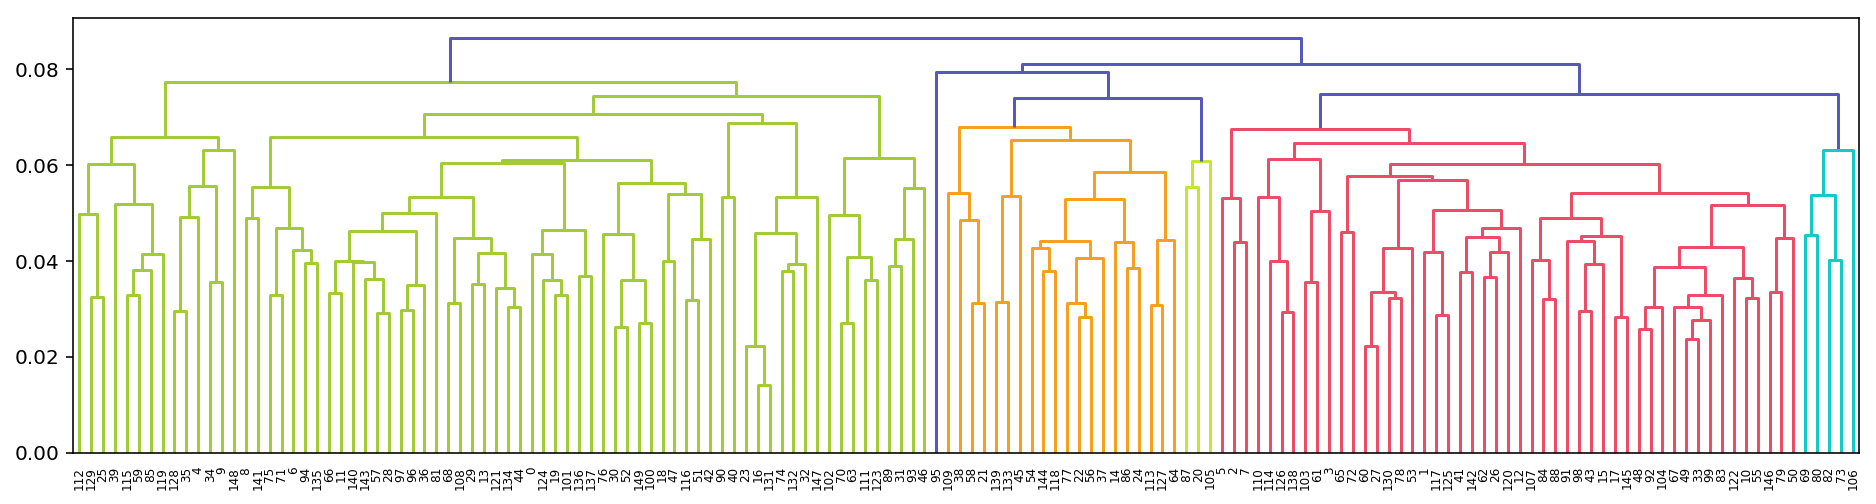

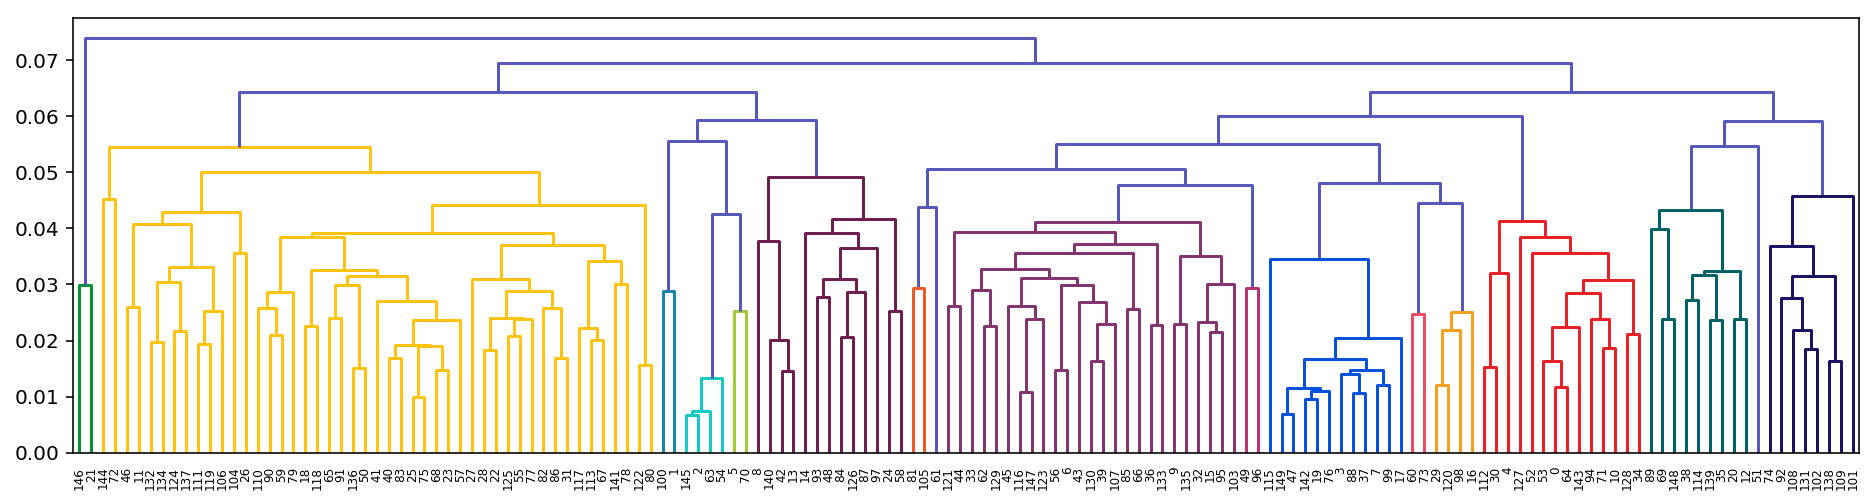

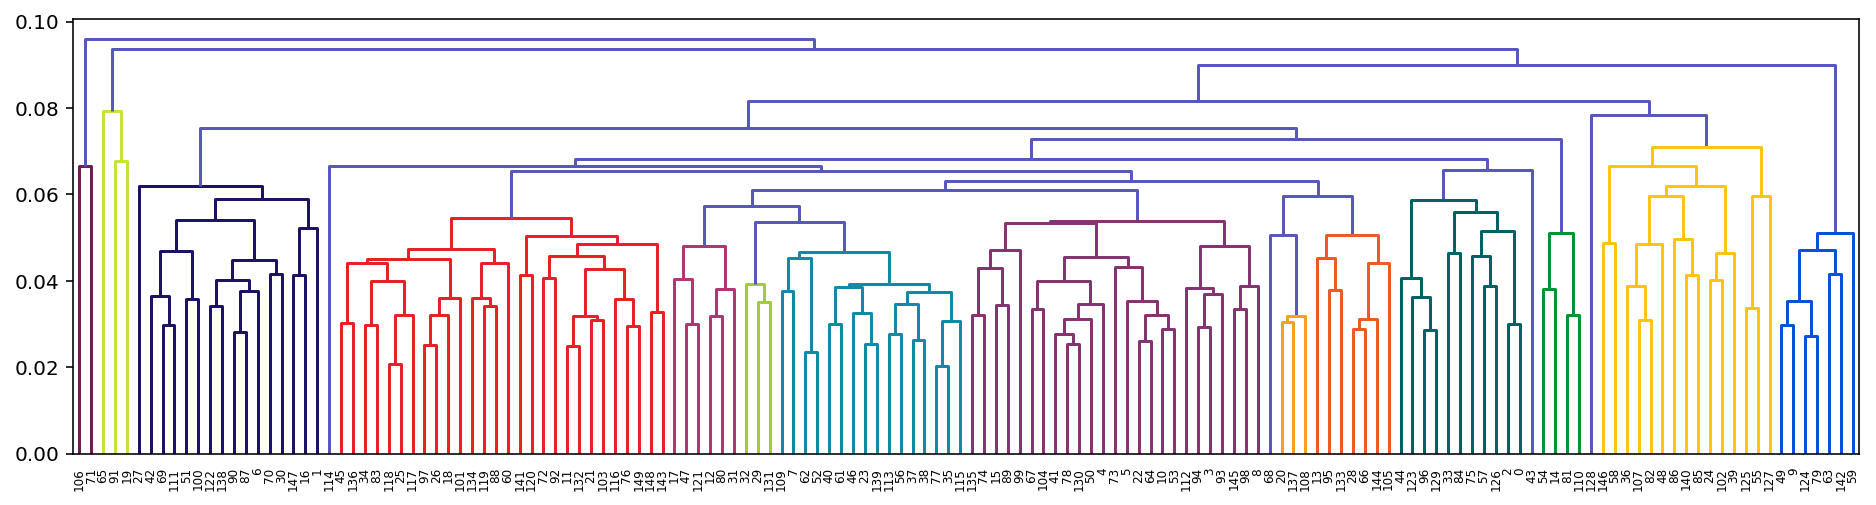

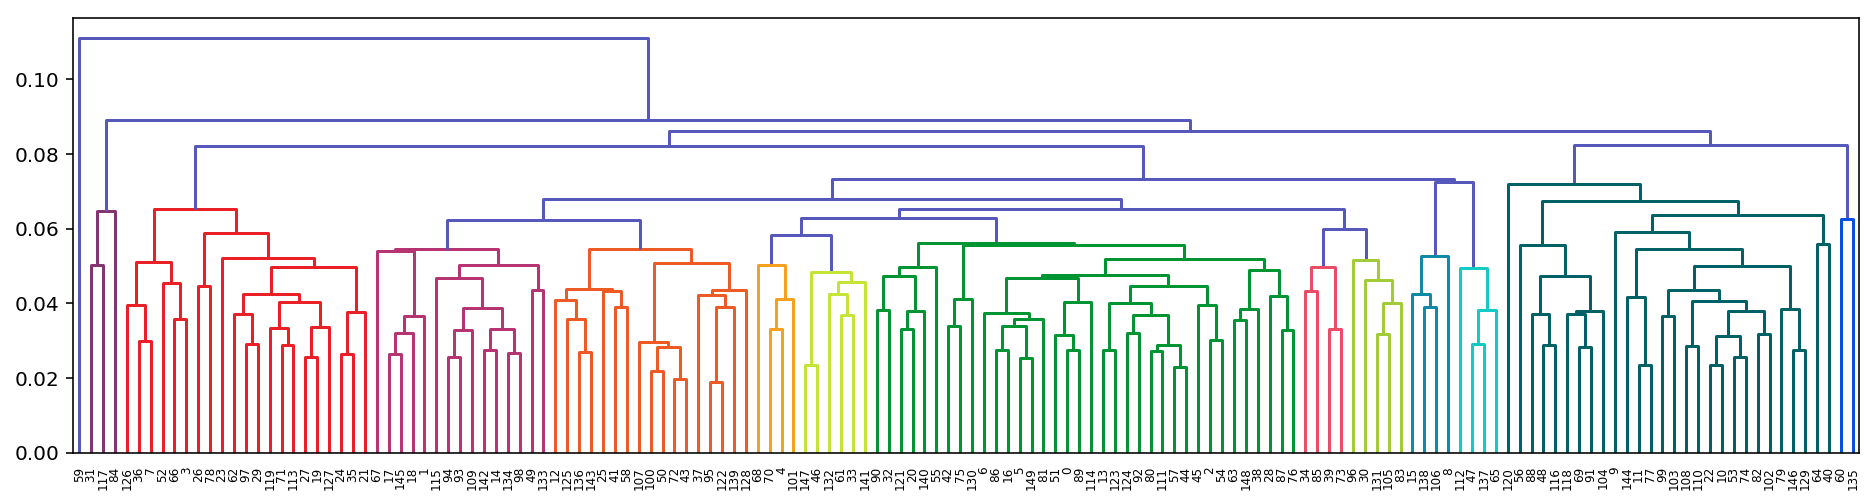

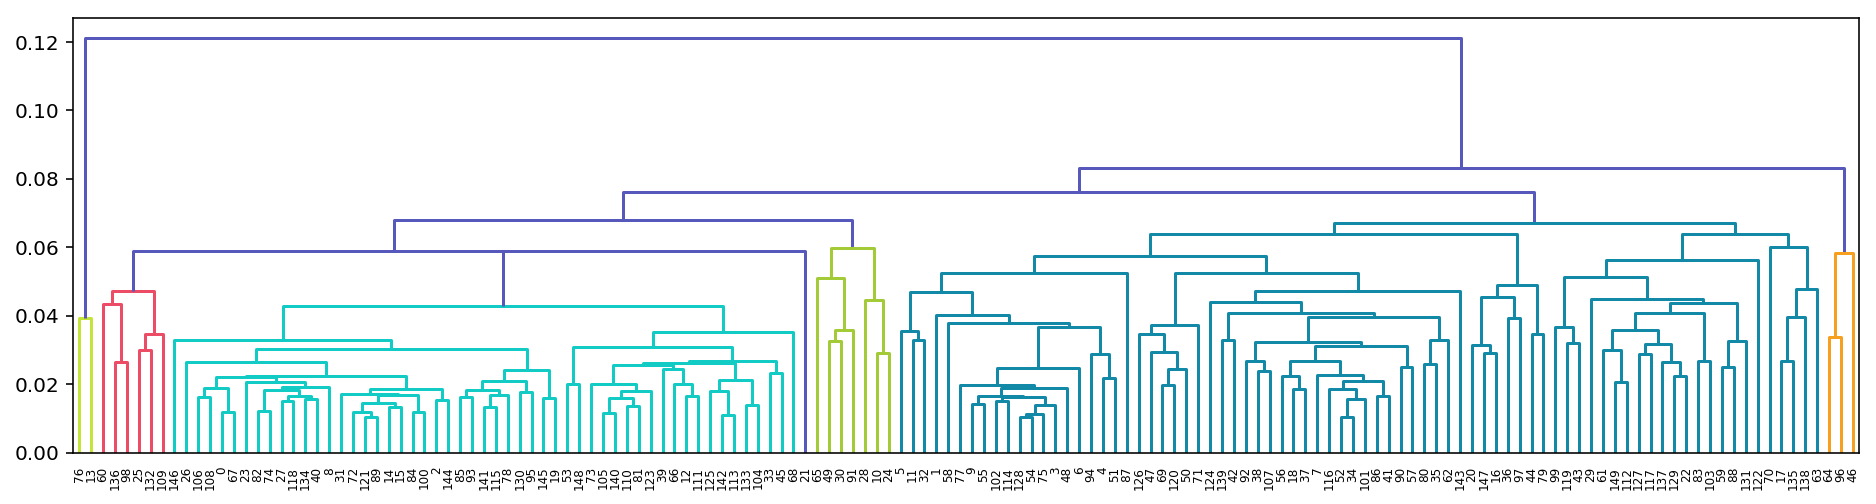

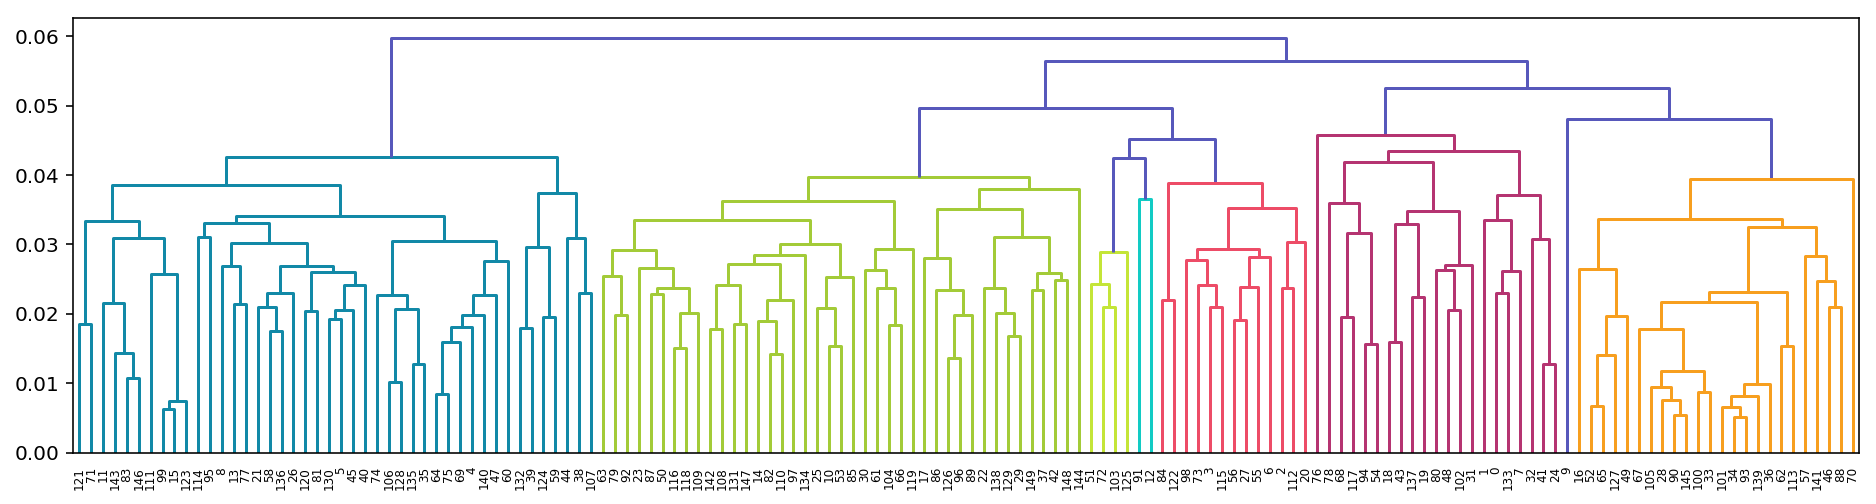

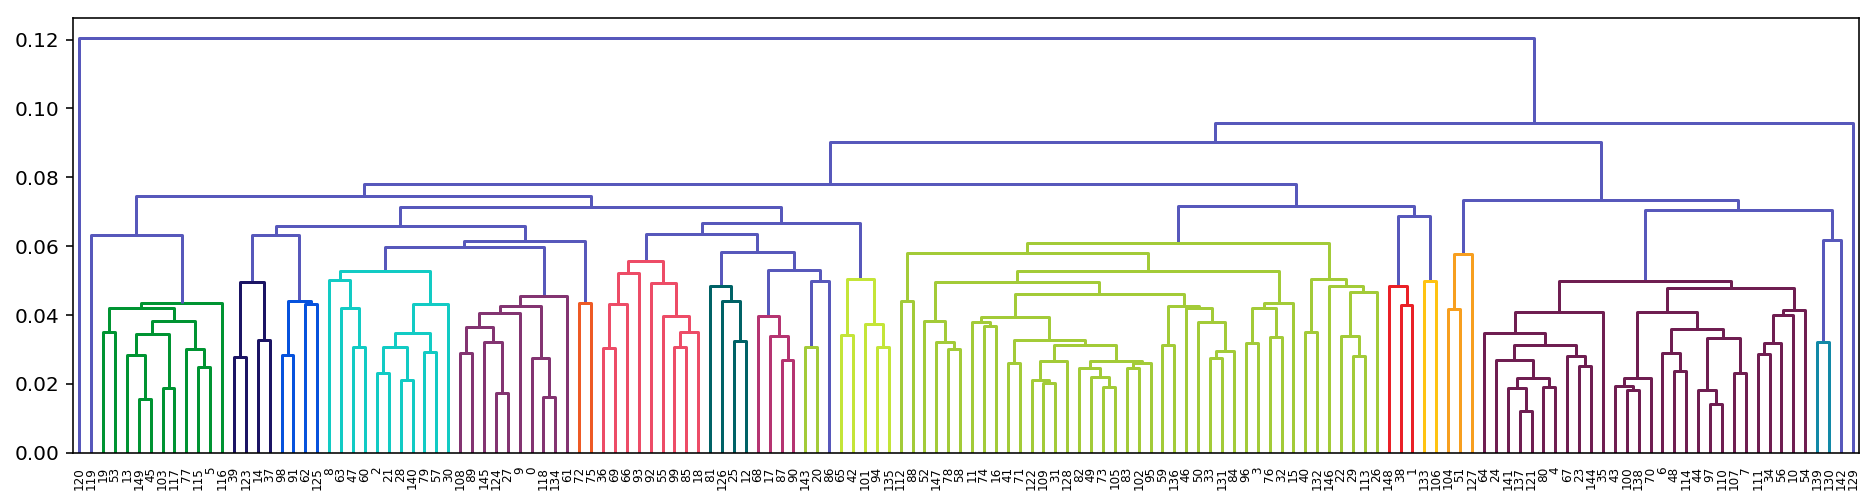

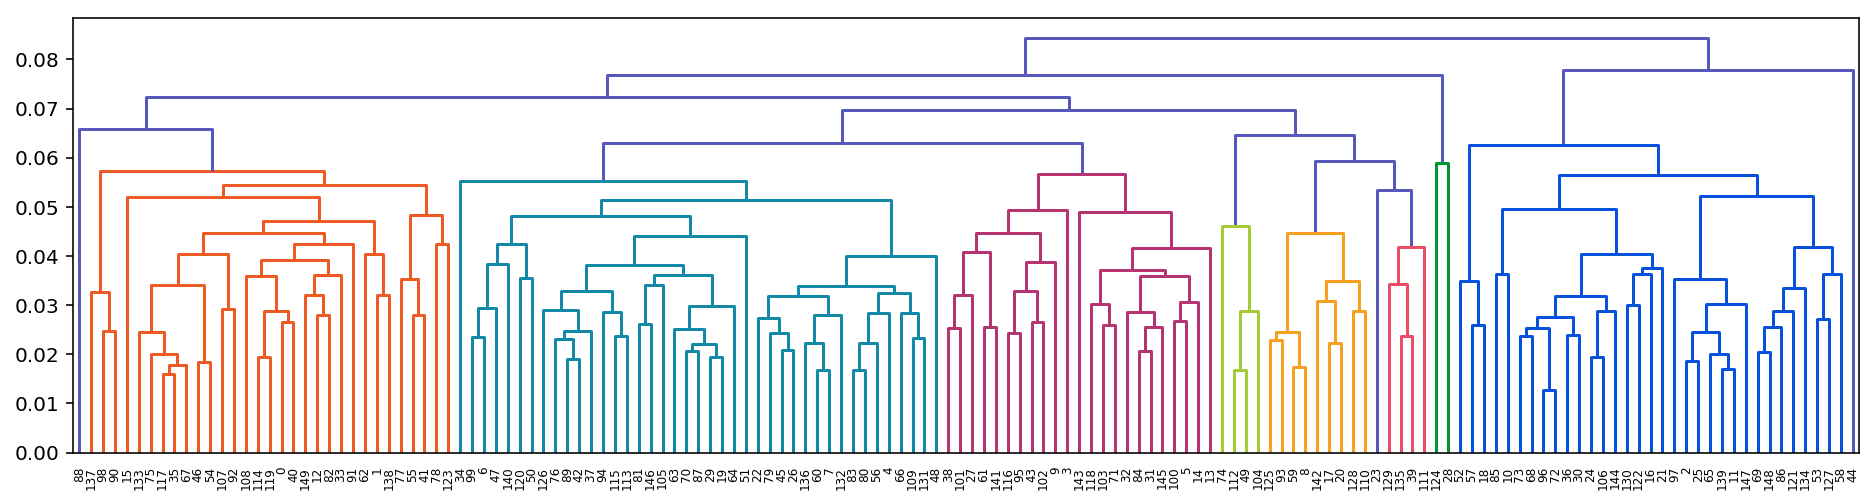

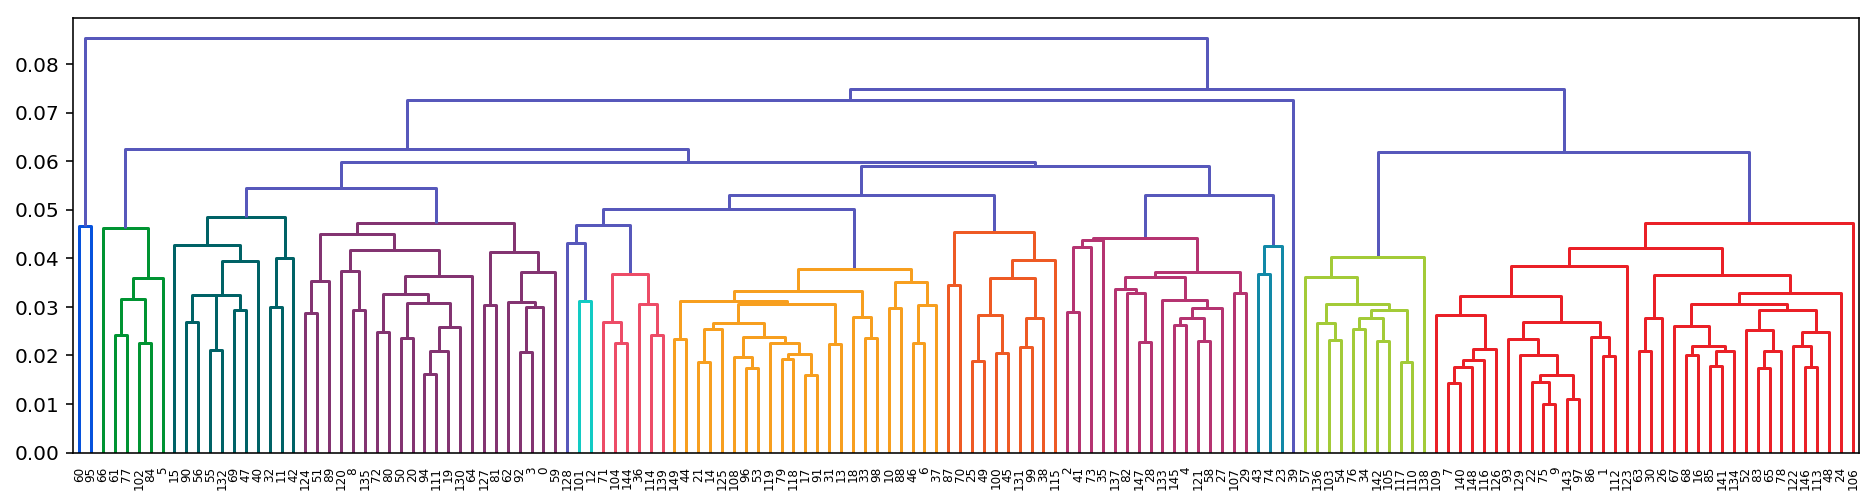

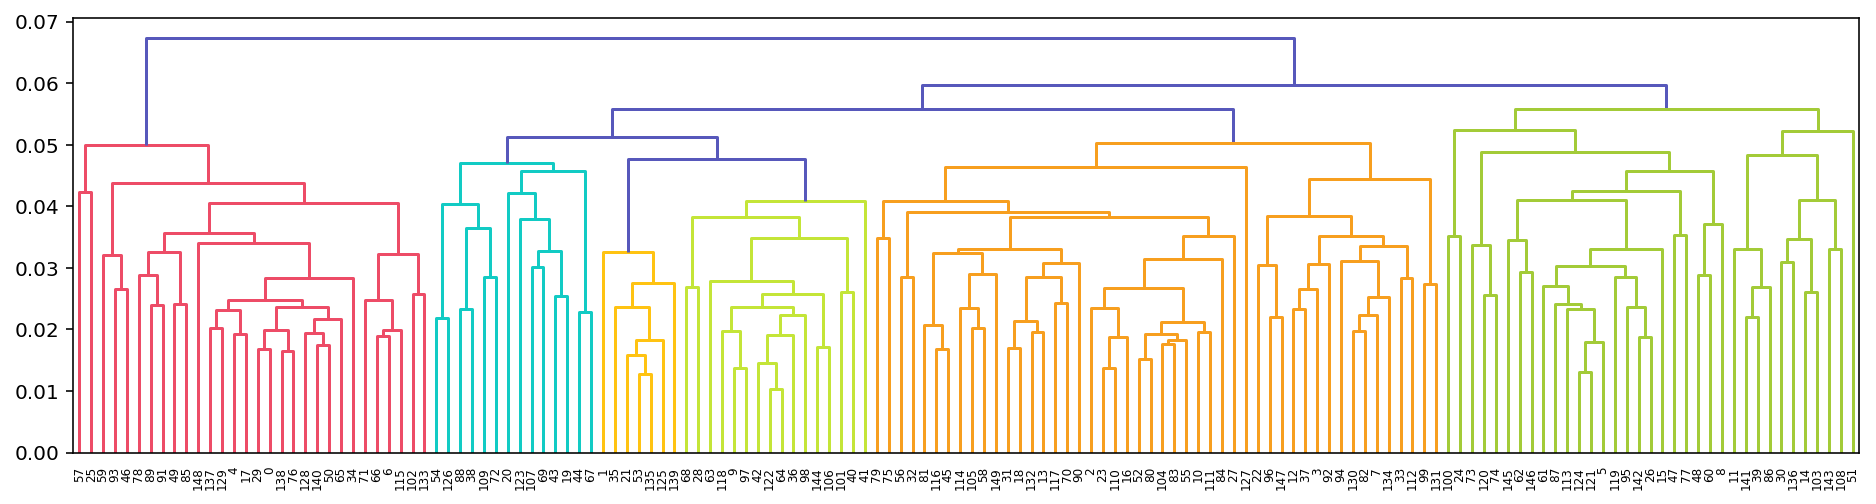

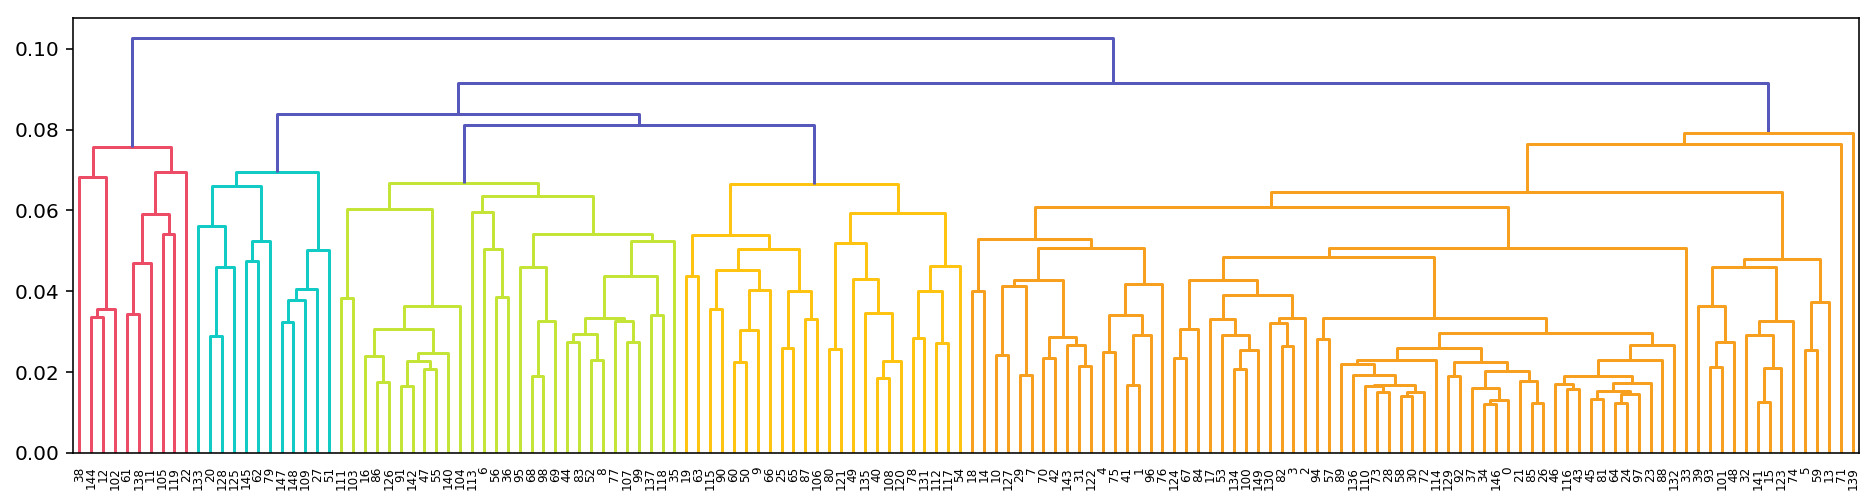

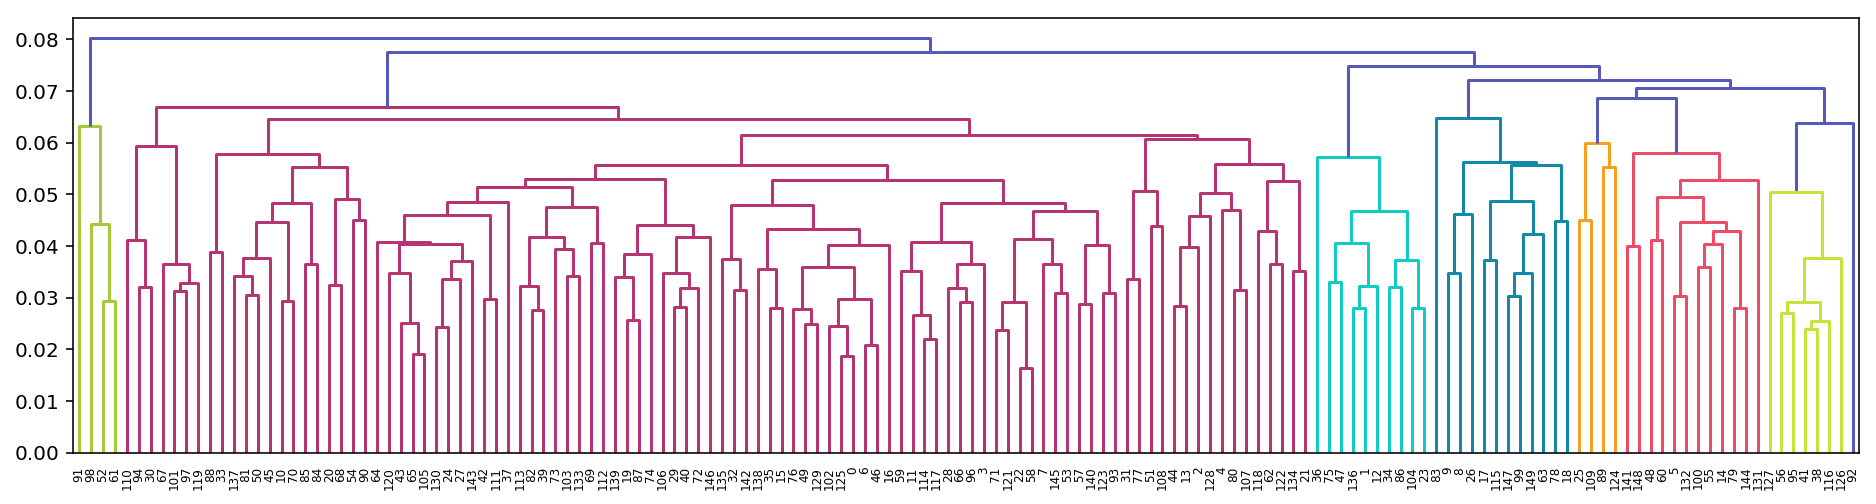

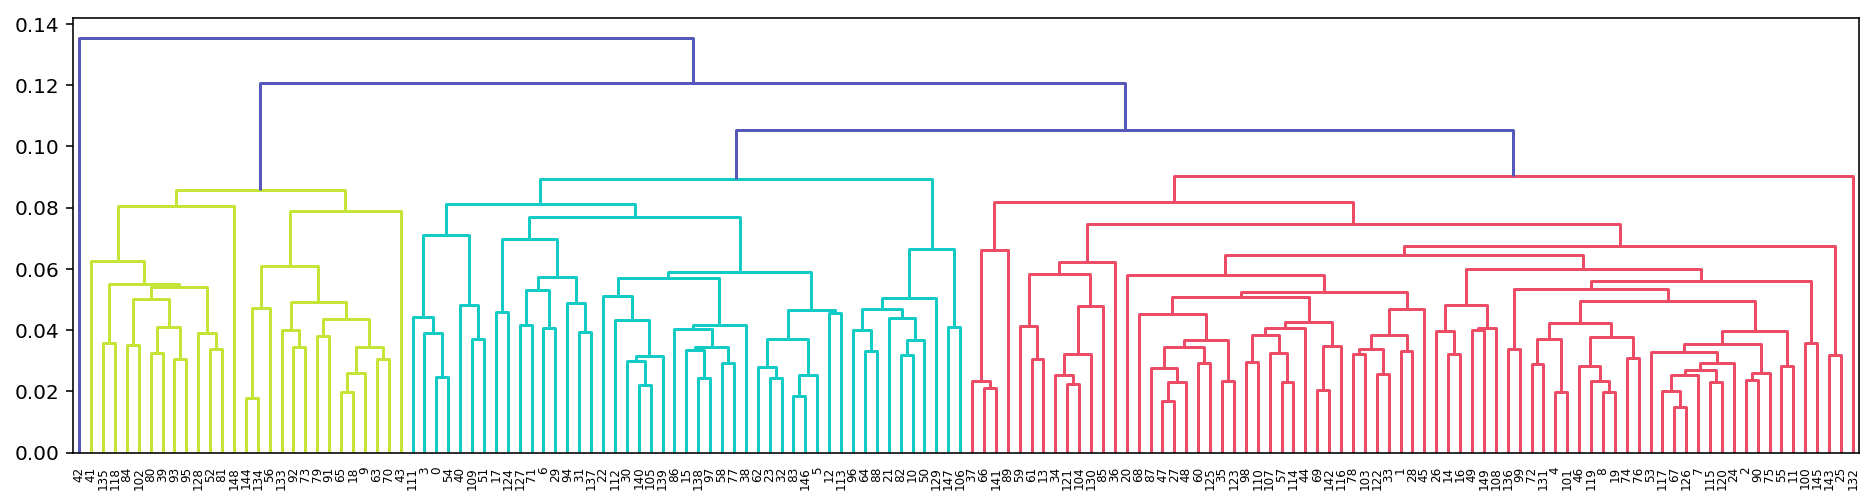

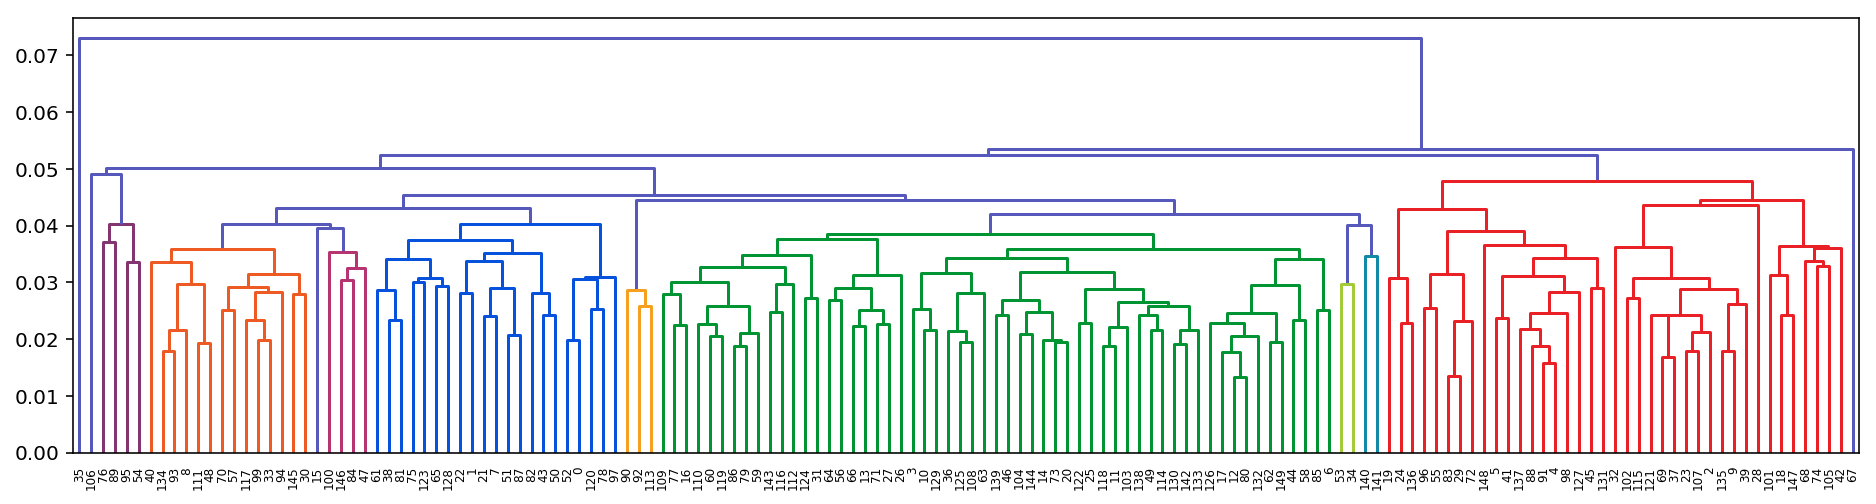

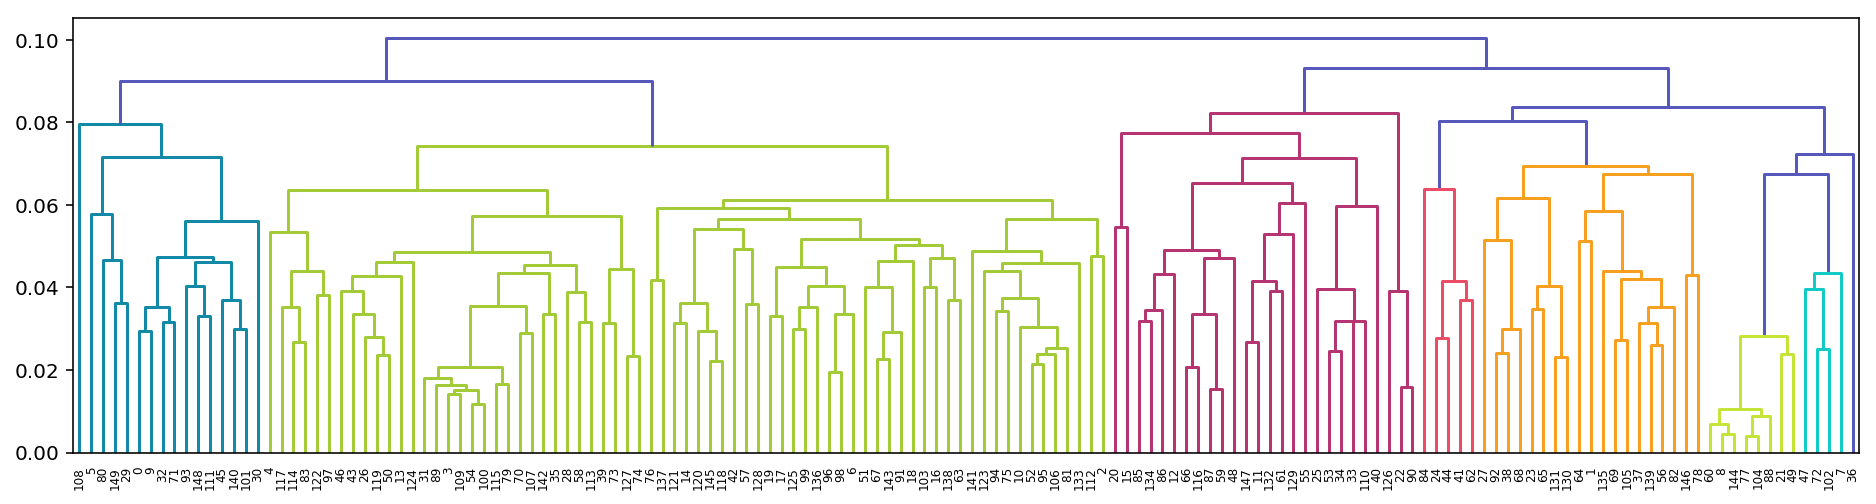

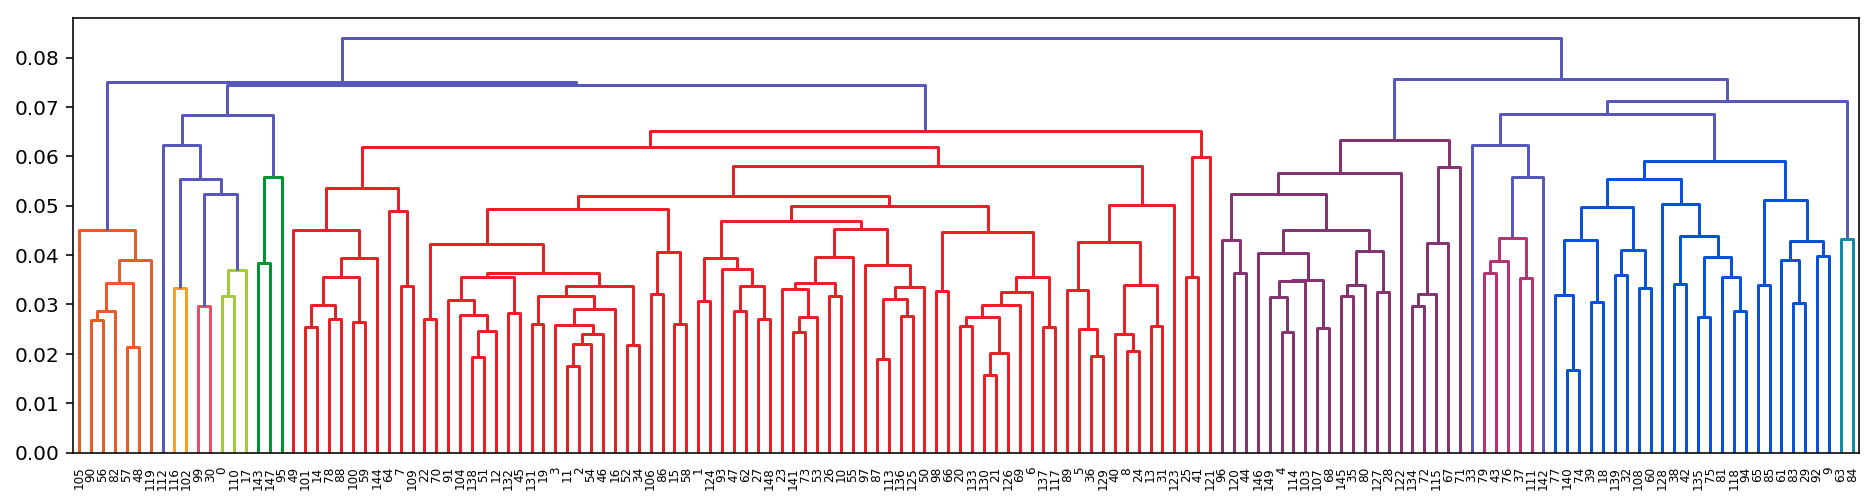

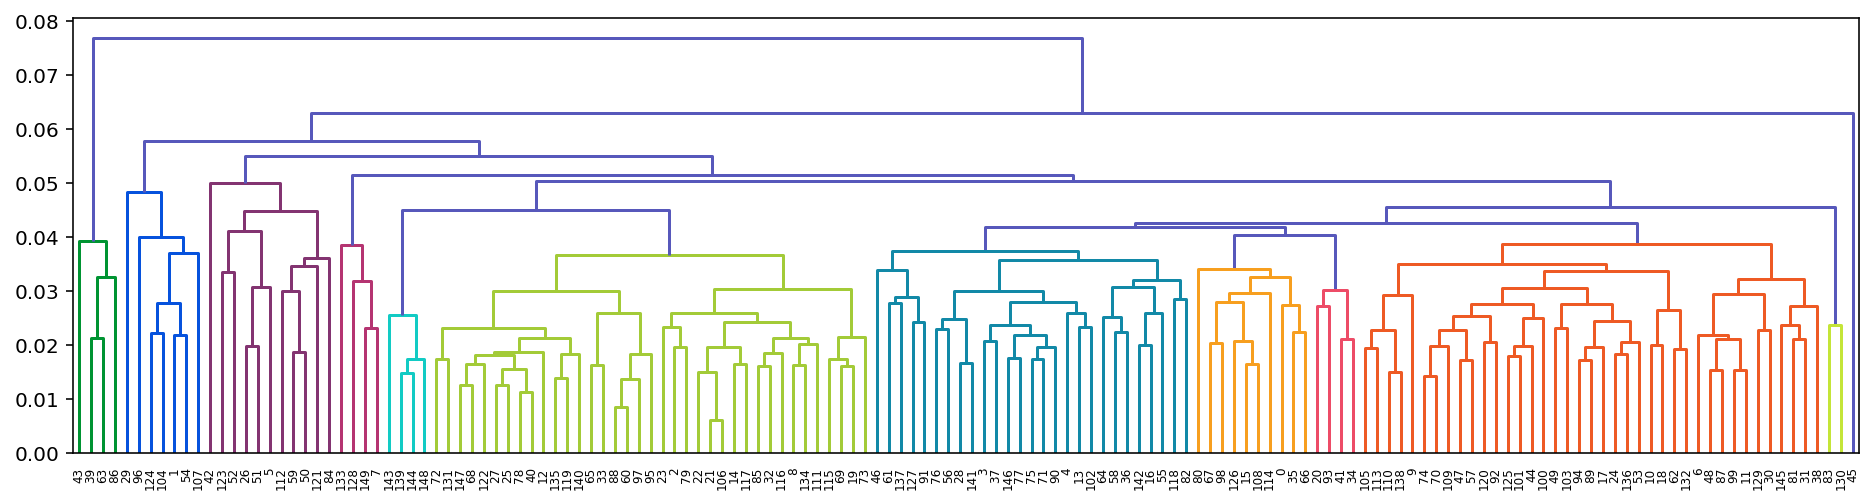

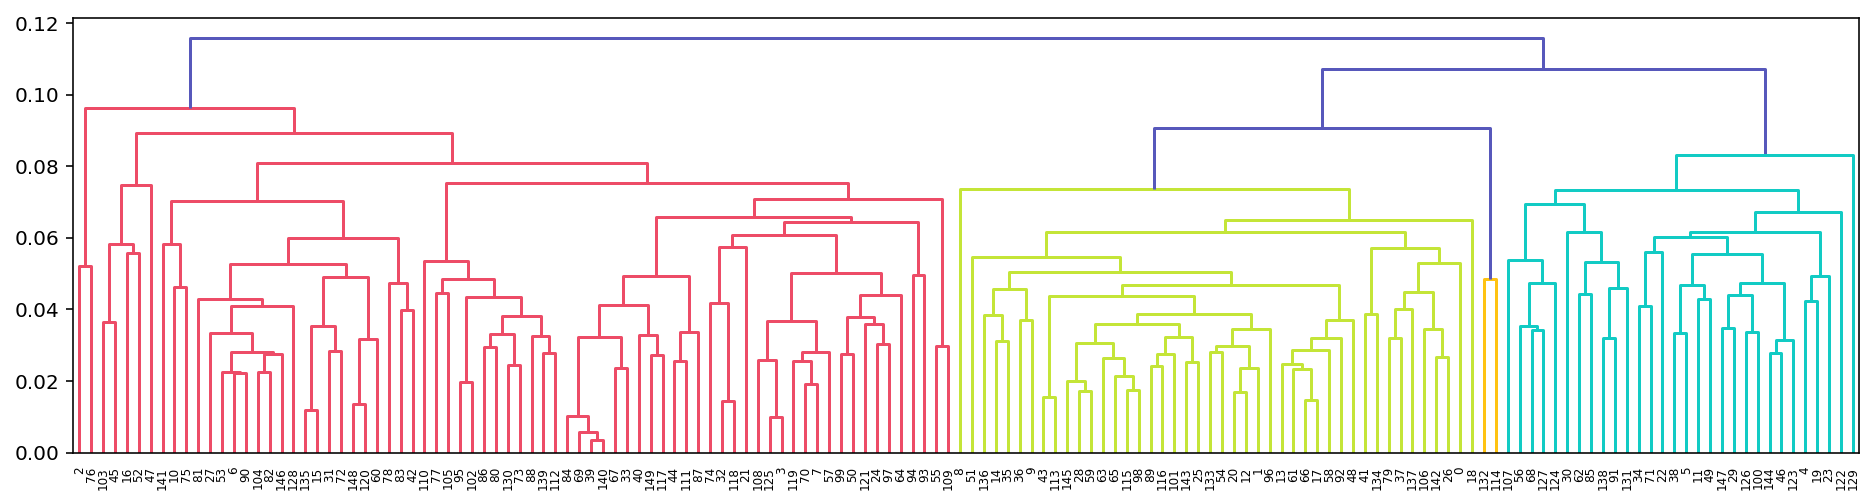

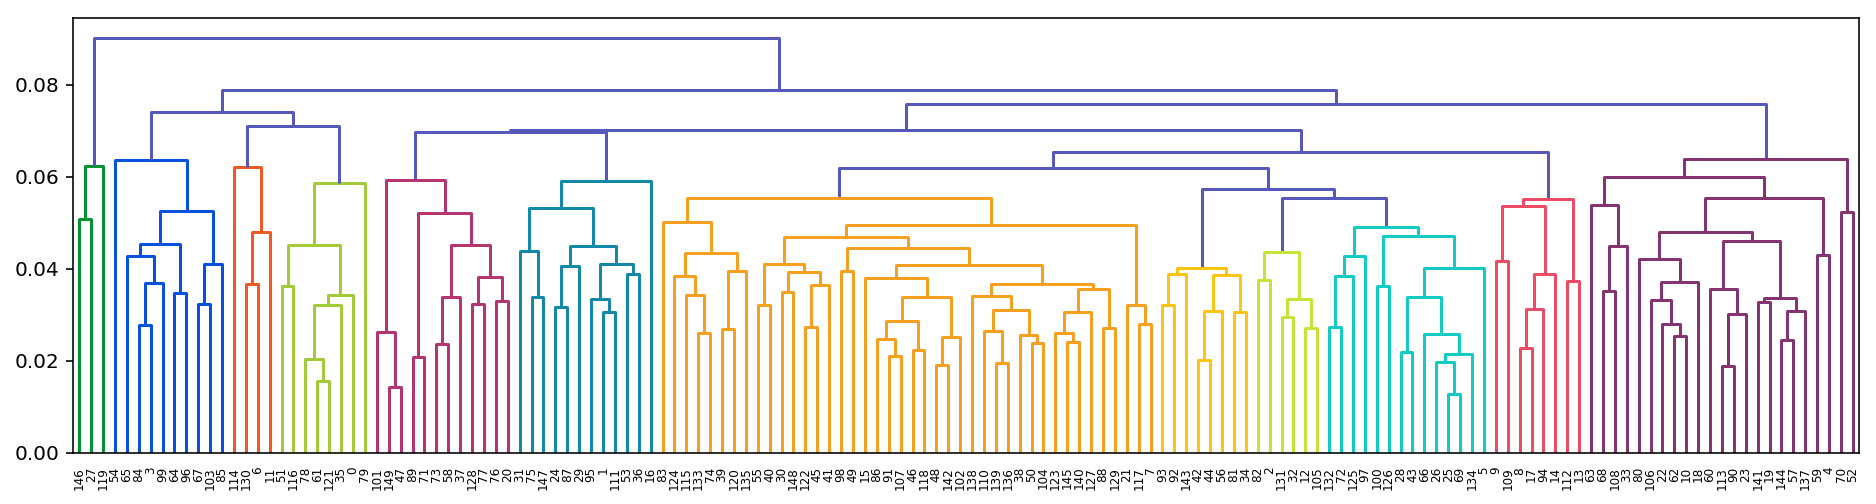

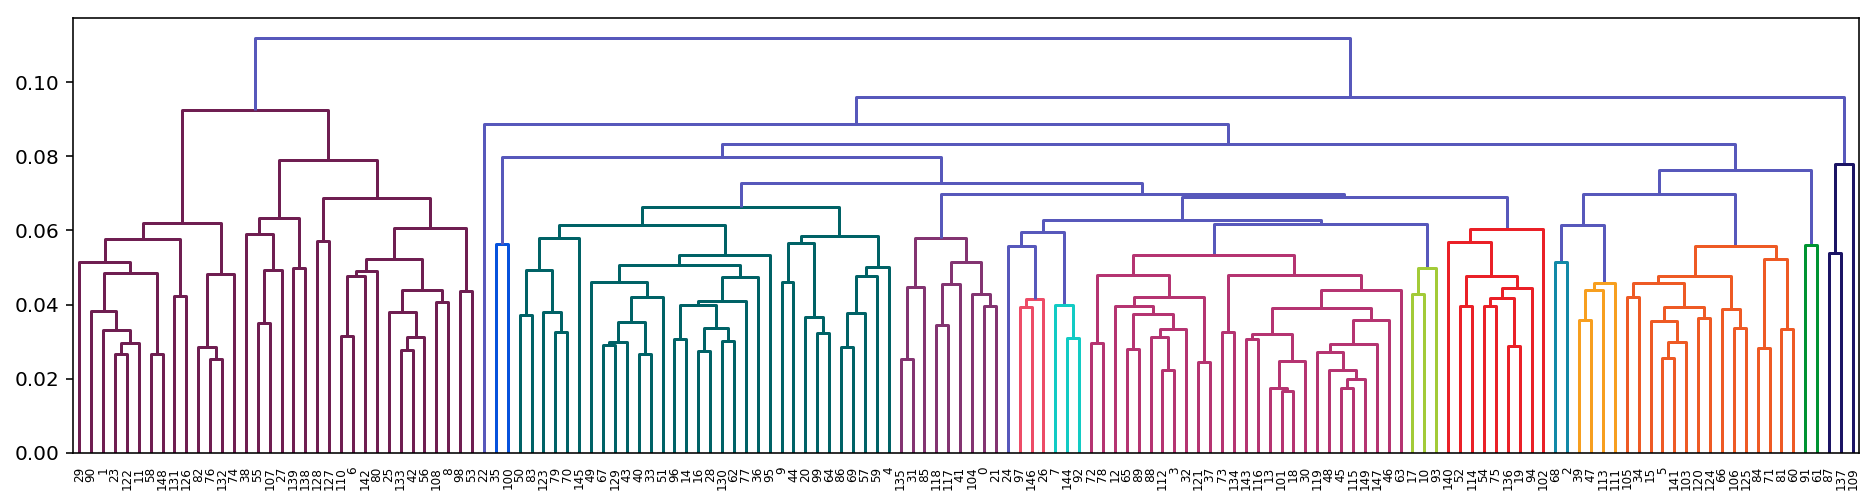

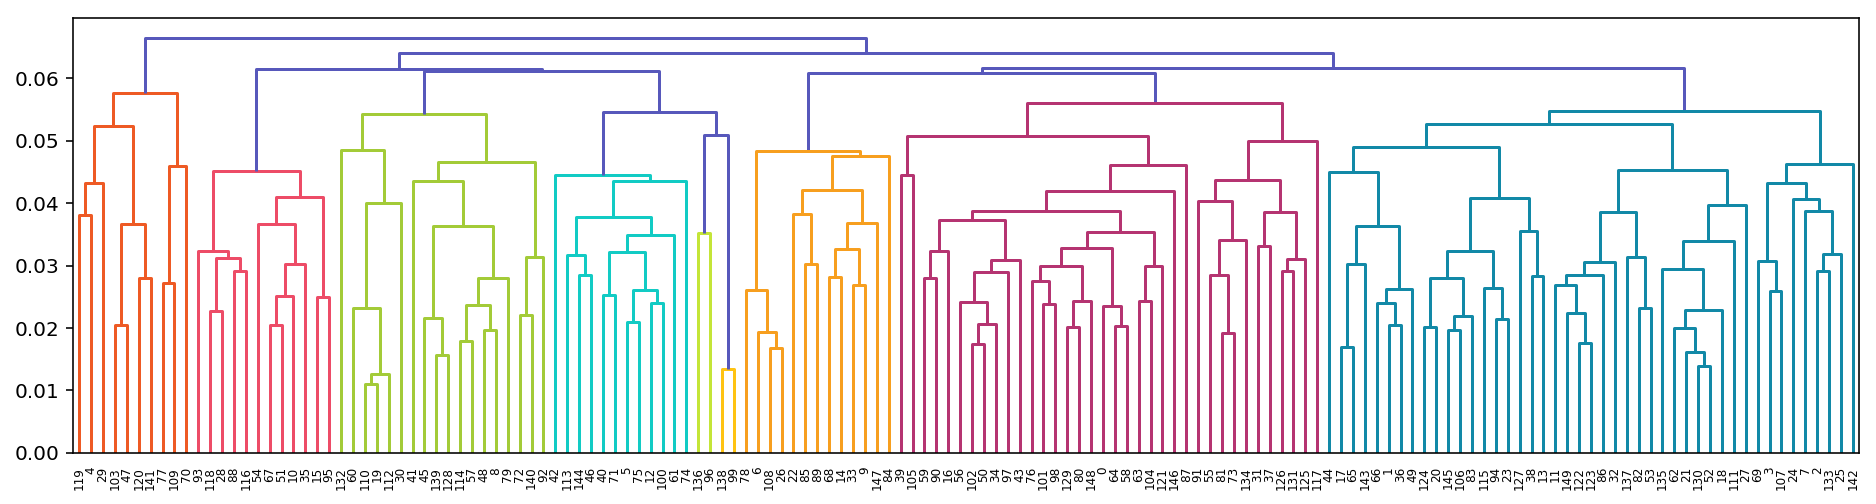

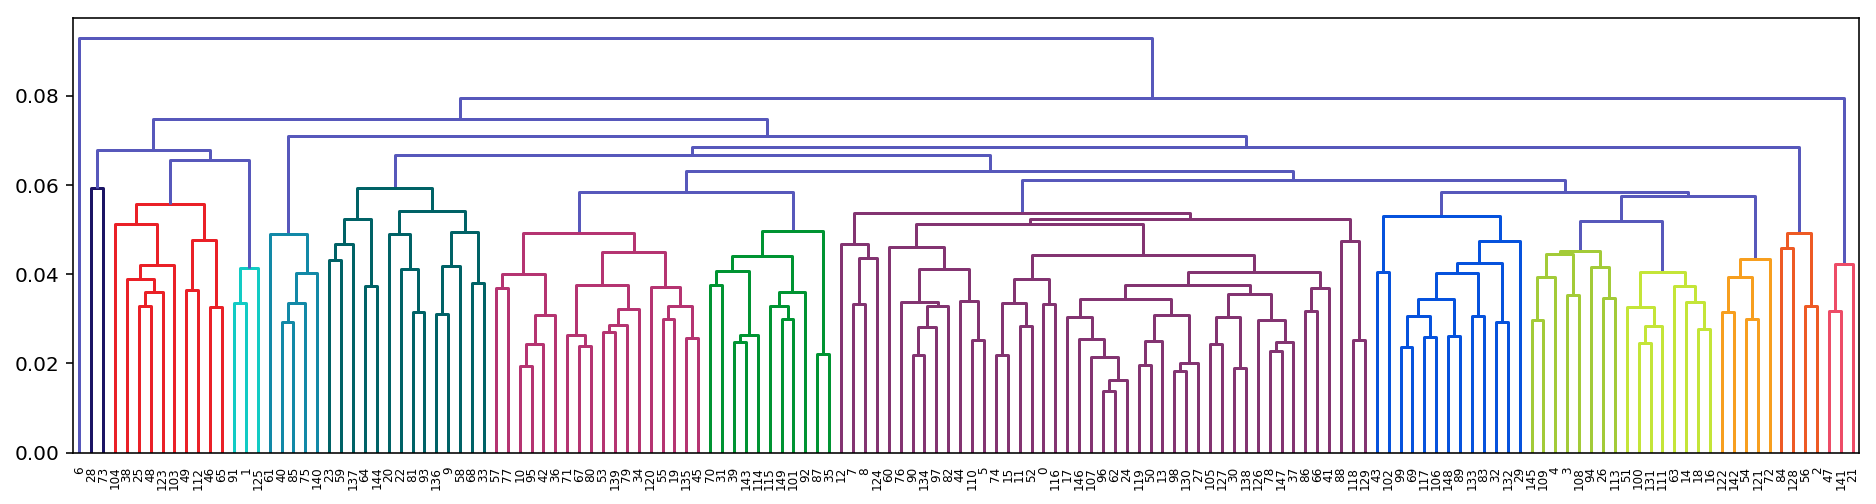

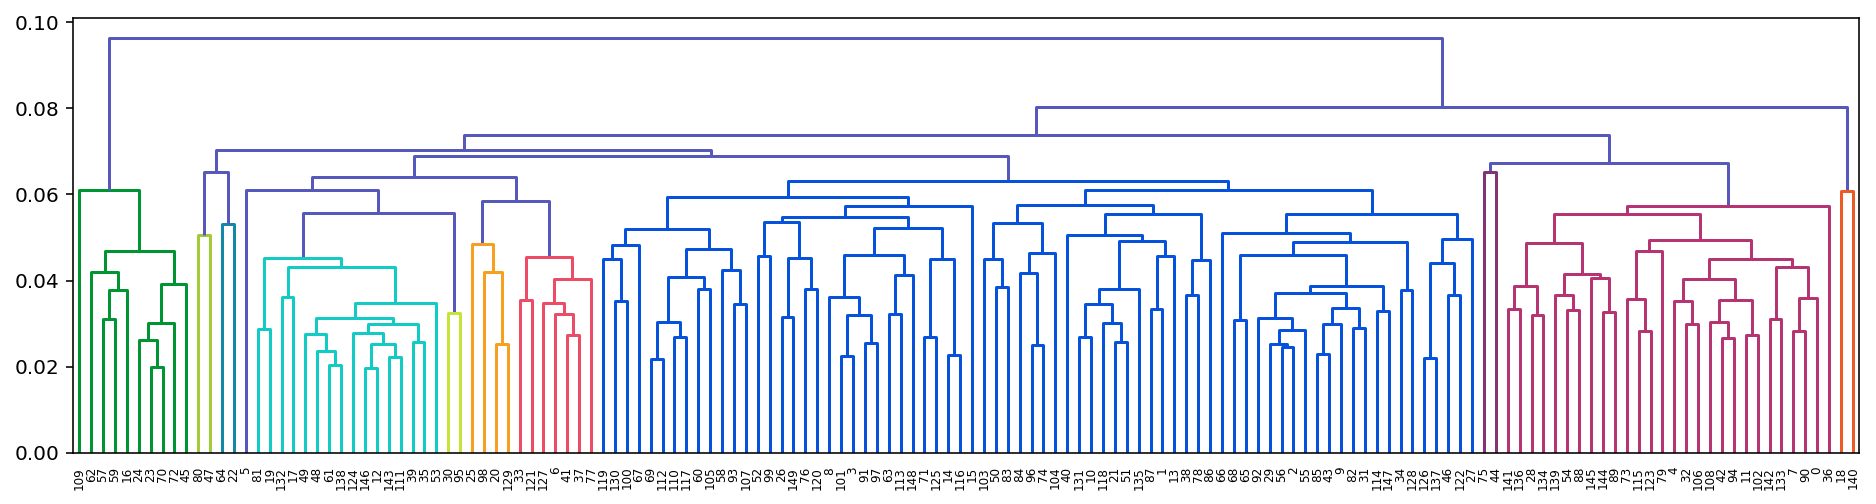

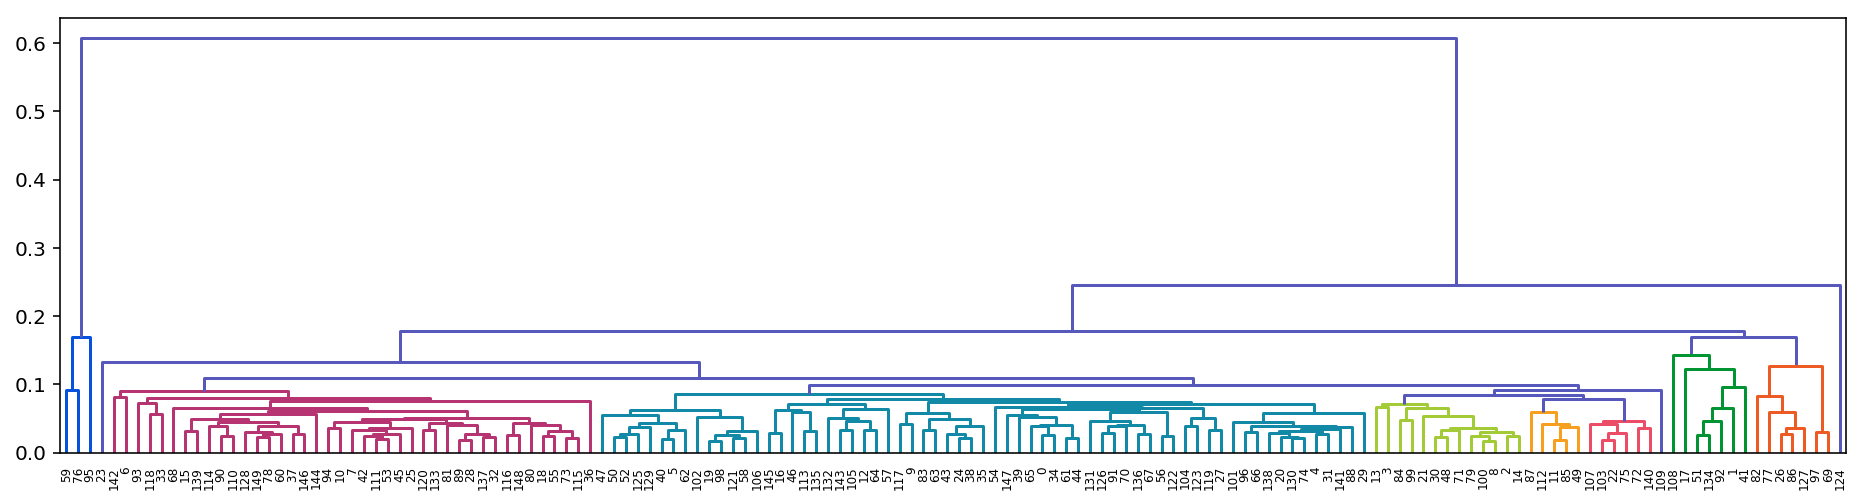

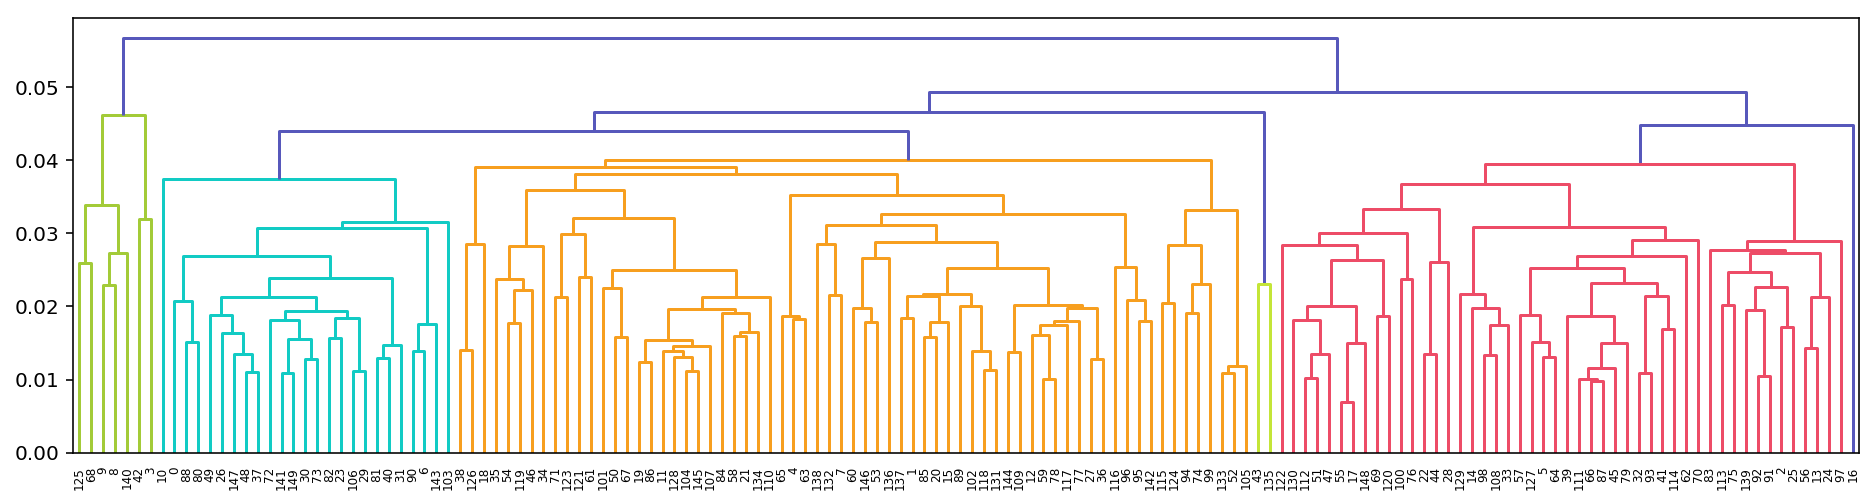

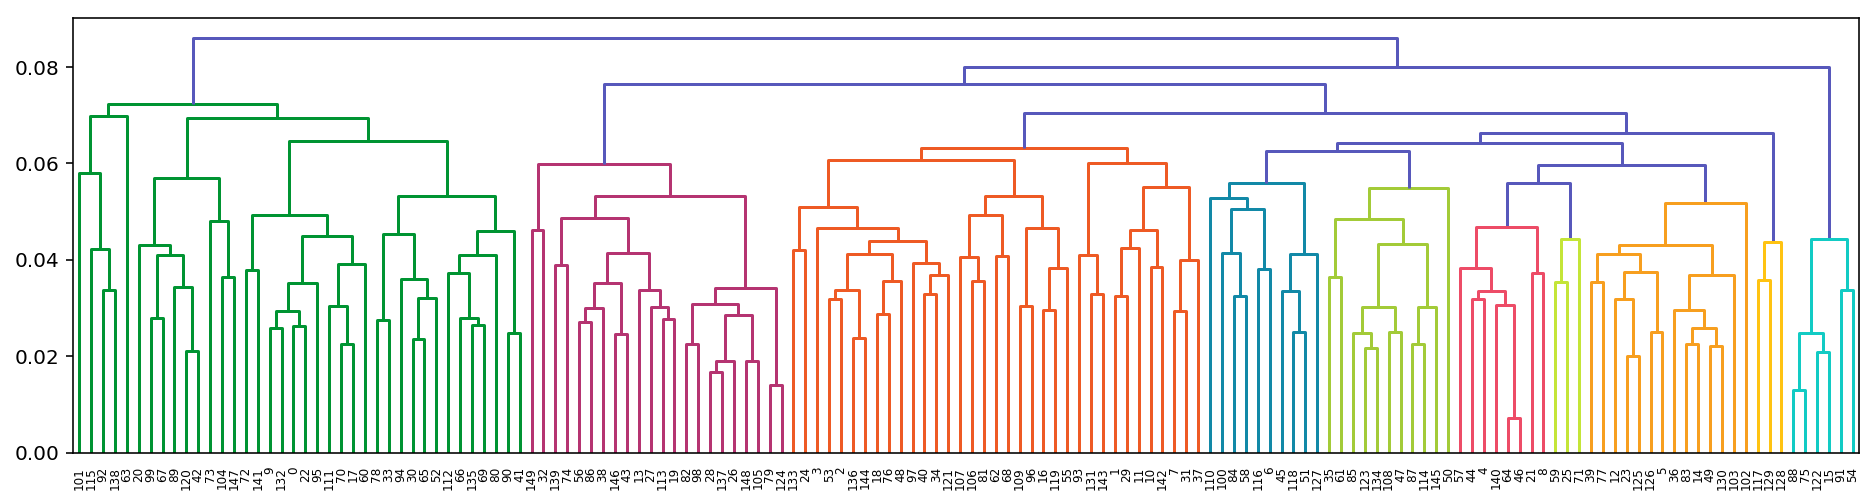

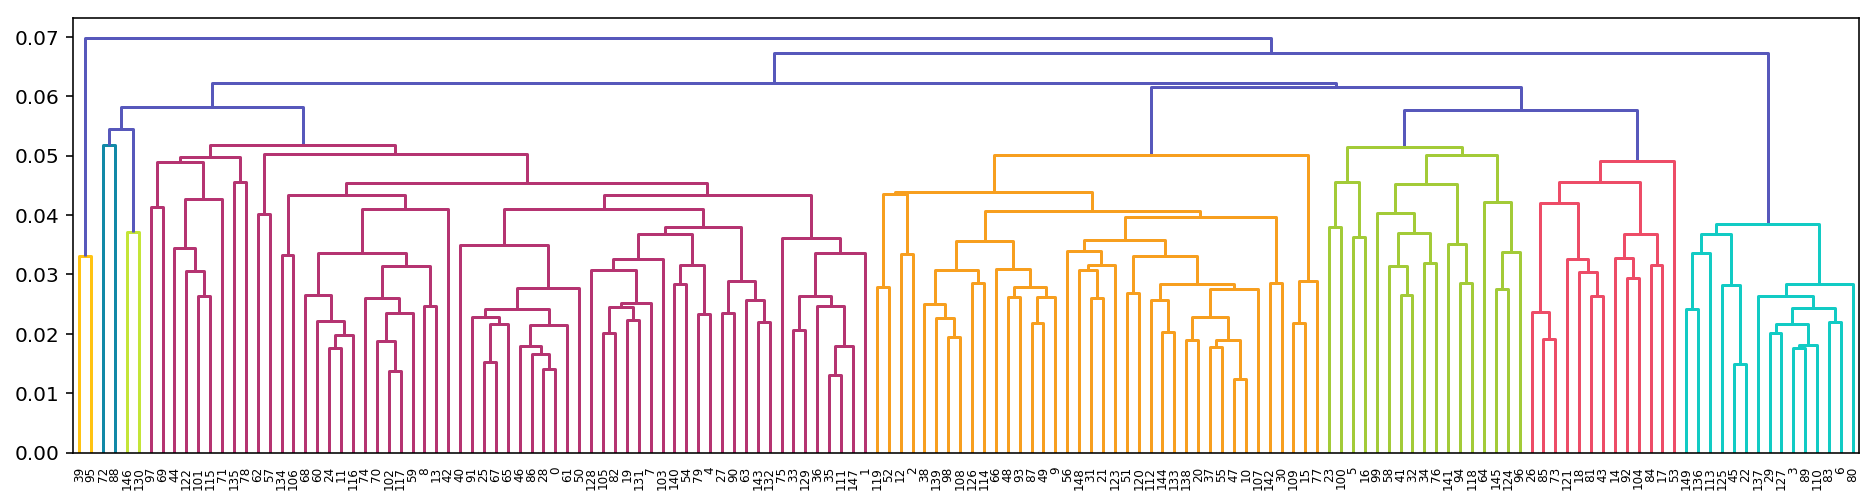

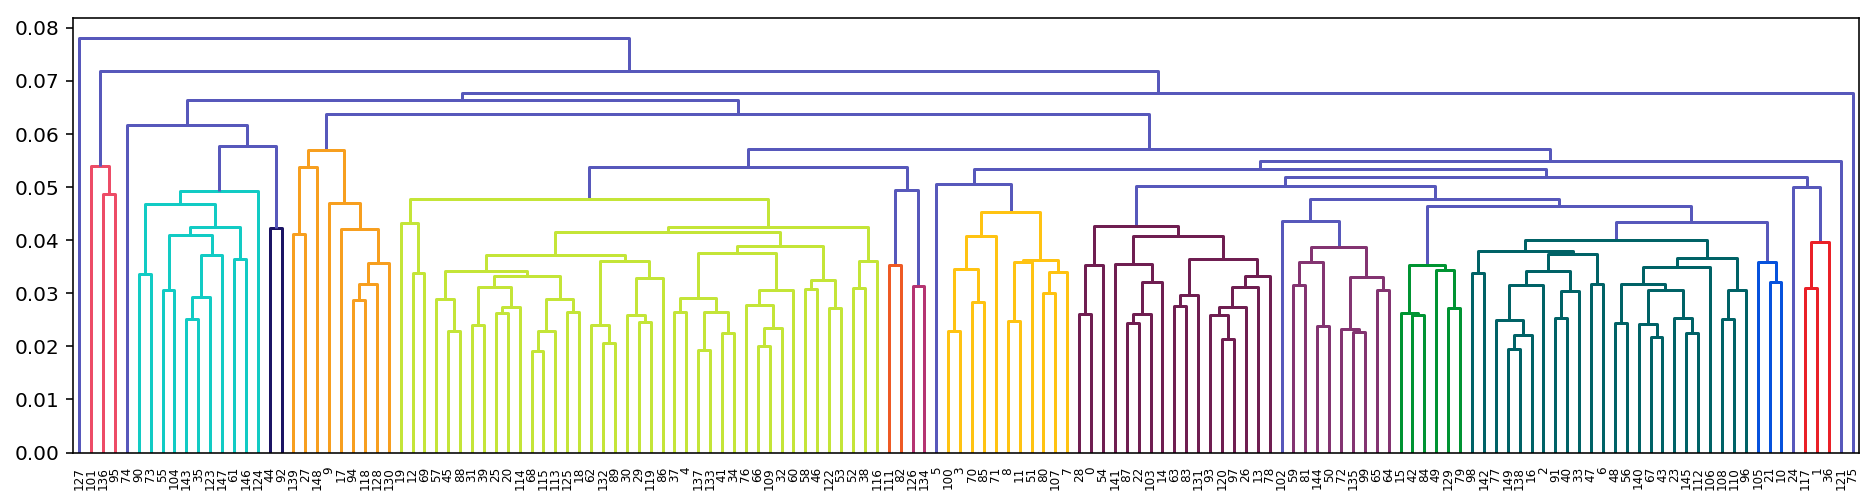

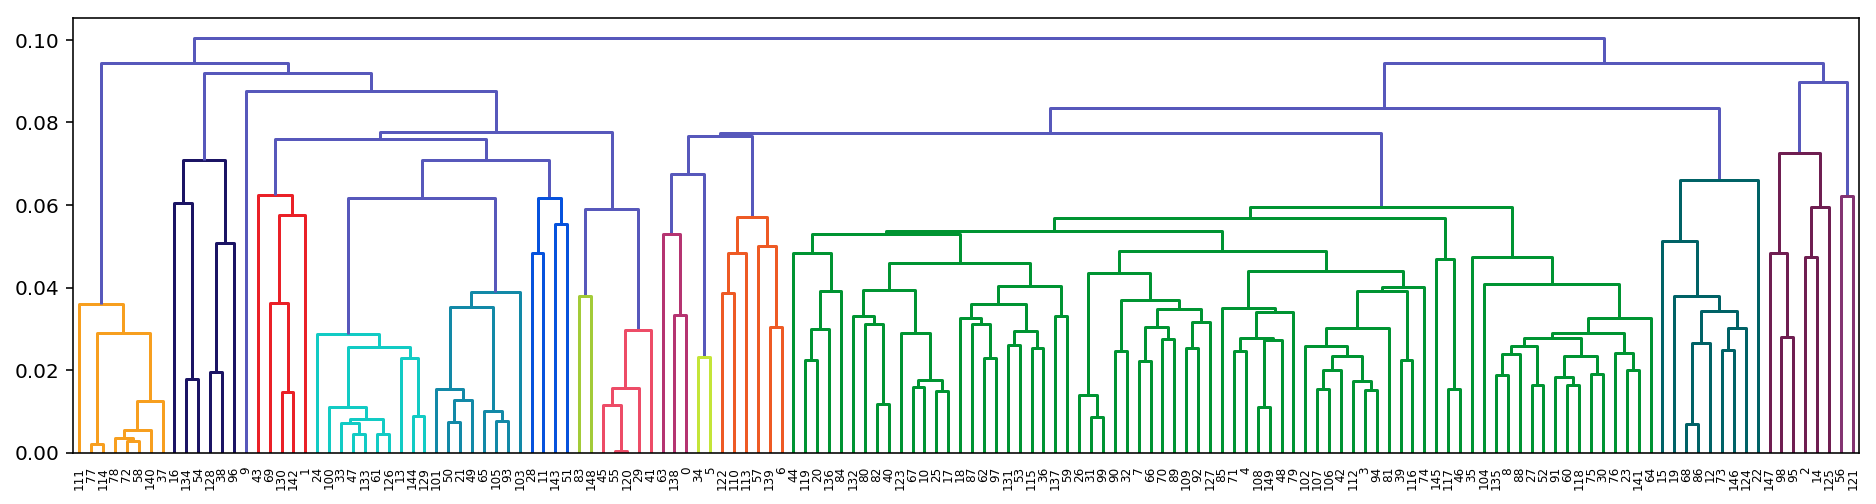

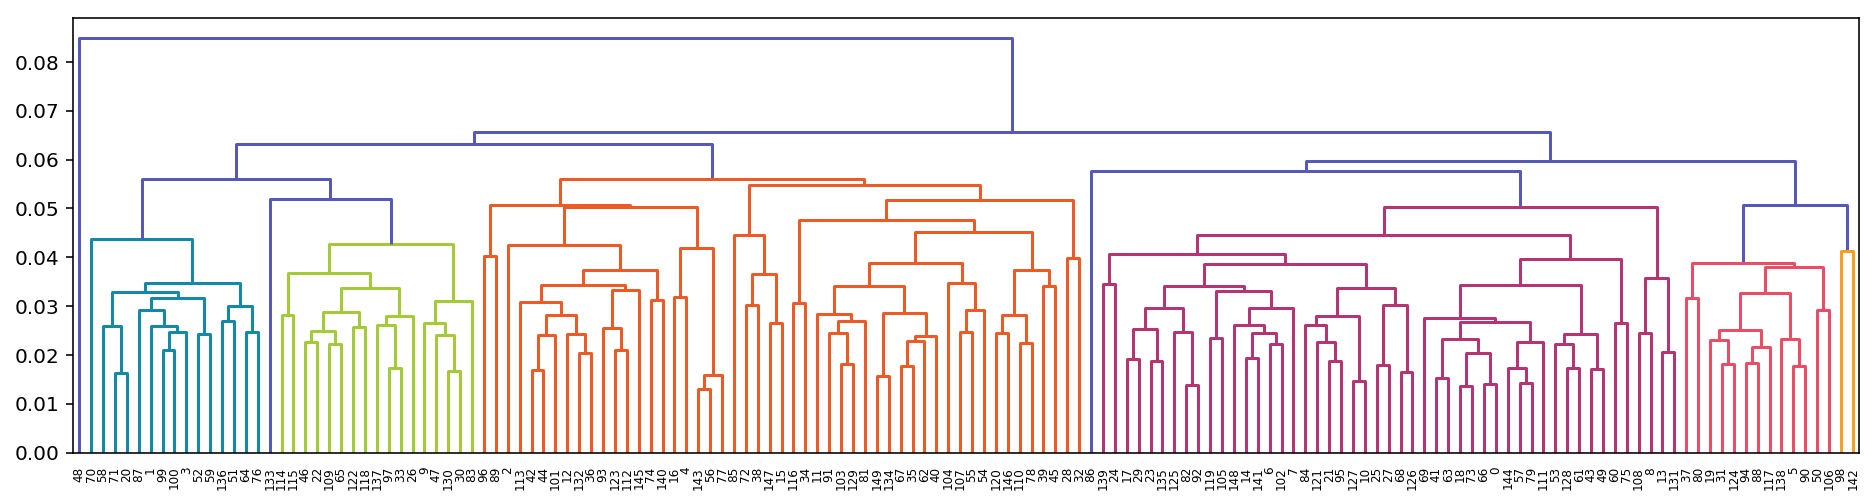

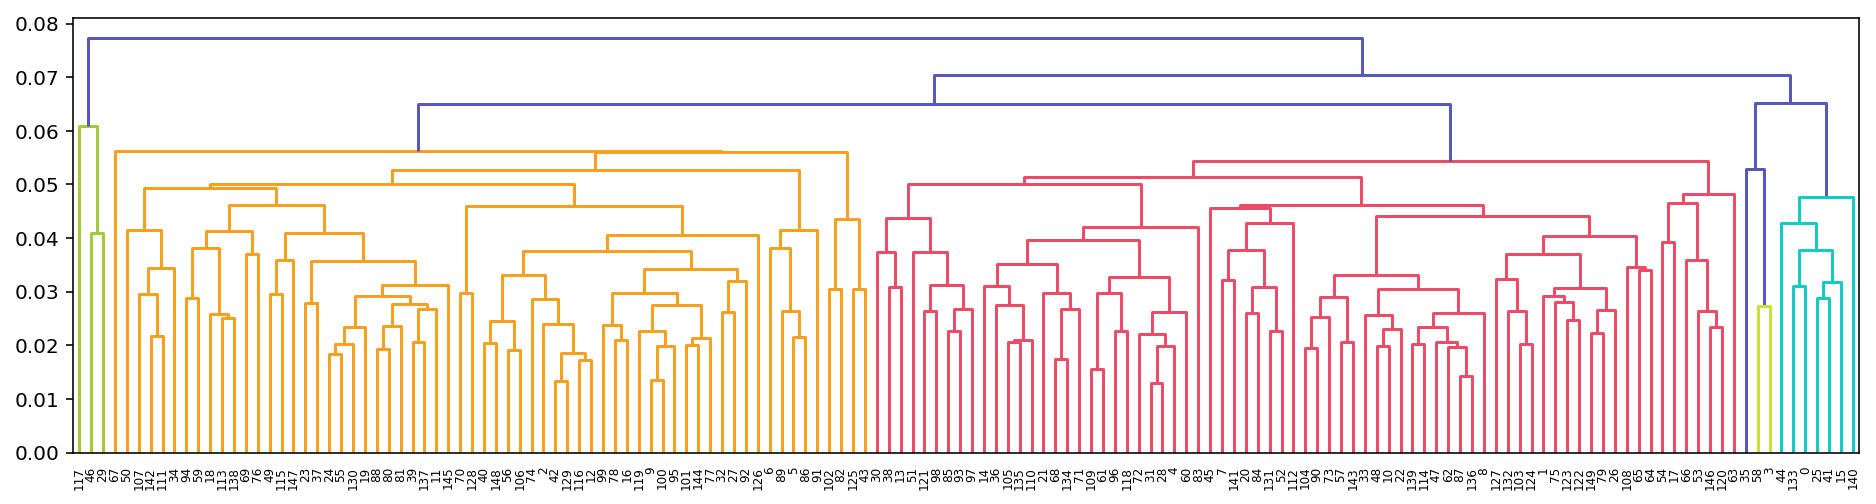

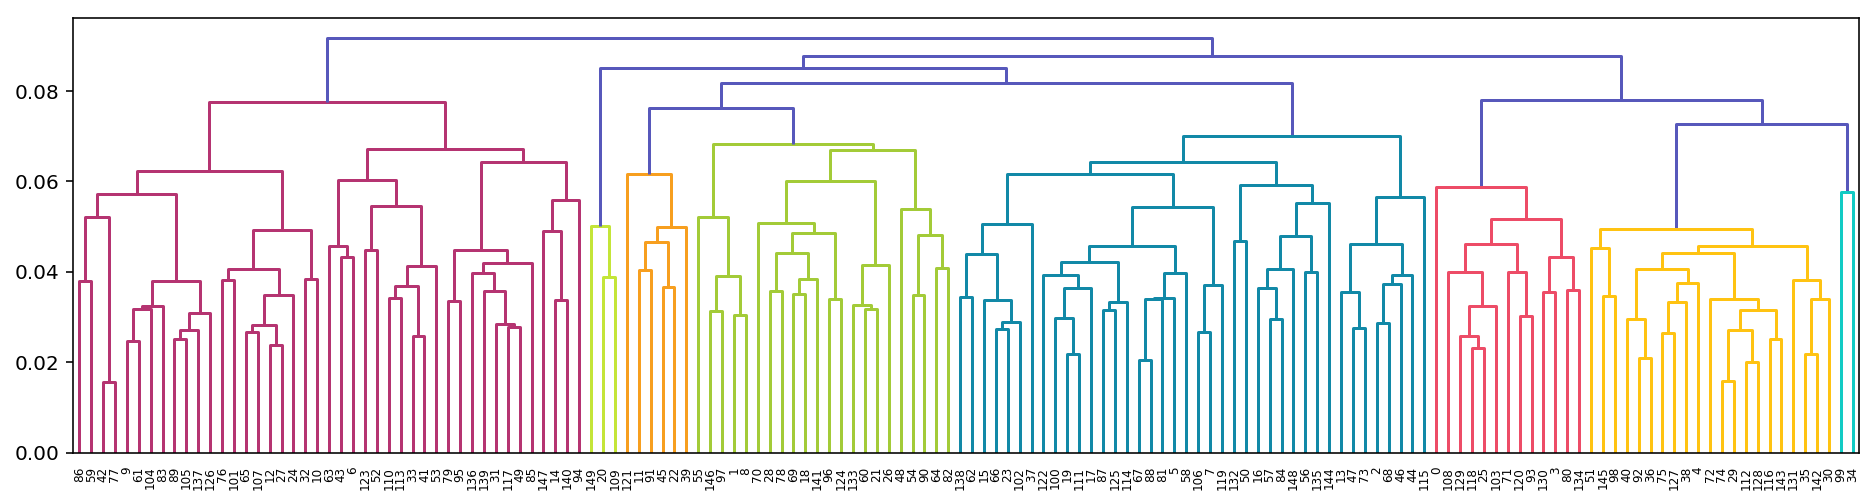

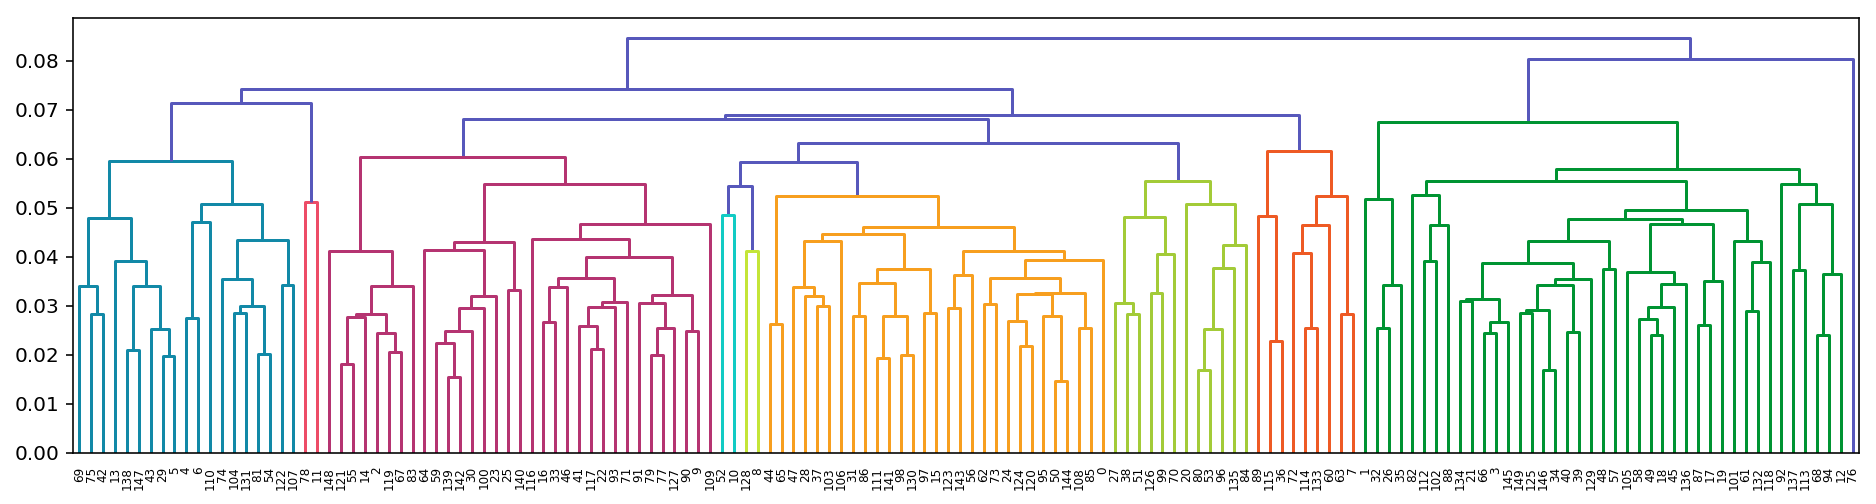

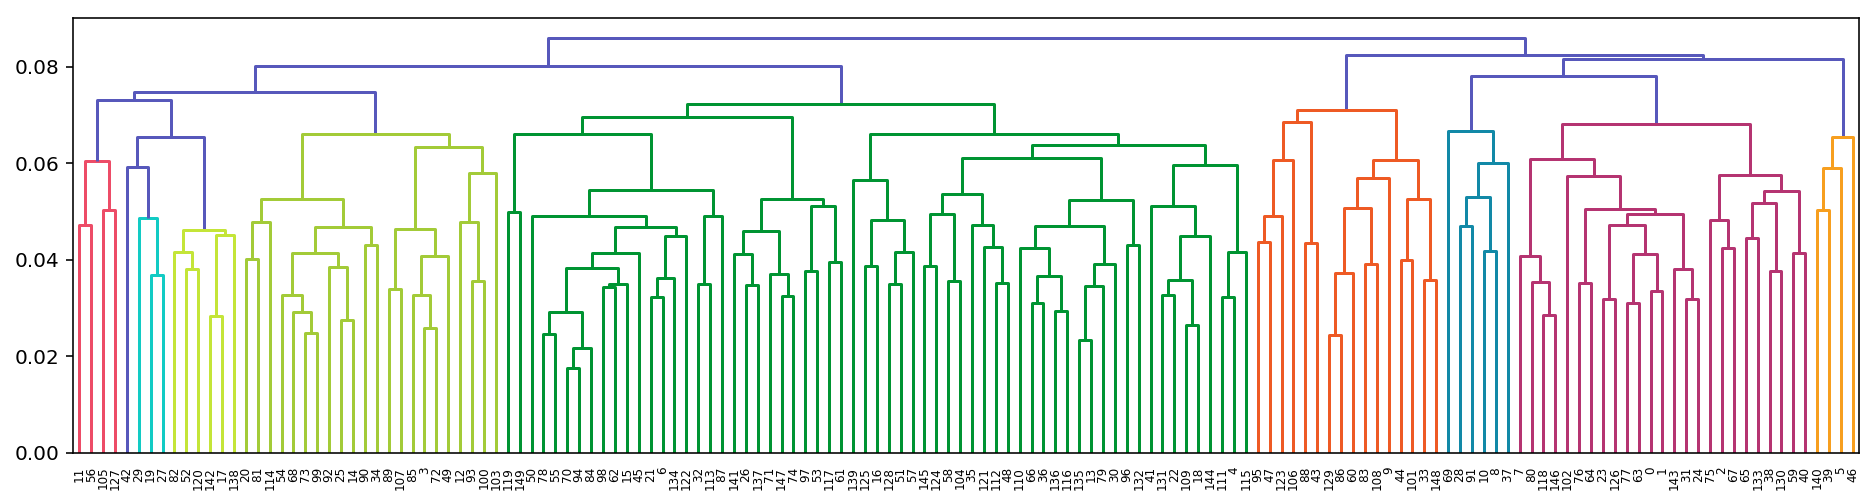

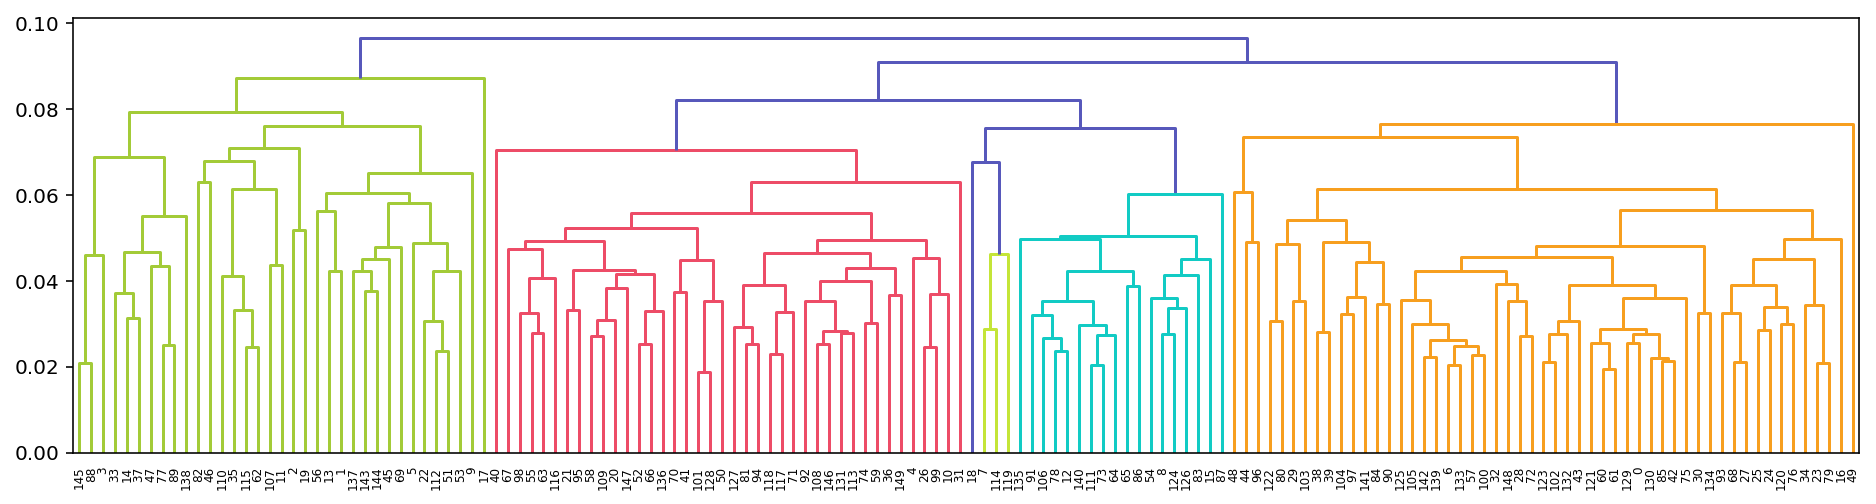

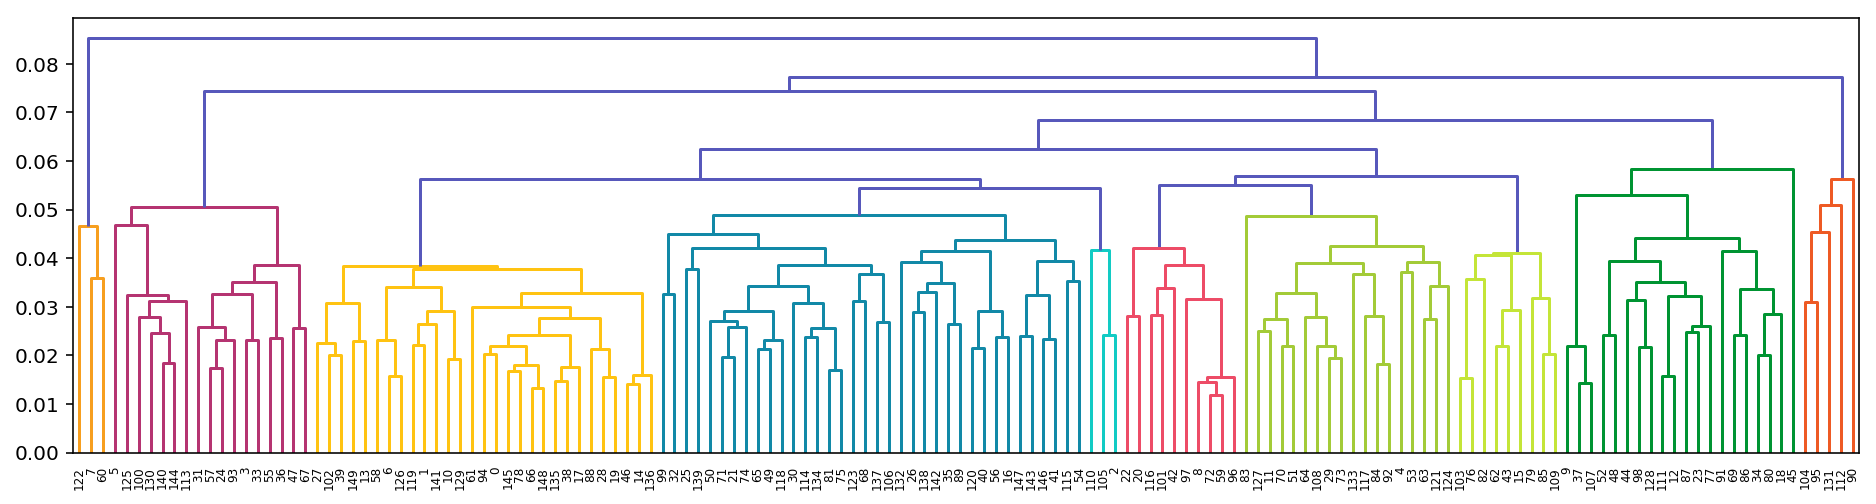

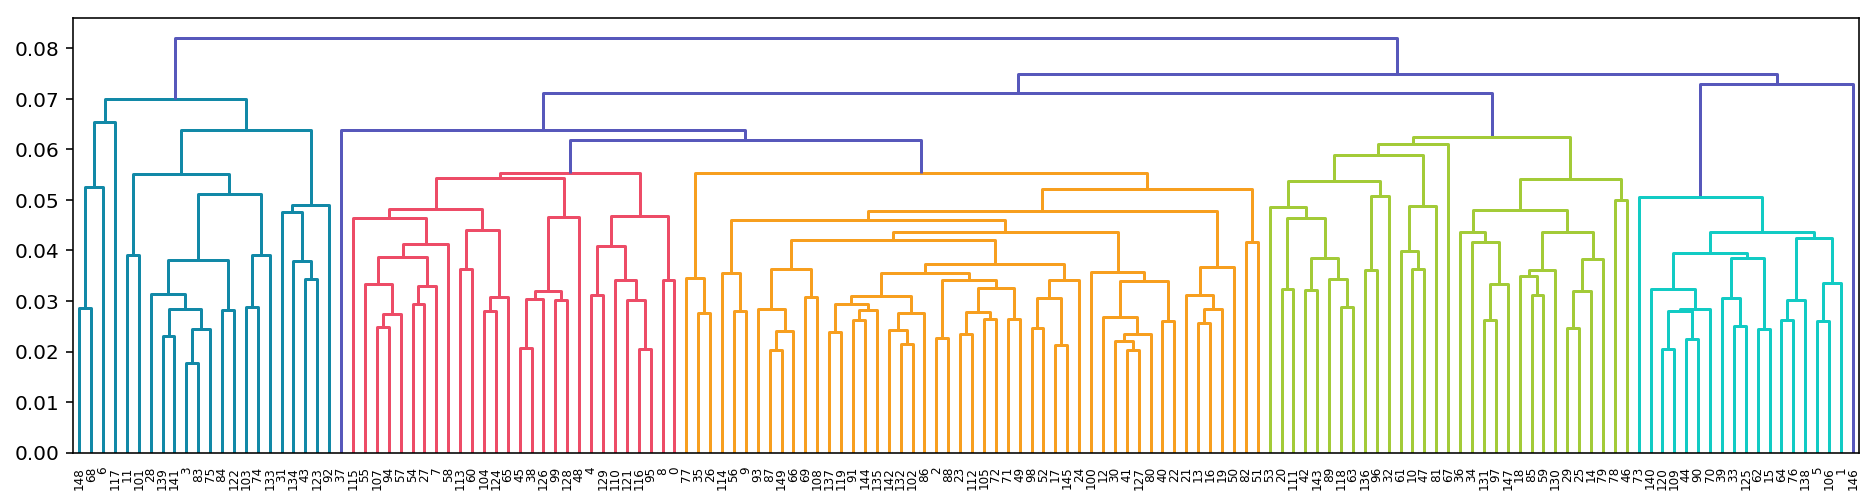

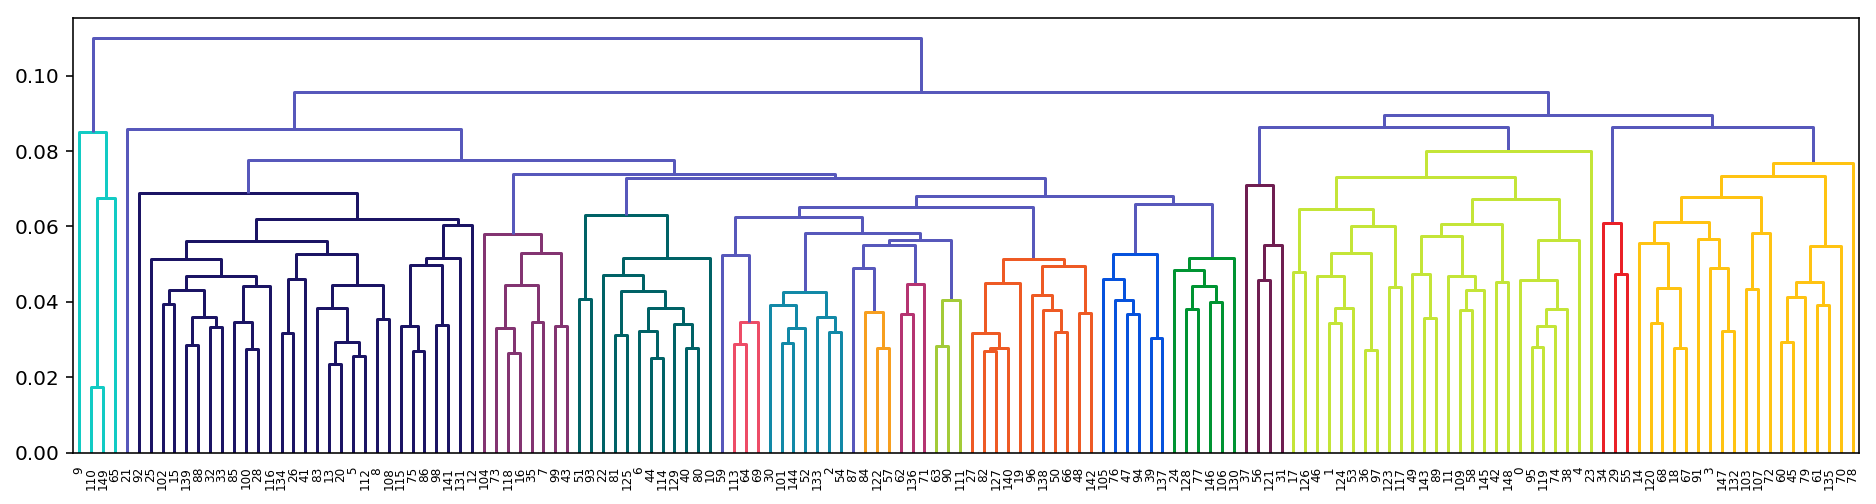

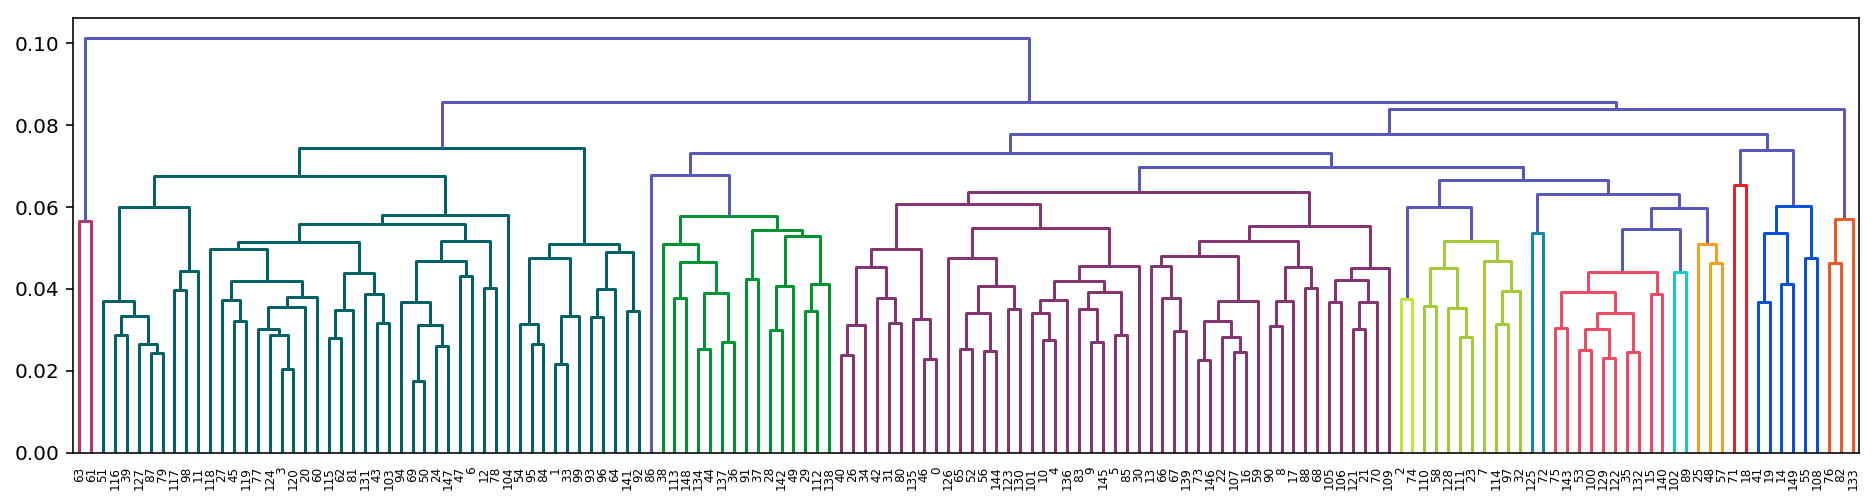

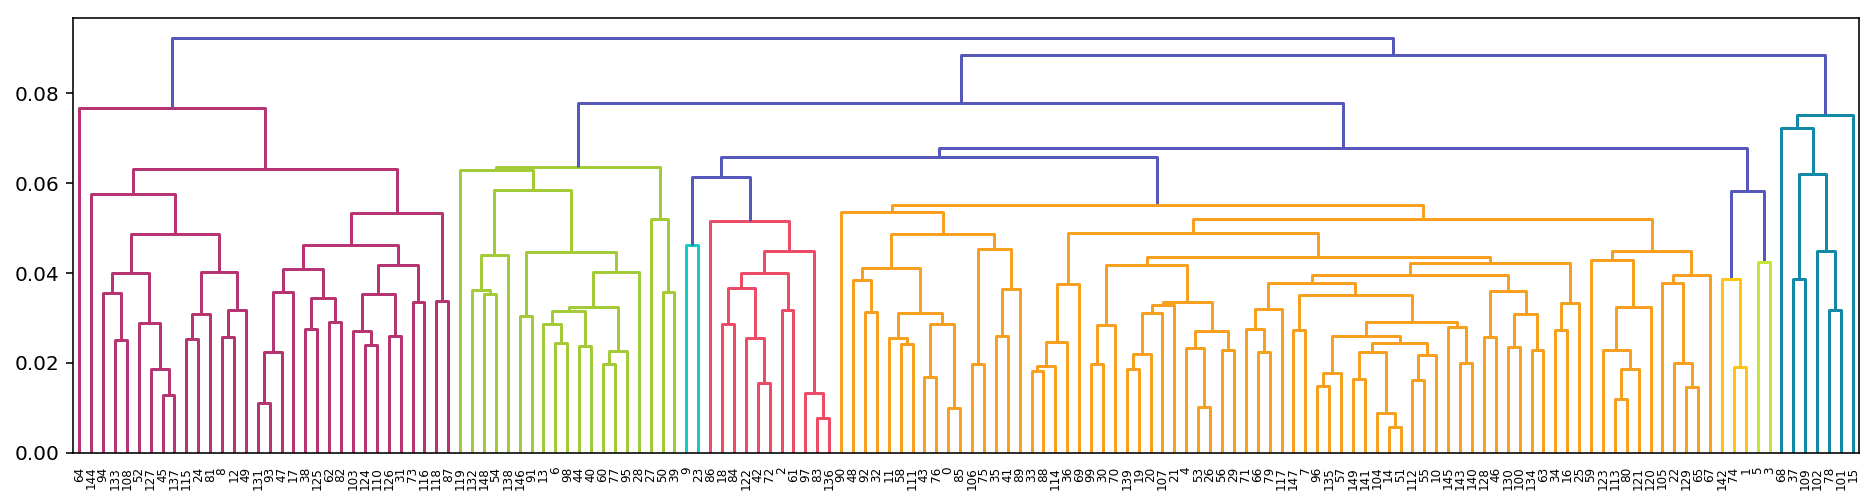

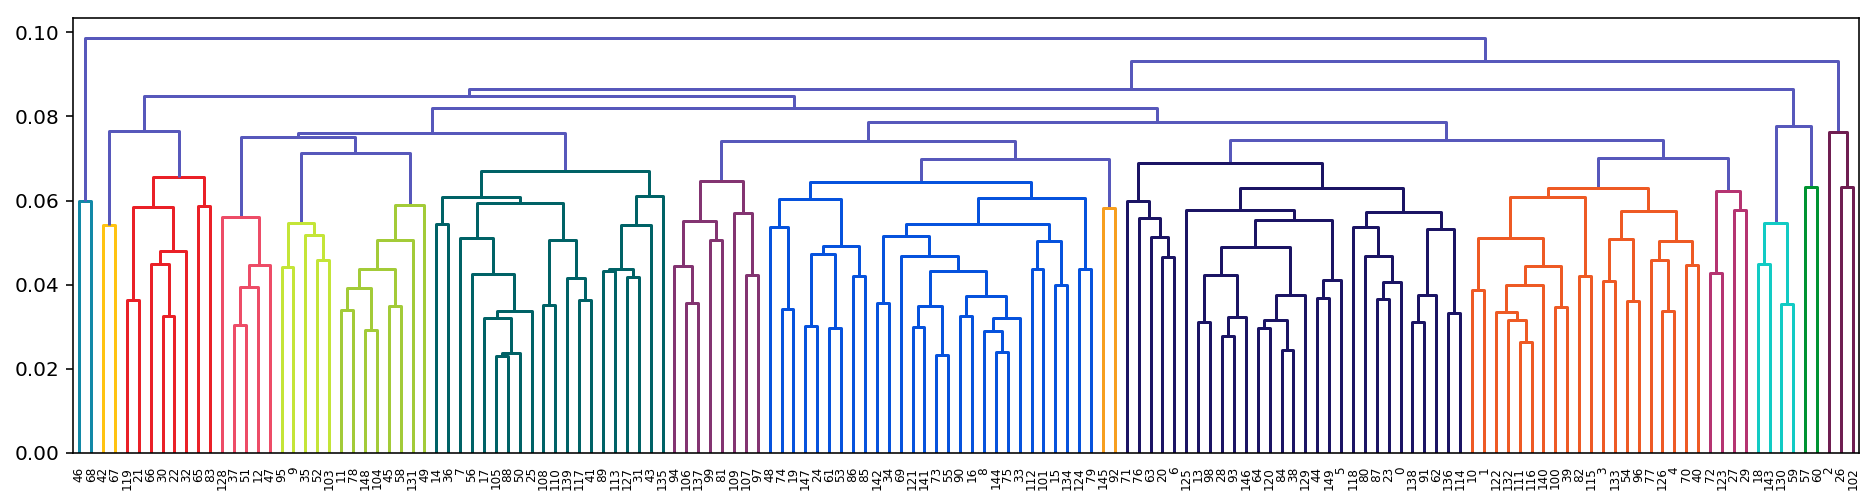

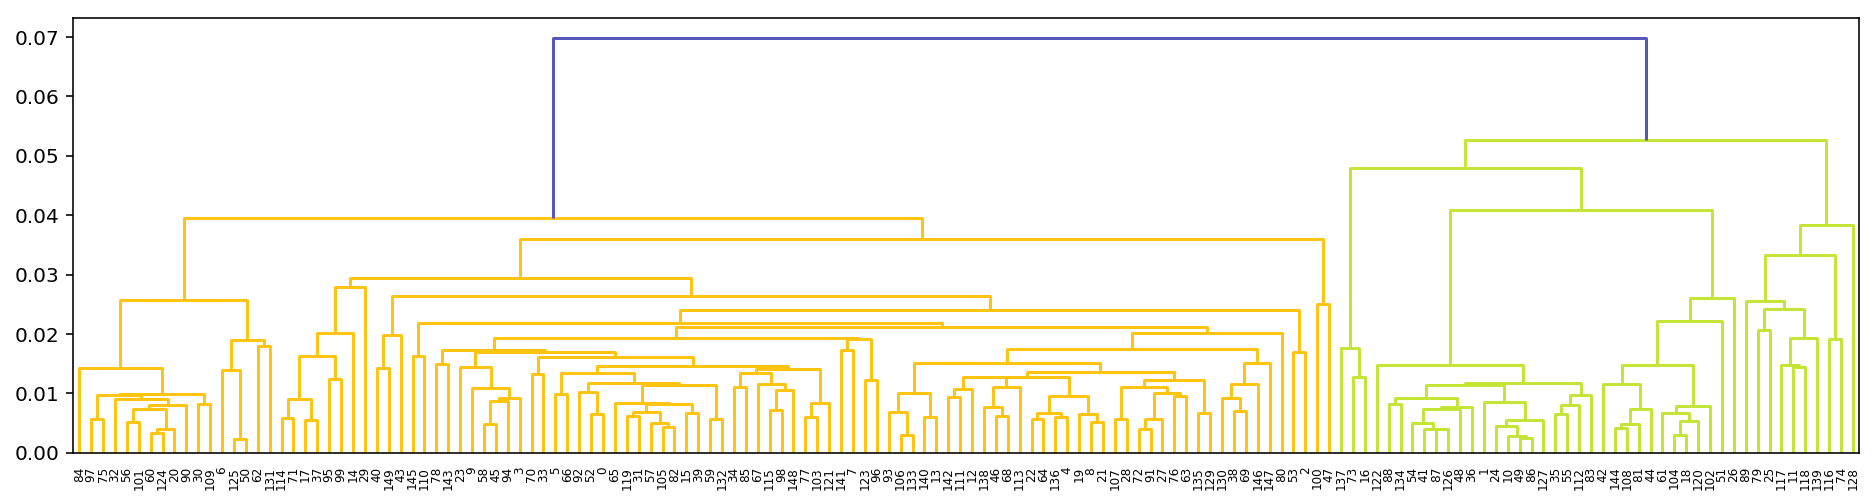

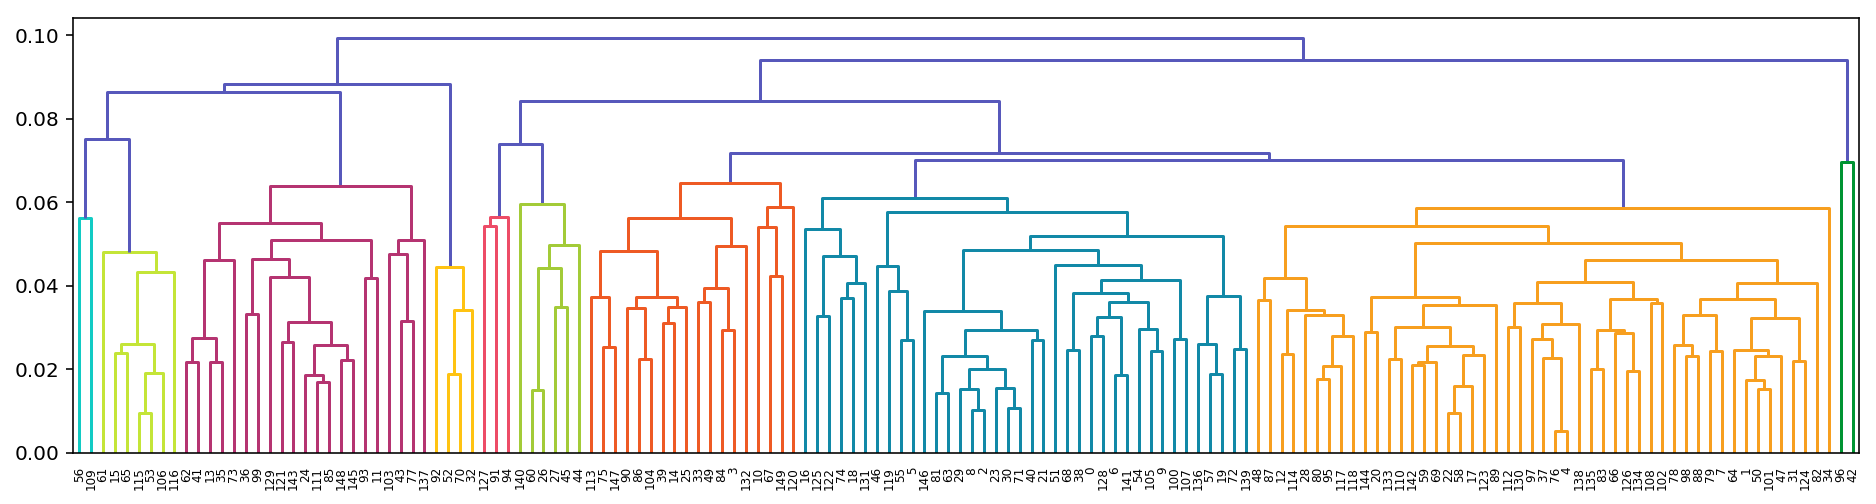

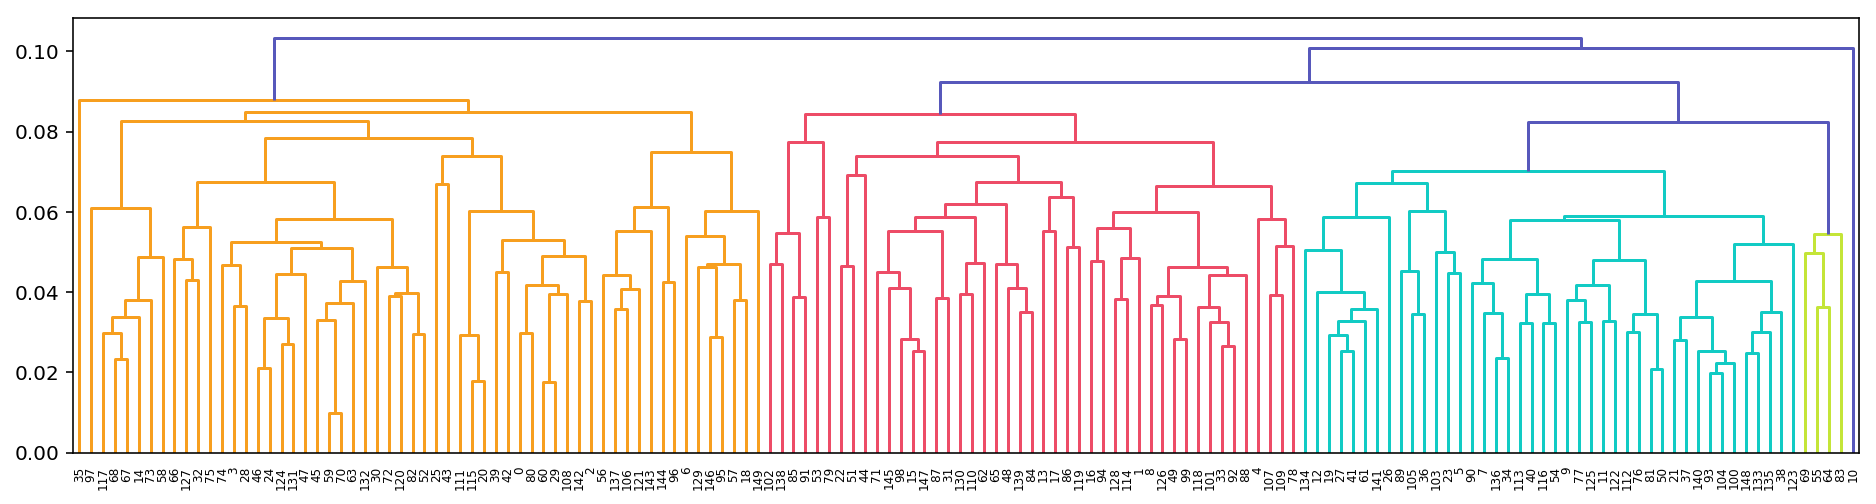

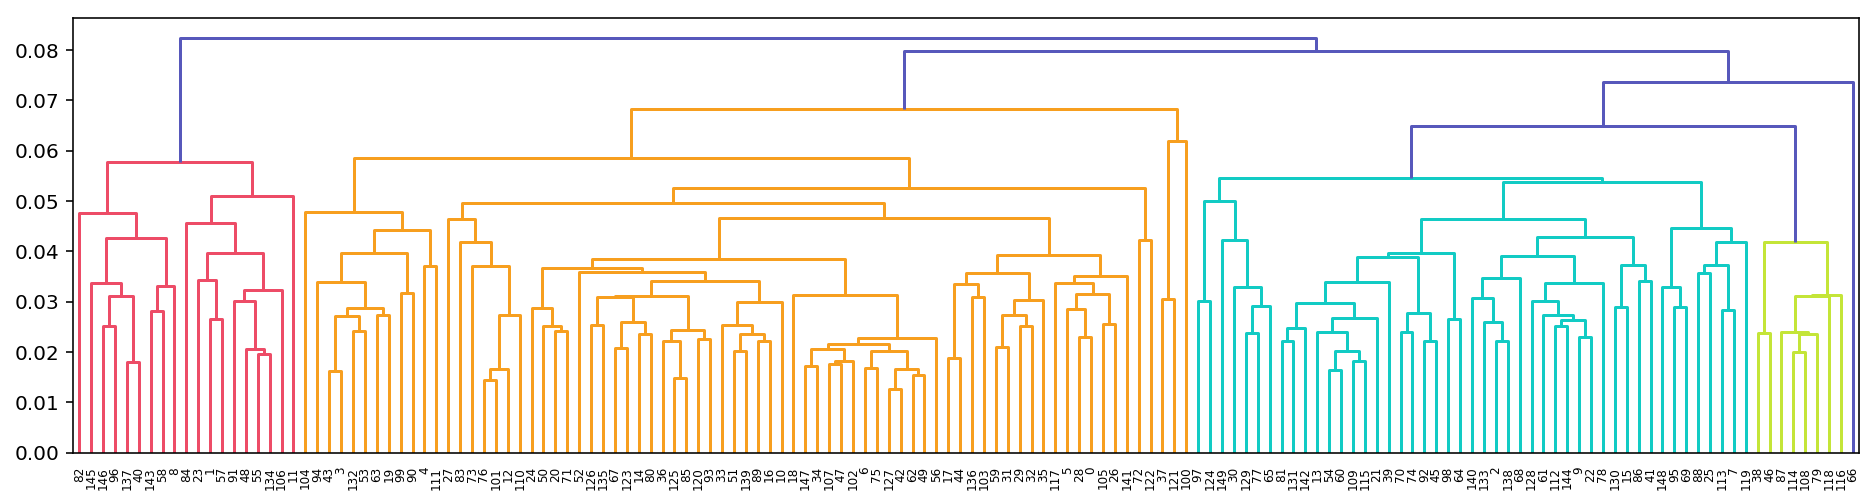

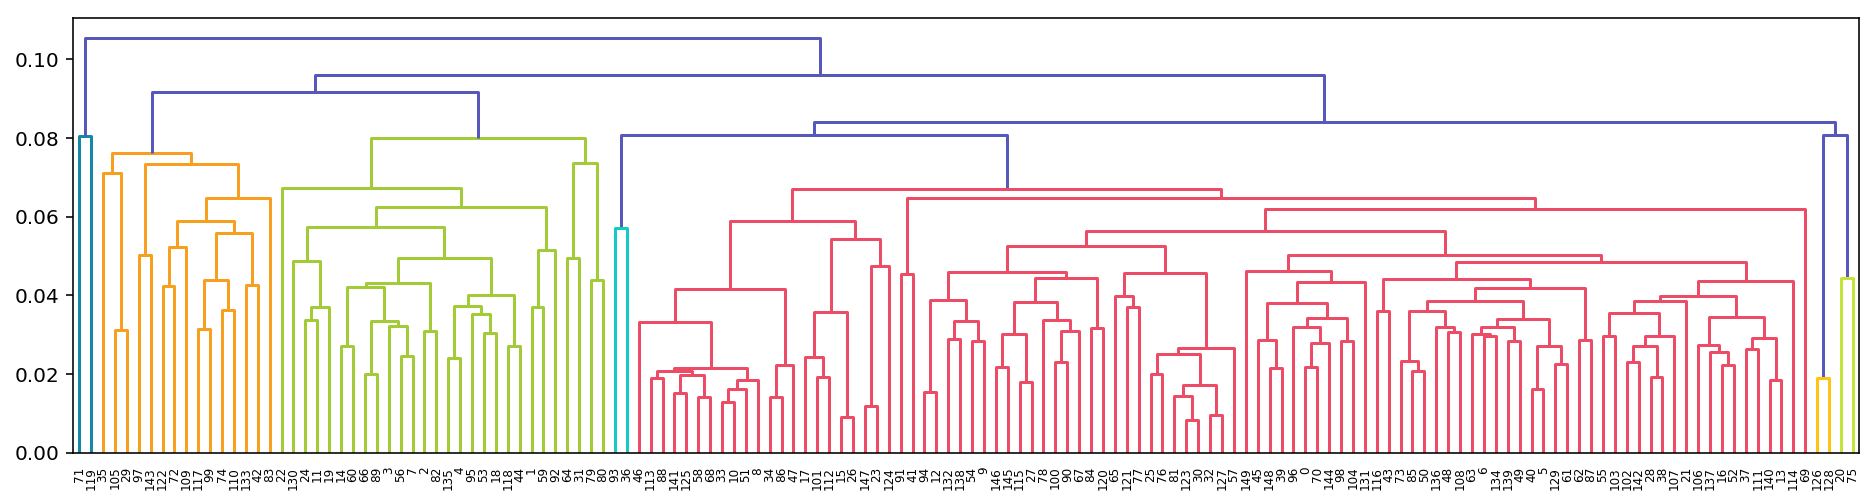

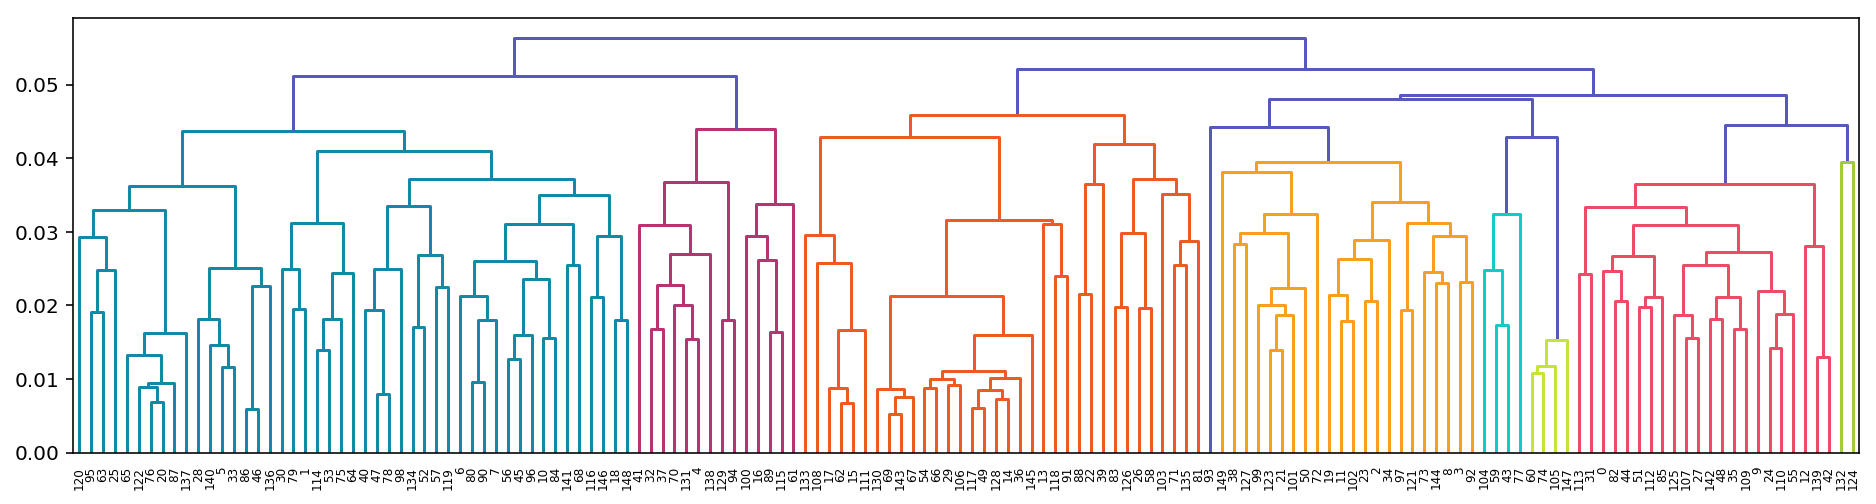

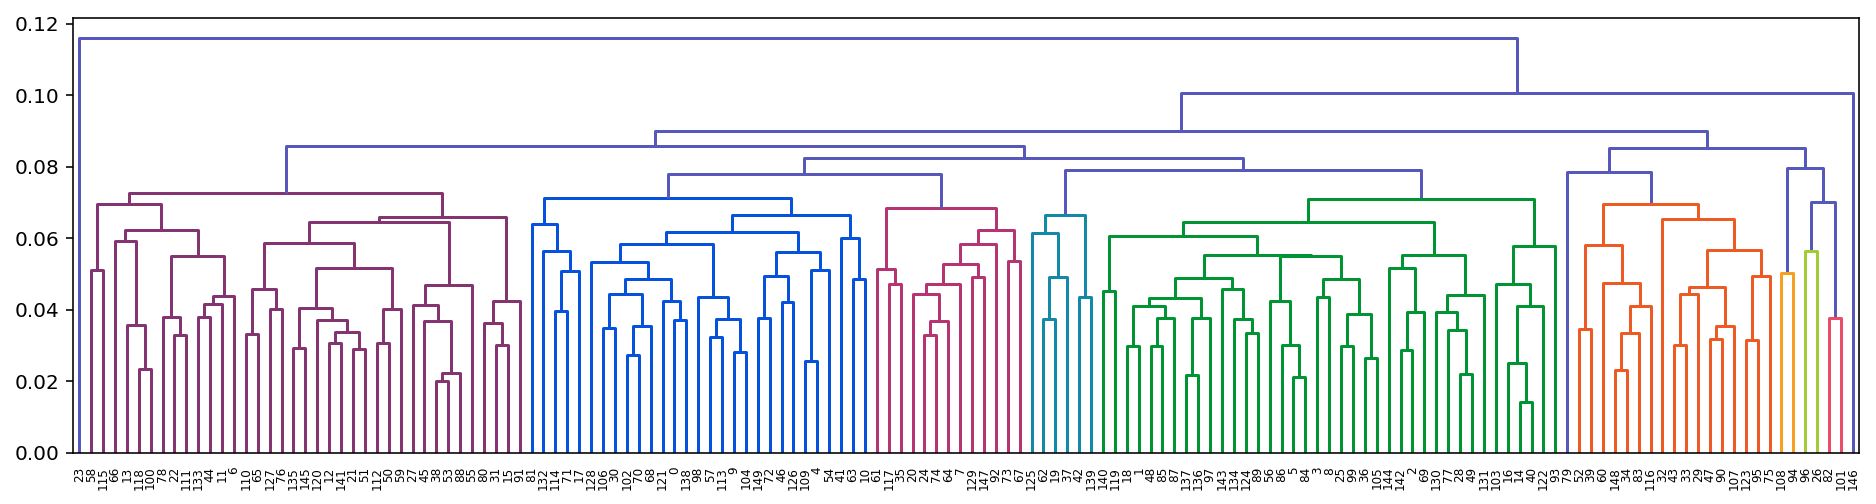

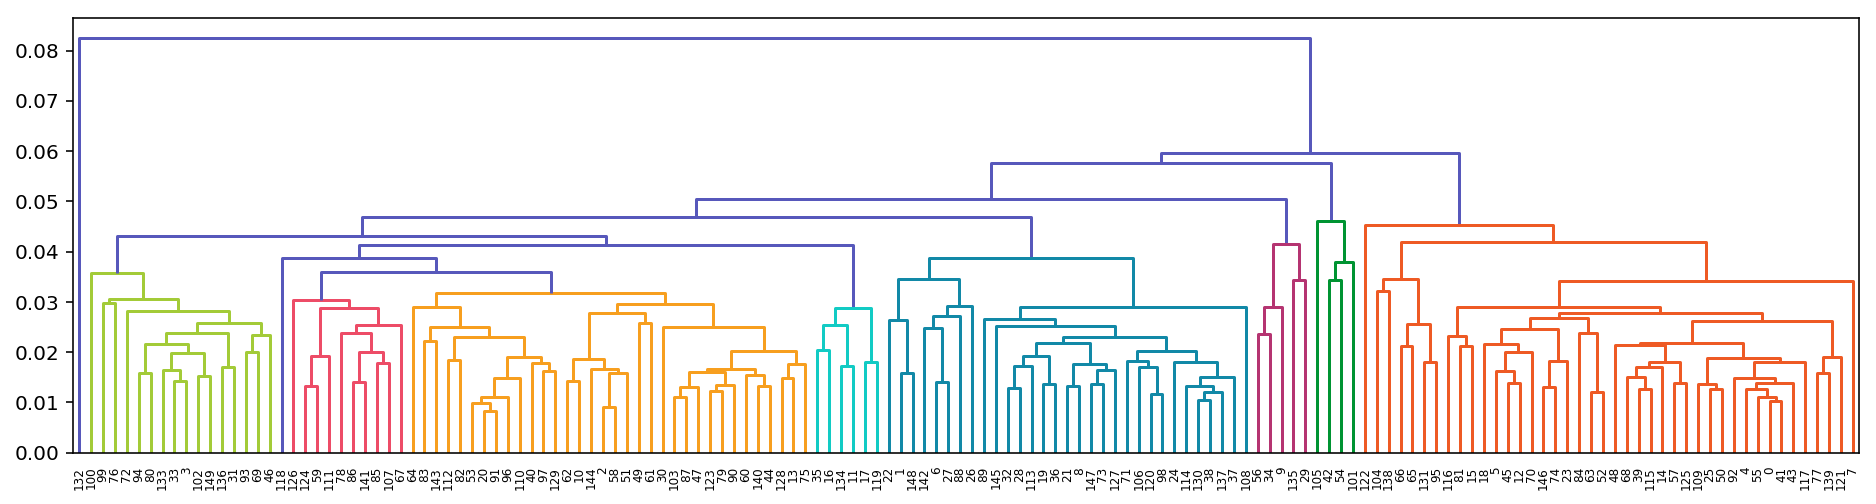

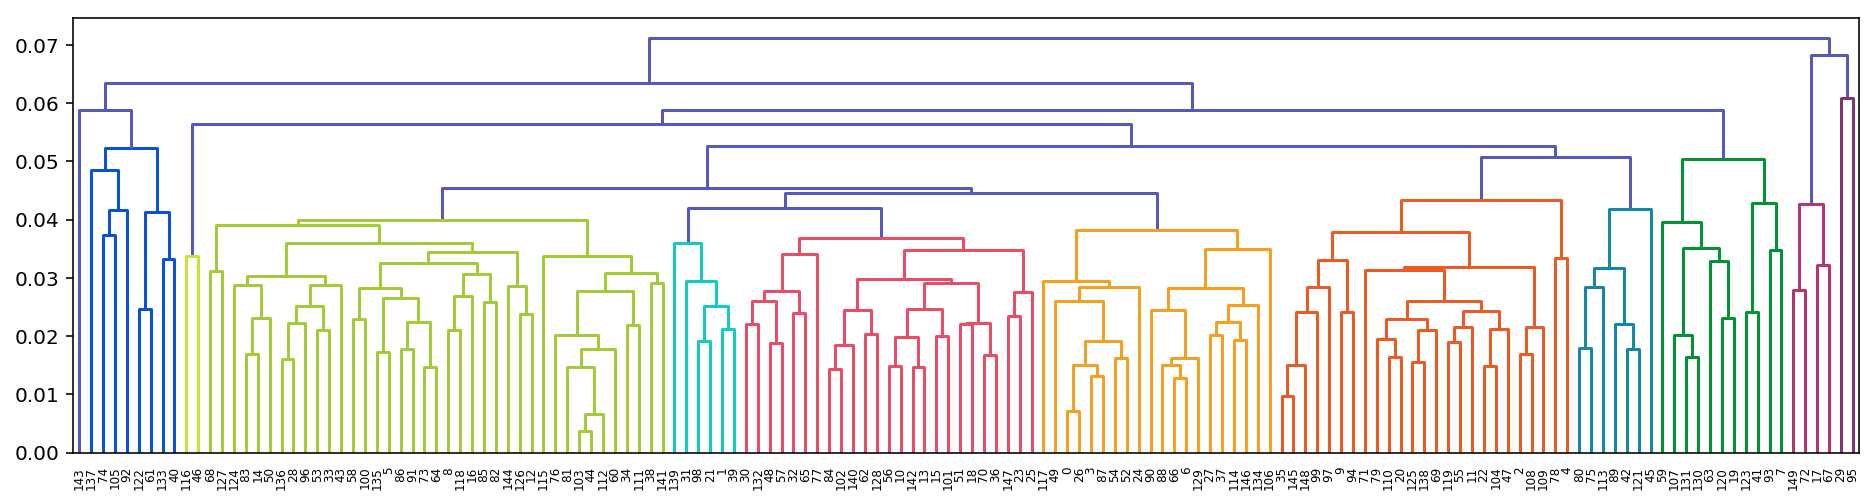

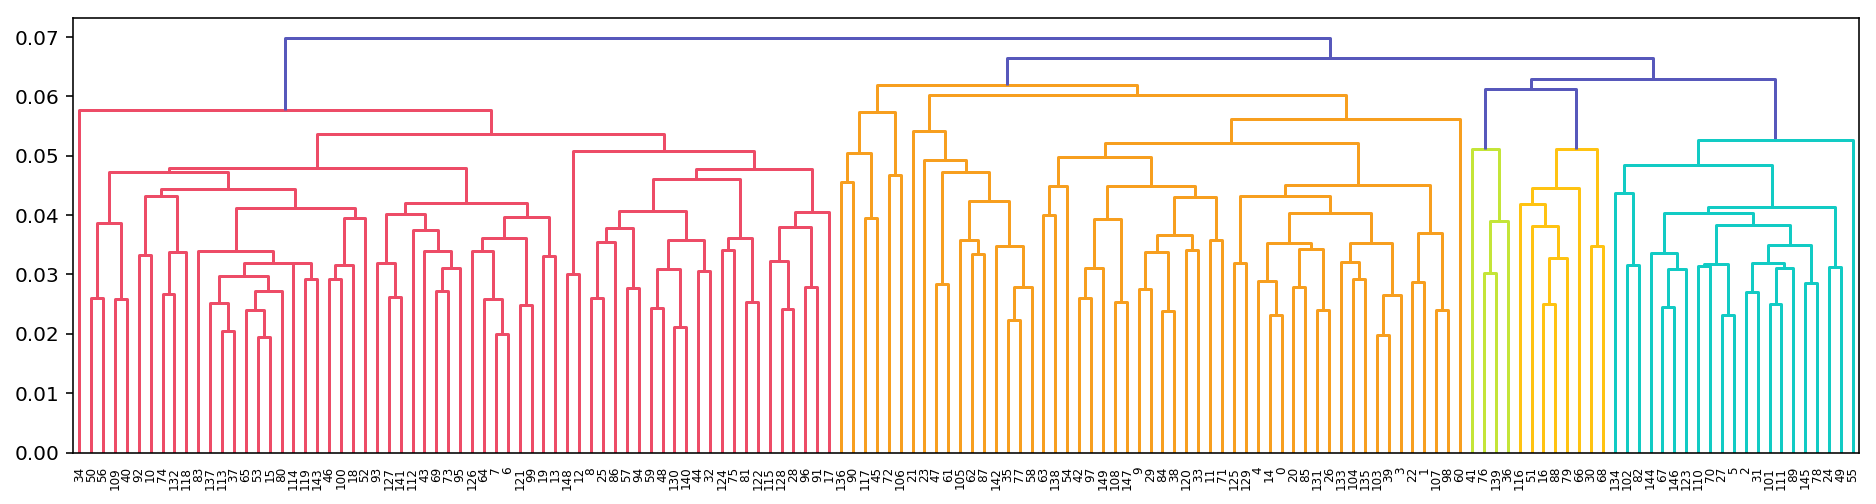

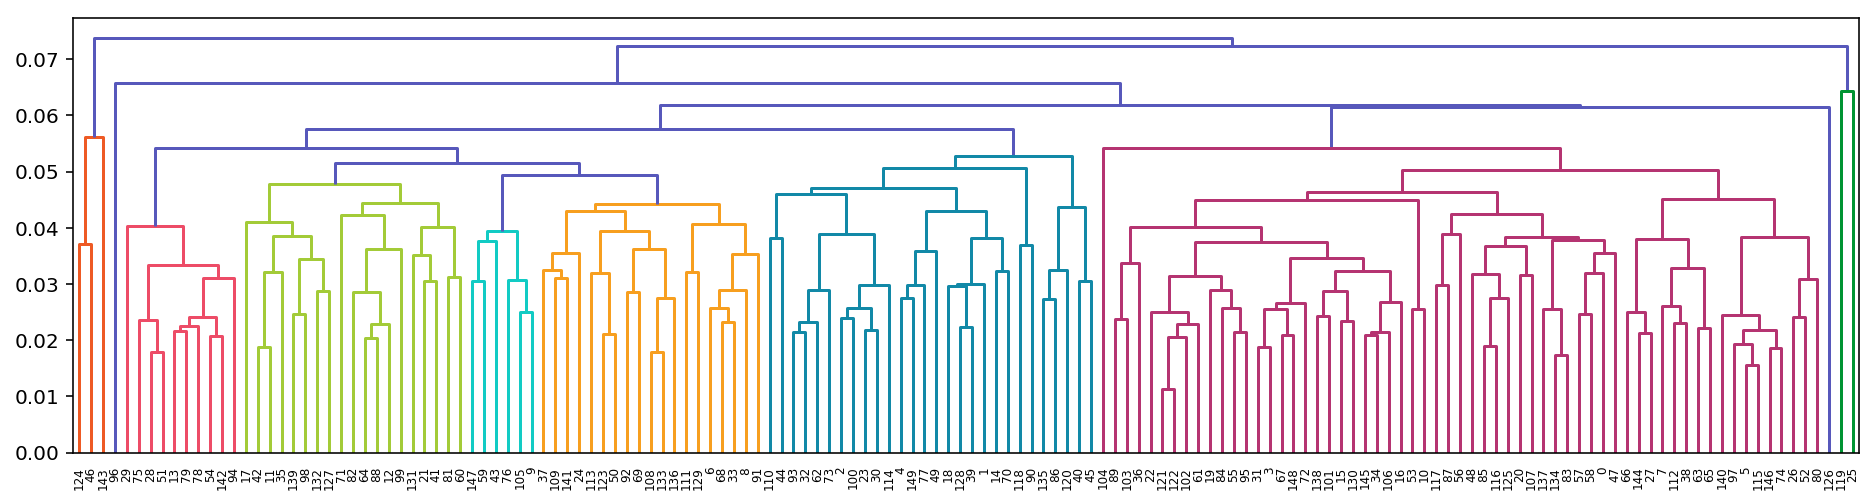

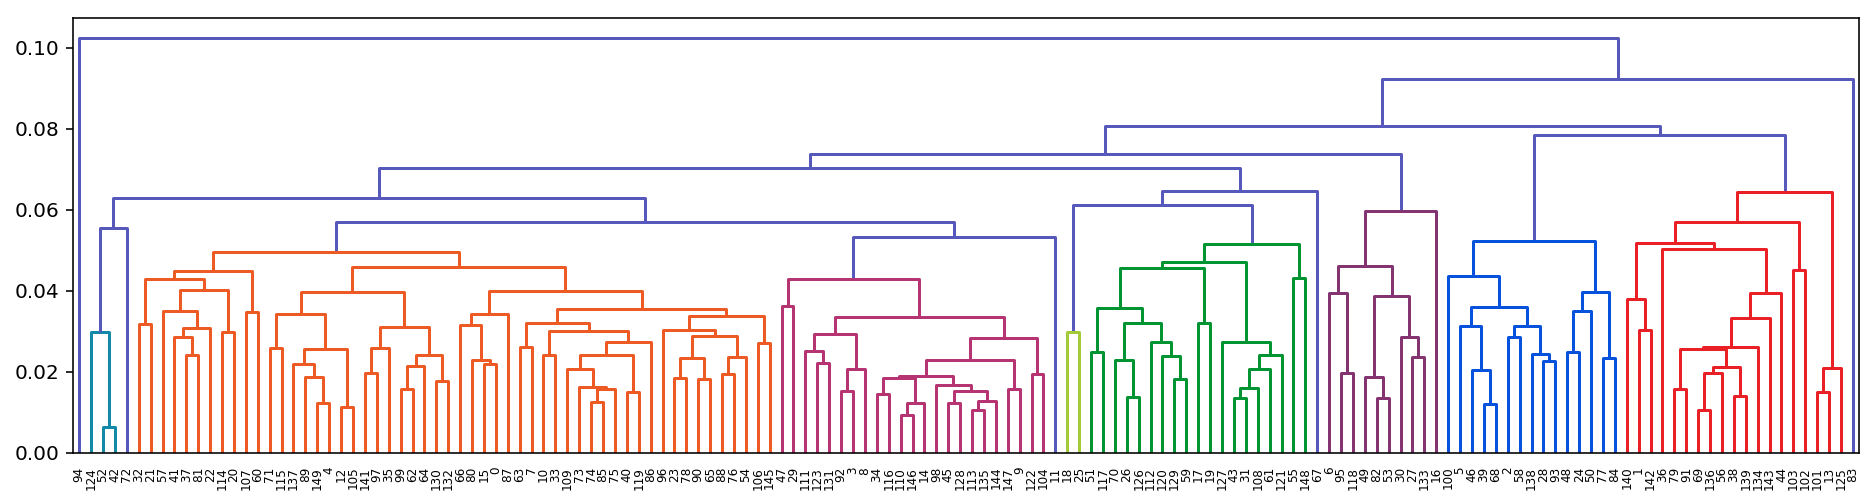

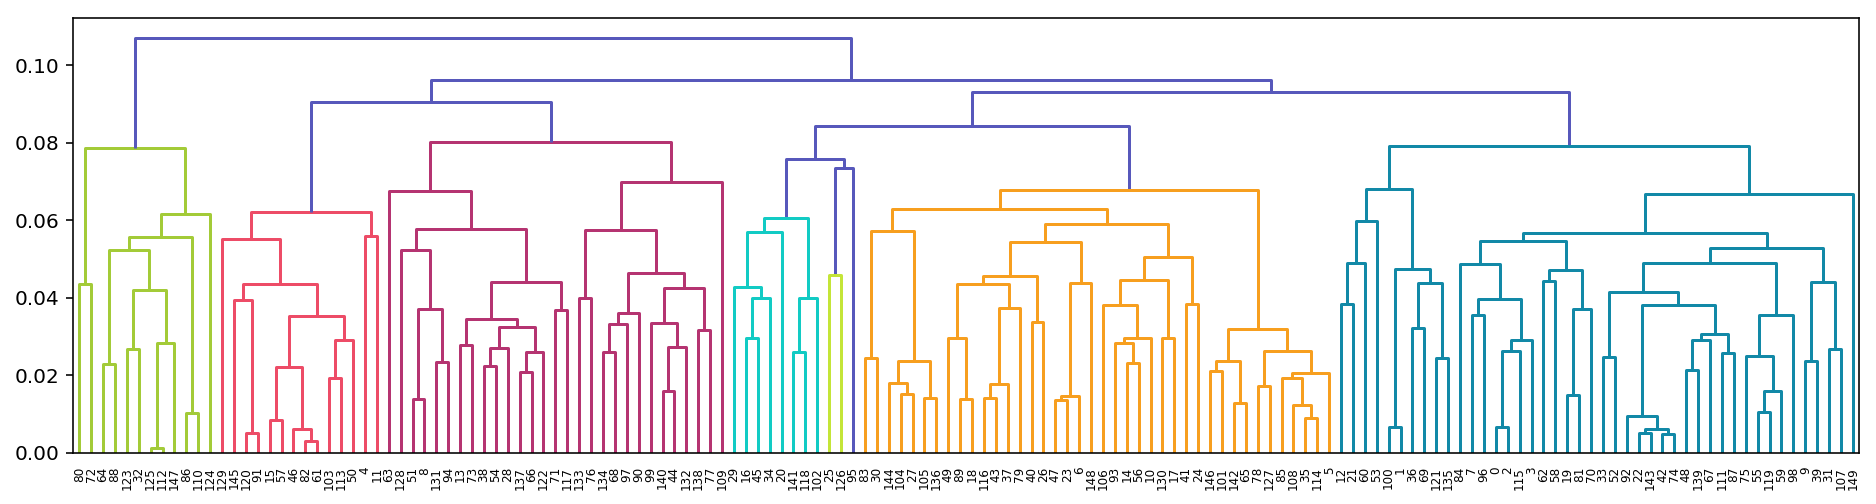

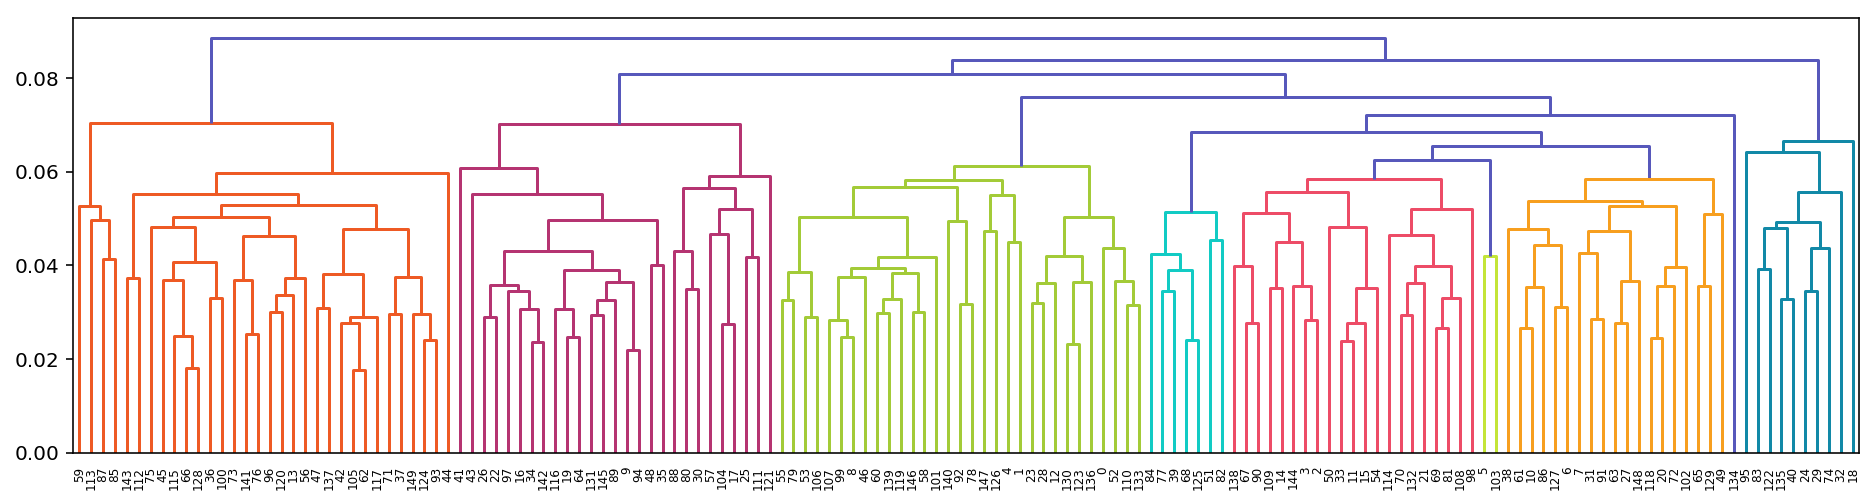

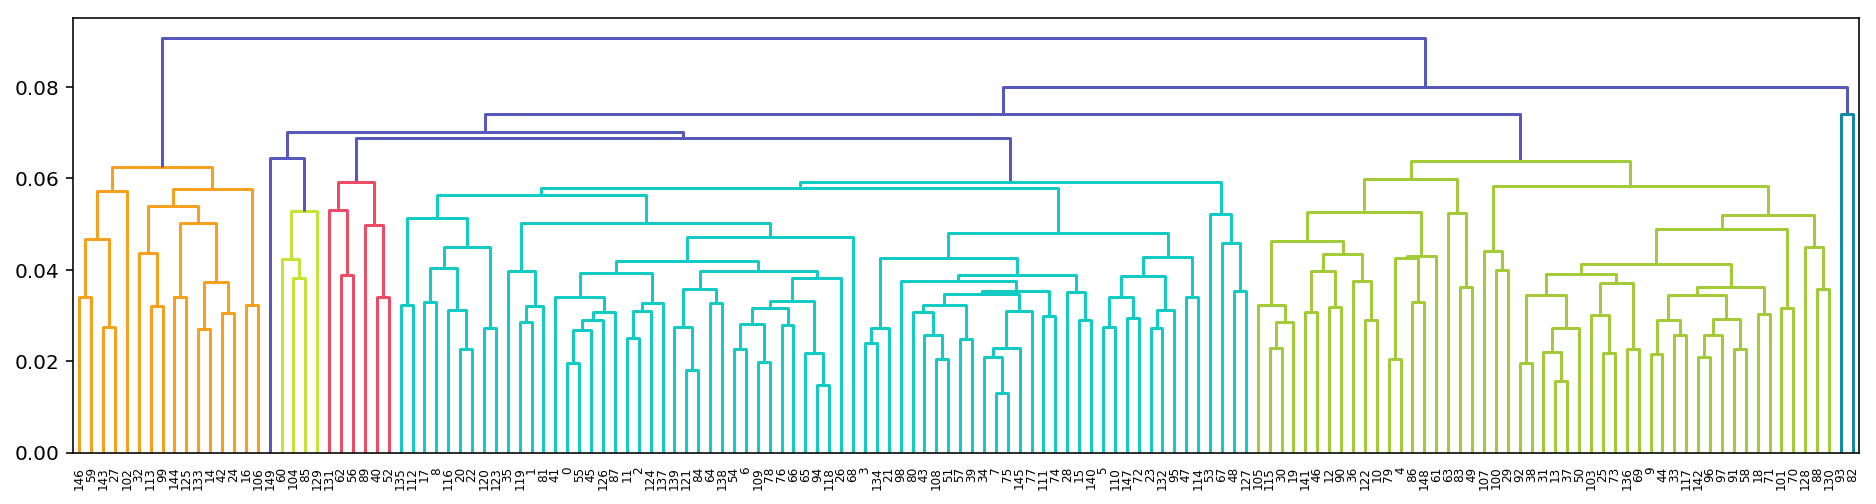

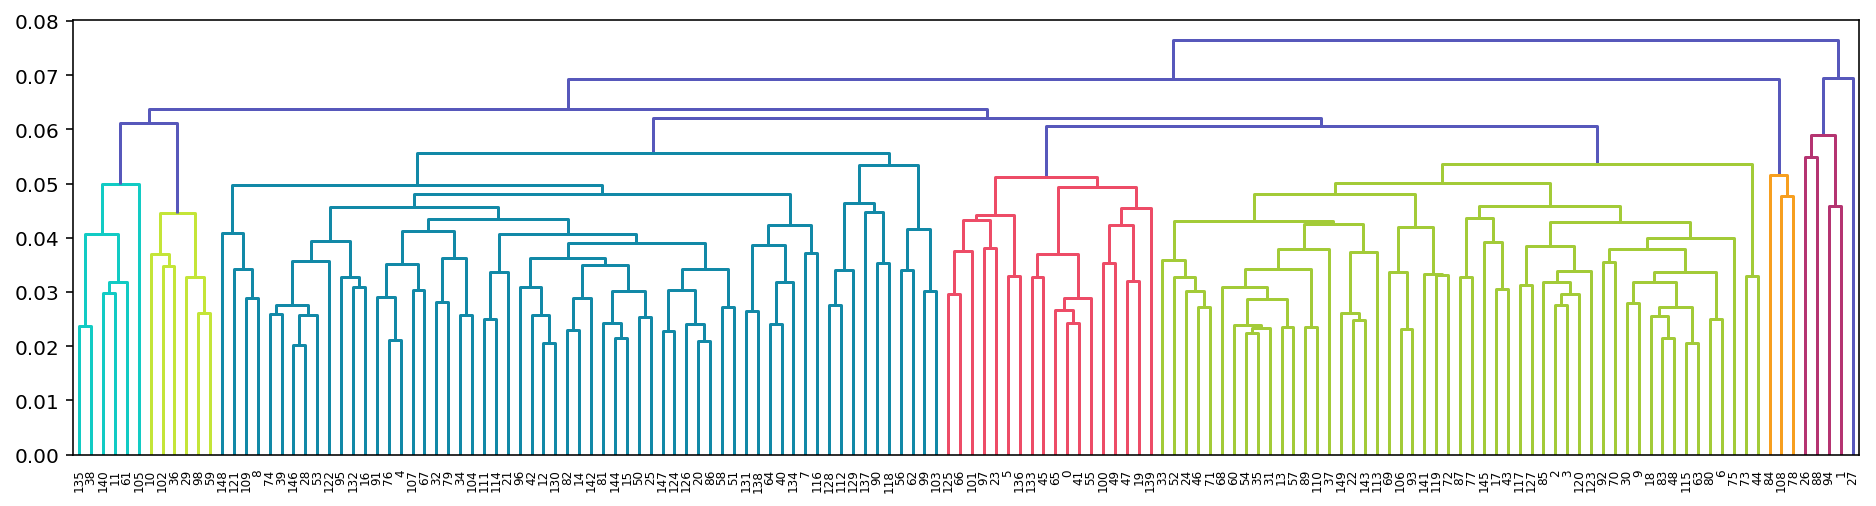

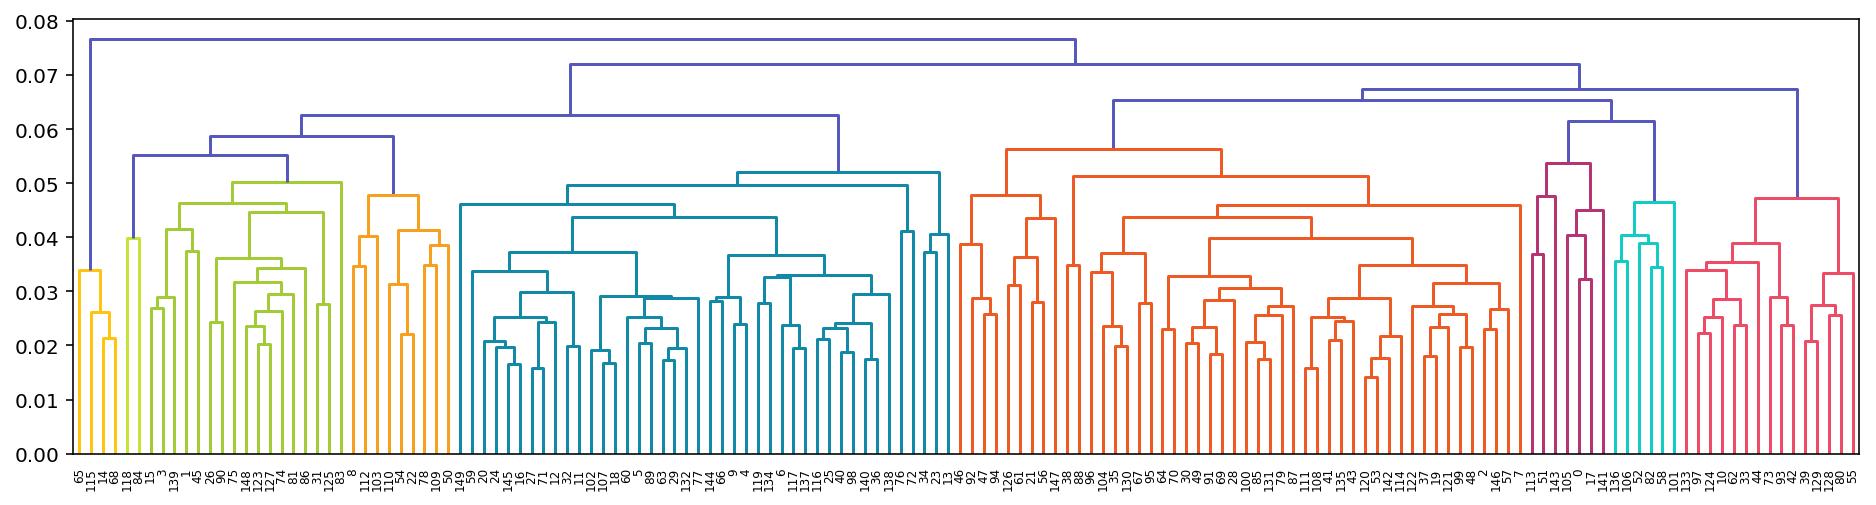

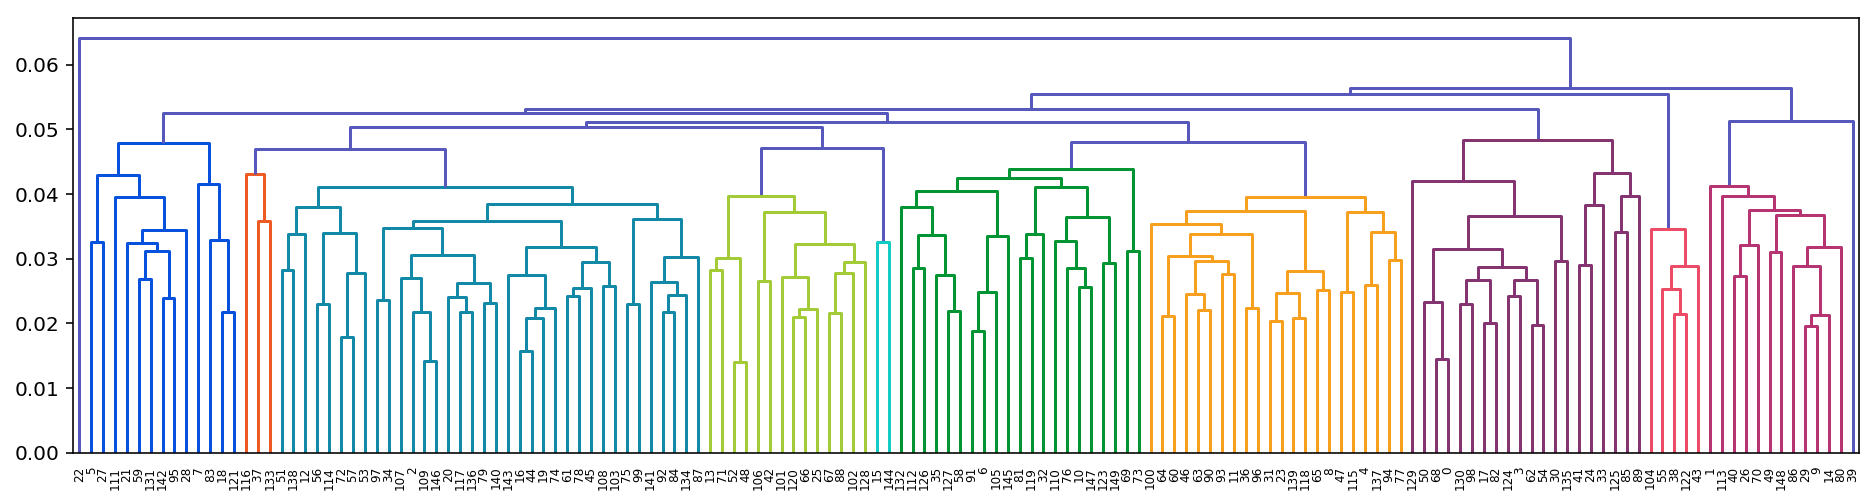

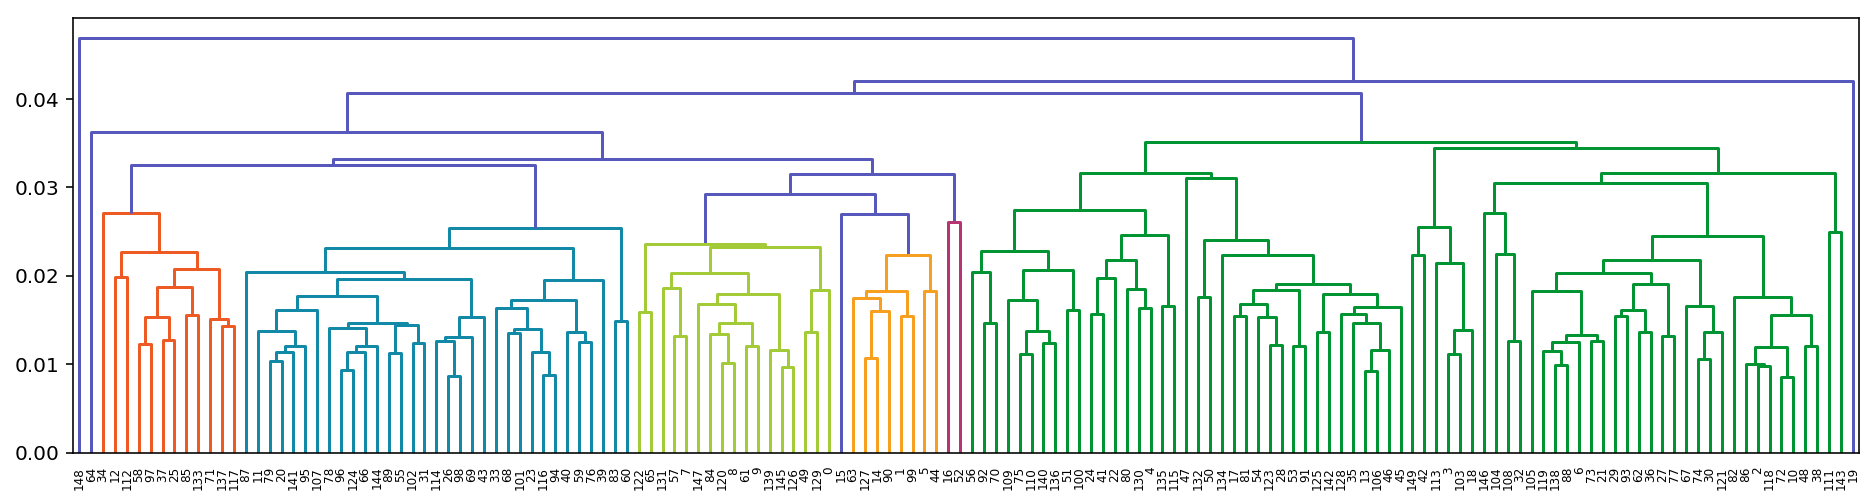

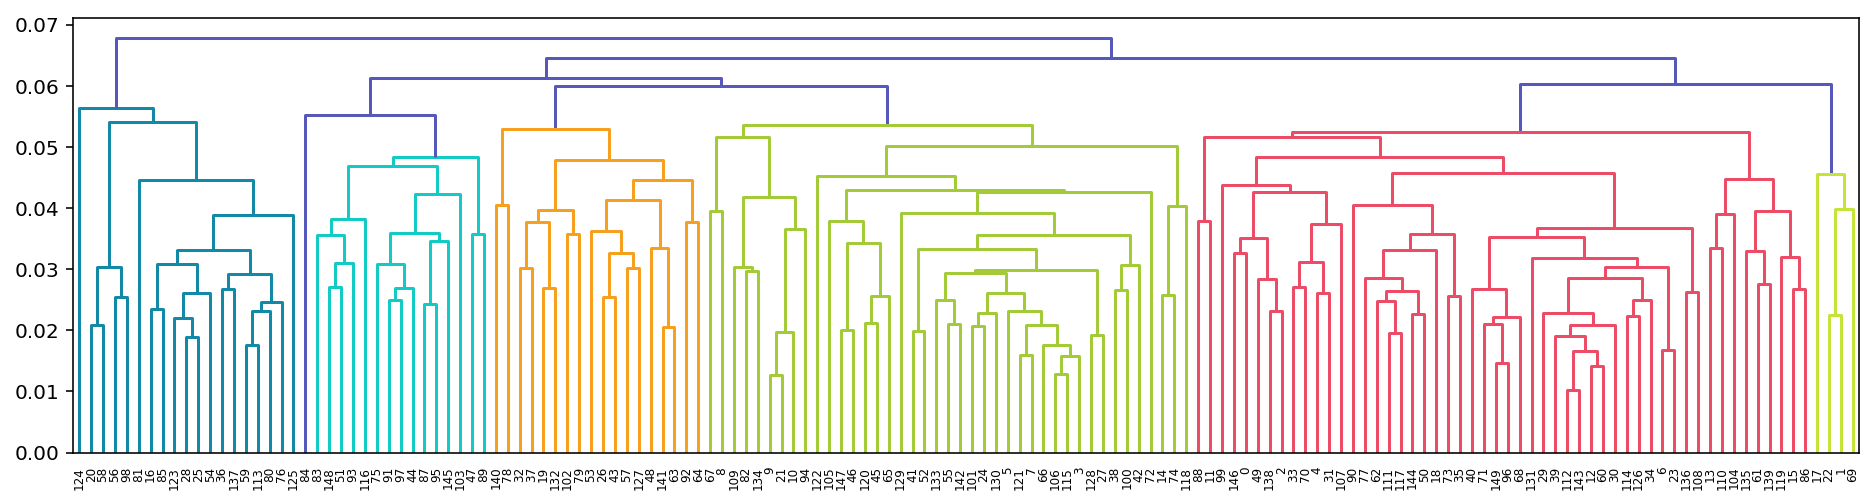

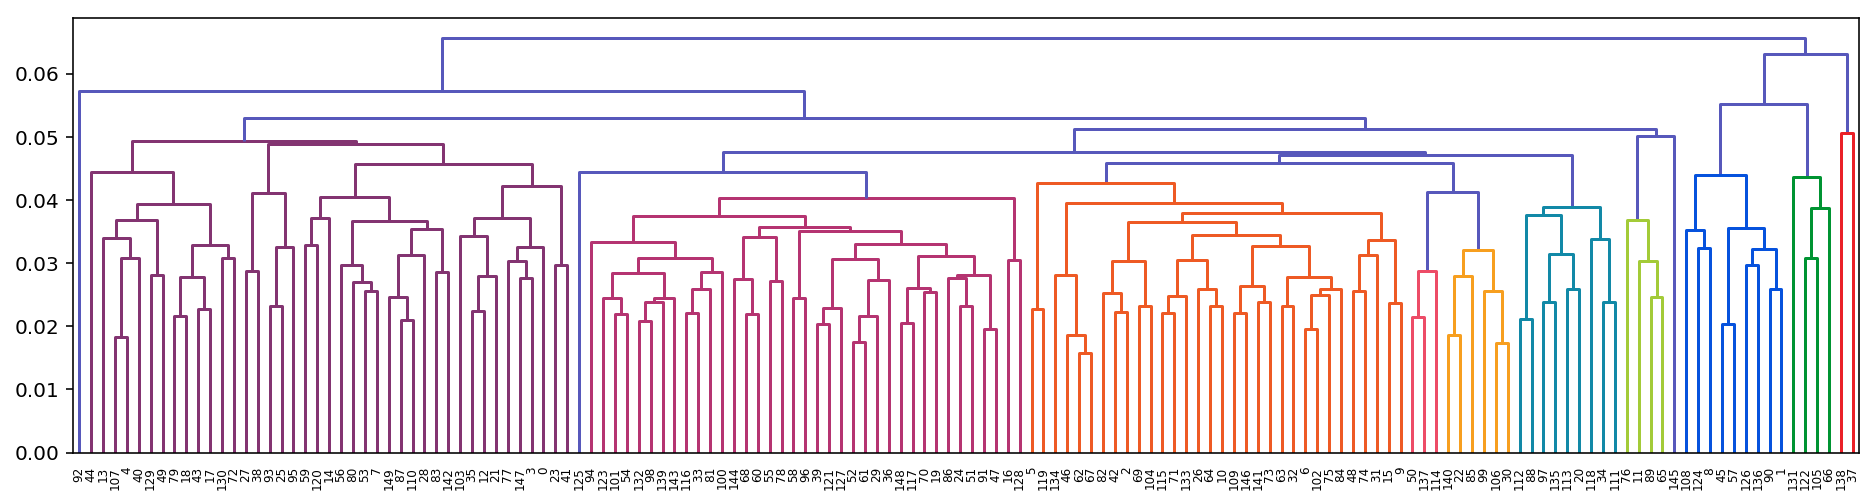

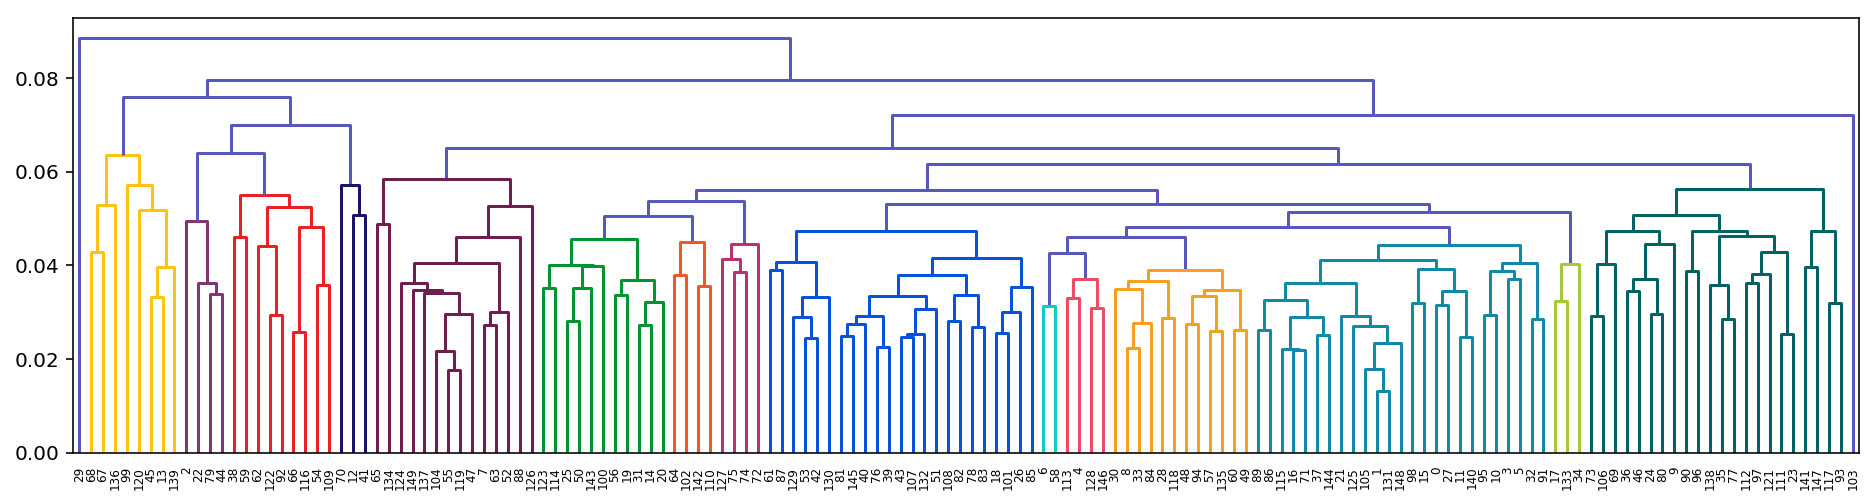

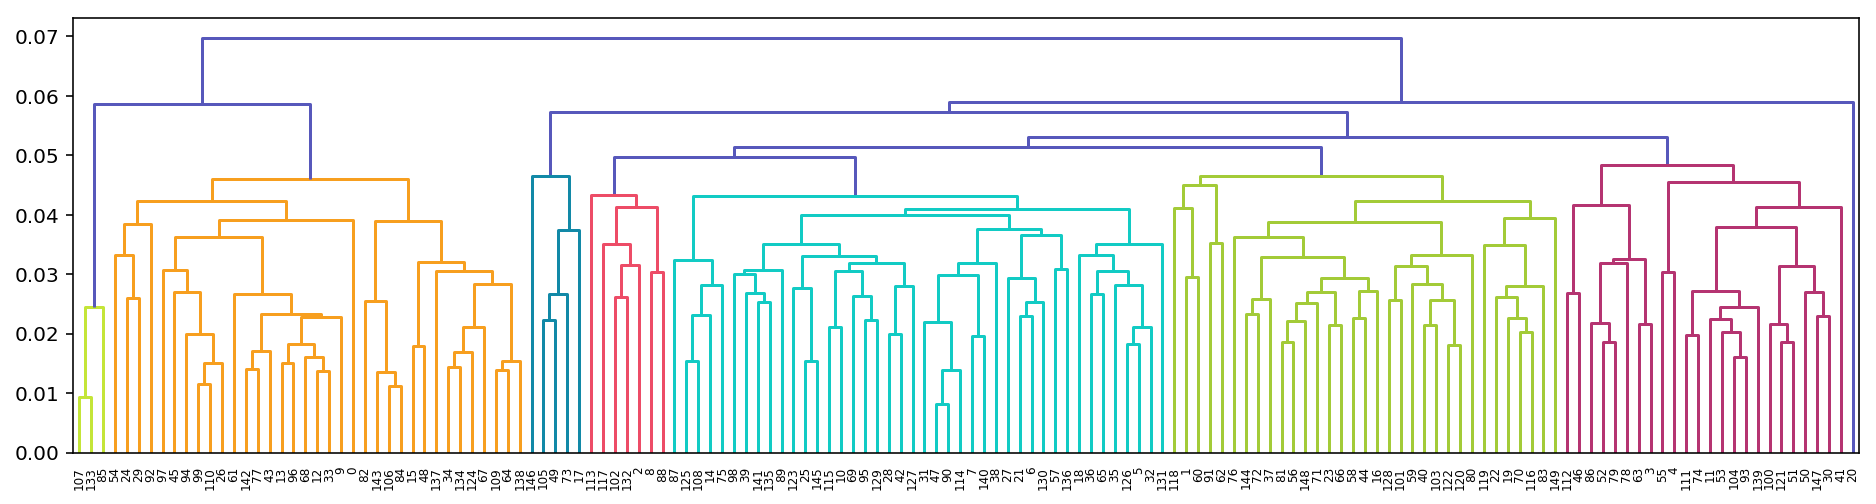

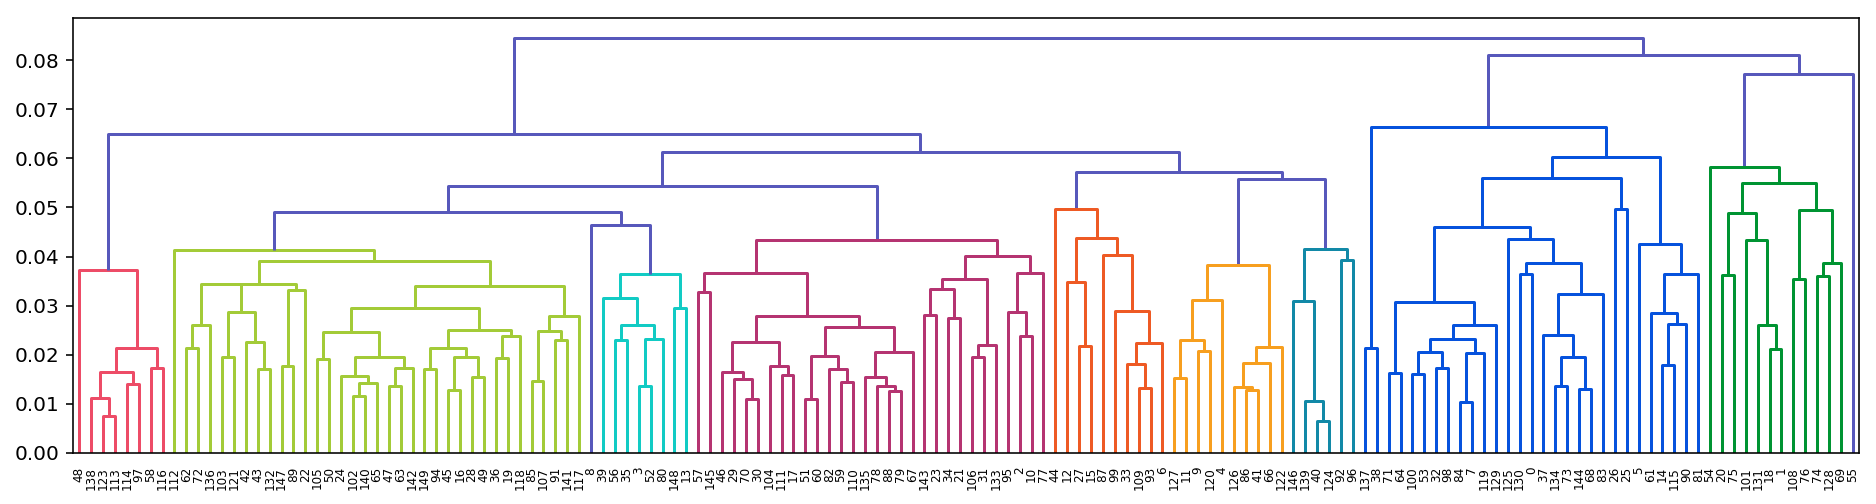

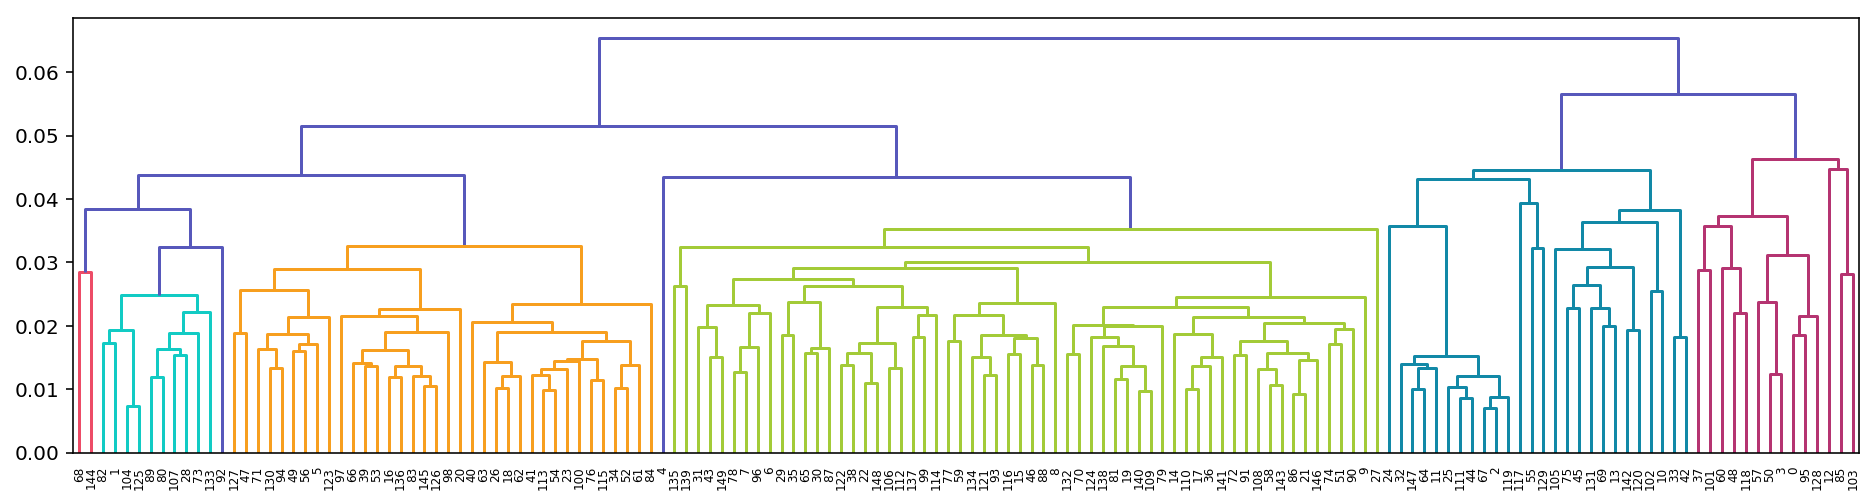

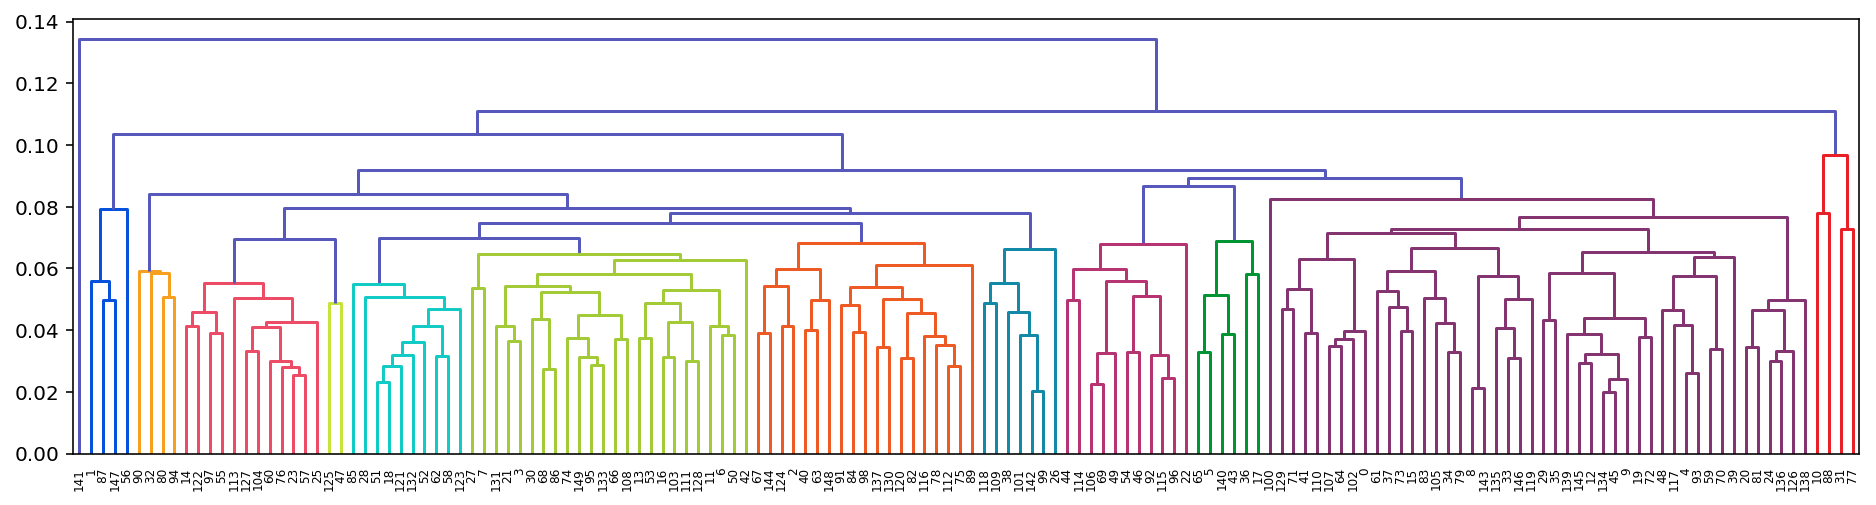

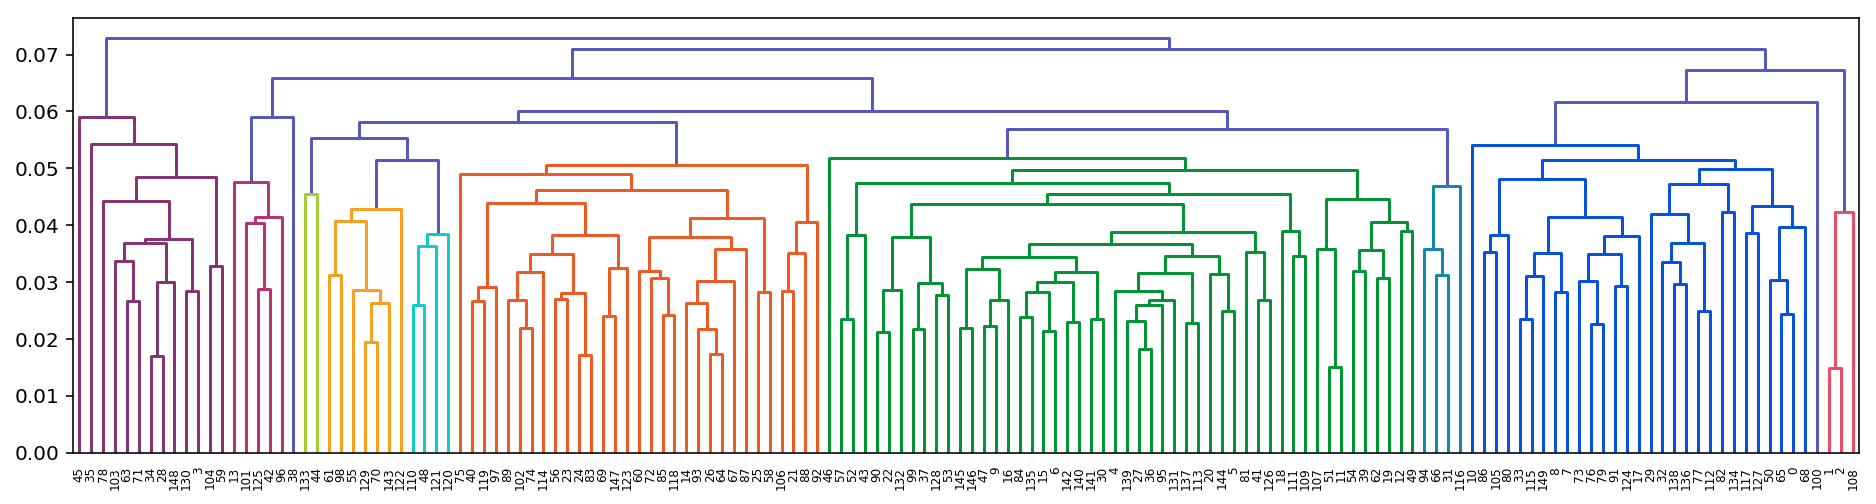

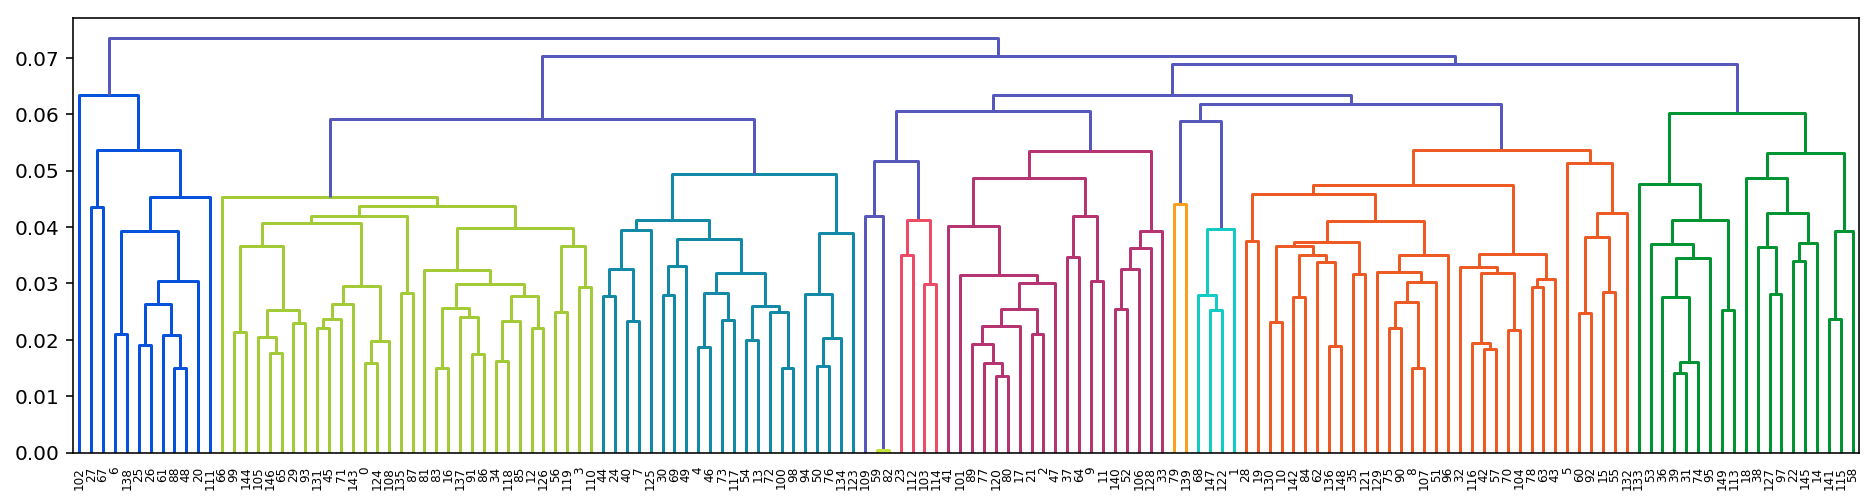

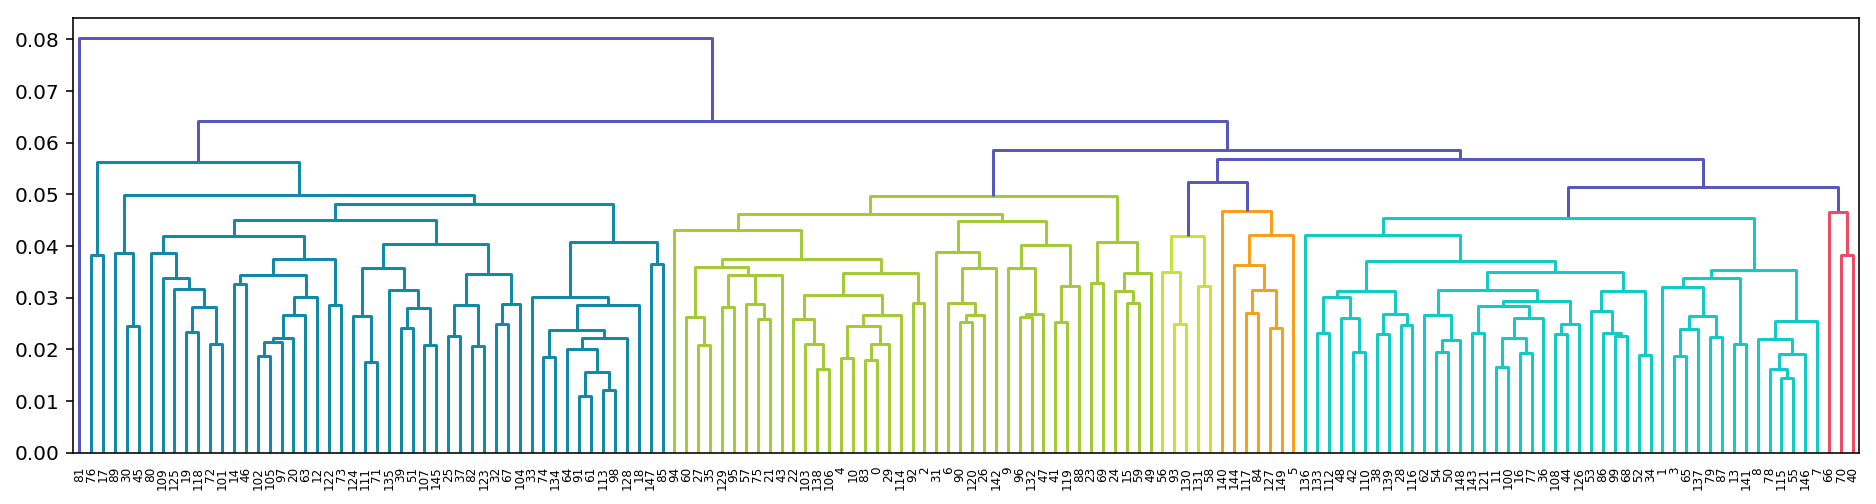

In [7]:
random.seed(43)

for _ in range(100):
    Z = sample_and_cluster(knn=150, n_samples=100)
    A, b, obj = get_lp(Z, stiffness=1.7)
    sol = pulp_solve(Z, A, b, obj)
    cluster_links = np.where(sol > 0)[0]
    fig, ax = plt.subplots(figsize=(16, 4))
    plot_tree(Z, cluster_links, 
              truncate_mode='level', p=20, ax=ax, leaf_font_size=6, leaf_rotation=90)

In [15]:
def benchmark(cnt):
    for _ in range(cnt):
        Z = sample_and_cluster(knn=300, n_samples=200)
        A, b, obj = get_lp(Z, stiffness=1.7)
        sol = pulp_solve(Z, A, b, obj)
        cluster_links = np.where(sol > 0)[0]

%time benchmark(10)

CPU times: user 1.55 s, sys: 2.43 s, total: 3.98 s
Wall time: 1.72 s
